In [1171]:
from src.evaluate import build_ground_truth_spans, build_prediction_spans
from src.users_study_evaluation import build_prediction_user_spans
from src.evaluate import FALLACIES_LEVEL_2_TO_LEVEL_1
from src.utils import read_jsonl
from src.evaluate import NUMERIC_TO_LEVEL_2
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np



In [1172]:
dataset_path = "datasets/gold_standard_dataset.jsonl"
worst_prediction_path = "results/Falcon_7B_8-bit_level_2_results.jsonl"
best_prediction_path = "results/gpt-3.5_level_2_results.jsonl"

In [1173]:
def predictions_per_span(all_y_pred):
    labels_count = {
    "nothing": 0,
    "appeal to positive emotion": 0,
    "appeal to anger": 0,
    "appeal to fear": 0,
    "appeal to pity": 0,
    "appeal to ridicule": 0,
    "appeal to worse problems": 0,
    "causal oversimplification": 0,
    "circular reasoning": 0,
    "equivocation": 0,
    "false analogy": 0,
    "false causality": 0,
    "false dilemma": 0,
    "hasty generalization": 0,
    "slippery slope": 0,
    "straw man": 0,
    "fallacy of division": 0,
    "ad hominem": 0,
    "ad populum": 0,
    "appeal to (false) authority": 0,
    "appeal to nature": 0,
    "appeal to tradition": 0,
    "guilt by association": 0,
    "tu quoque": 0,
    "unknown": 0
}
    all_dict_spans = []
    for i in all_y_pred:
        dict_spans = {}
        for s in i.spans:
            if tuple(s.interval) not in dict_spans:
                dict_spans[tuple(s.interval)] = [NUMERIC_TO_LEVEL_2[s.label]]
            else:
                dict_spans[tuple(s.interval)].append(NUMERIC_TO_LEVEL_2[s.label])
        
        for s_key in dict_spans.keys():
            dict_spans[s_key] = set(dict_spans[s_key])
            for l in dict_spans[s_key]:
                labels_count[l] += 1

        all_dict_spans.append(dict_spans)
            
    return all_dict_spans, labels_count

In [1174]:
def gold_truth_per_span(all_y_true):
    labels_count = {
    "nothing": 0,
    "appeal to positive emotion": 0,
    "appeal to anger": 0,
    "appeal to fear": 0,
    "appeal to pity": 0,
    "appeal to ridicule": 0,
    "appeal to worse problems": 0,
    "causal oversimplification": 0,
    "circular reasoning": 0,
    "equivocation": 0,
    "false analogy": 0,
    "false causality": 0,
    "false dilemma": 0,
    "hasty generalization": 0,
    "slippery slope": 0,
    "straw man": 0,
    "fallacy of division": 0,
    "ad hominem": 0,
    "ad populum": 0,
    "appeal to (false) authority": 0,
    "appeal to nature": 0,
    "appeal to tradition": 0,
    "guilt by association": 0,
    "tu quoque": 0,
}
    all_dict_spans = []
    for i in all_y_true:
        dict_spans = {}
        for s in i.spans:
            tmp_labels = []
            for l in s.labels:
                if l is not None:
                    tmp_labels.append(NUMERIC_TO_LEVEL_2[l])
                    
            dict_spans[tuple(s.interval)] = set(tmp_labels)
            for l in dict_spans[tuple(s.interval)]:
                labels_count[l] += 1
        
        all_dict_spans.append(dict_spans)

        
            
    return all_dict_spans, labels_count

In [1175]:
def plot_bar_labels_count(labels_count, model_name, level= "Level 2"):
    plt.figure(figsize=(20, 16))
    del labels_count["nothing"]
    plt.bar(list(labels_count.keys()), labels_count.values(), color='cornflowerblue')
    plt.ylabel('Counts',fontdict={'fontsize': 40})
    plt.xlabel('Fallacies', fontdict={'fontsize': 40})
    plt.title(f'Distribution of fallacies for the {model_name} at {level}', fontdict={'fontsize': 40})
    plt.xticks(rotation=90, fontsize=40)
    plt.yticks(fontsize=40)
    plt.tight_layout()
    # plt.rcParams.update({'font.size': 30})

    # plt.show()
    plt.savefig(f"figures/{model_name.lower()}_distribution_{level.lower()}.pdf", format="pdf", dpi=1000)

In [1176]:
gold_dataset = read_jsonl(dataset_path)
worst_pred_dataset = read_jsonl(worst_prediction_path)
best_pred_dataset = read_jsonl(best_prediction_path)

begin_instruction_tag = ""
end_instruction_tag = ""

all_y_true = []
# Build ground truth spans for each instance in the gold dataset
for i in gold_dataset:
    all_y_true.append(build_ground_truth_spans(i["text"], i["labels"]))

# Build predicted spans using the prediction dataset and the gold dataset
all_y_worst_pred = build_prediction_spans(
    worst_pred_dataset, gold_dataset, begin_instruction_tag, end_instruction_tag
)

all_y_best_pred = build_prediction_spans(
    best_pred_dataset, gold_dataset, begin_instruction_tag, end_instruction_tag
)

In [1177]:
all_dict_gold_spans, gold_labels_count = gold_truth_per_span(all_y_true)

all_dict_worst_pred_spans, worst_pred_labels_count = predictions_per_span(all_y_worst_pred)

all_dict_best_pred_spans, best_pred_labels_count = predictions_per_span(all_y_best_pred)



In [1178]:


def transform_level_2_to_level_1(labels_count):
    level_1_labels_count = {
        "nothing": 0,
        "emotion": 0,
        "logic": 0,
        "credibility": 0,
        "unknown": 0
    }

    for fallacies in labels_count:
        level_1_labels_count[FALLACIES_LEVEL_2_TO_LEVEL_1[fallacies]] += labels_count[fallacies]
    
    return level_1_labels_count

### Distribution of the Gold Truth Labels and  Predicted Labels

#### Gold Standard

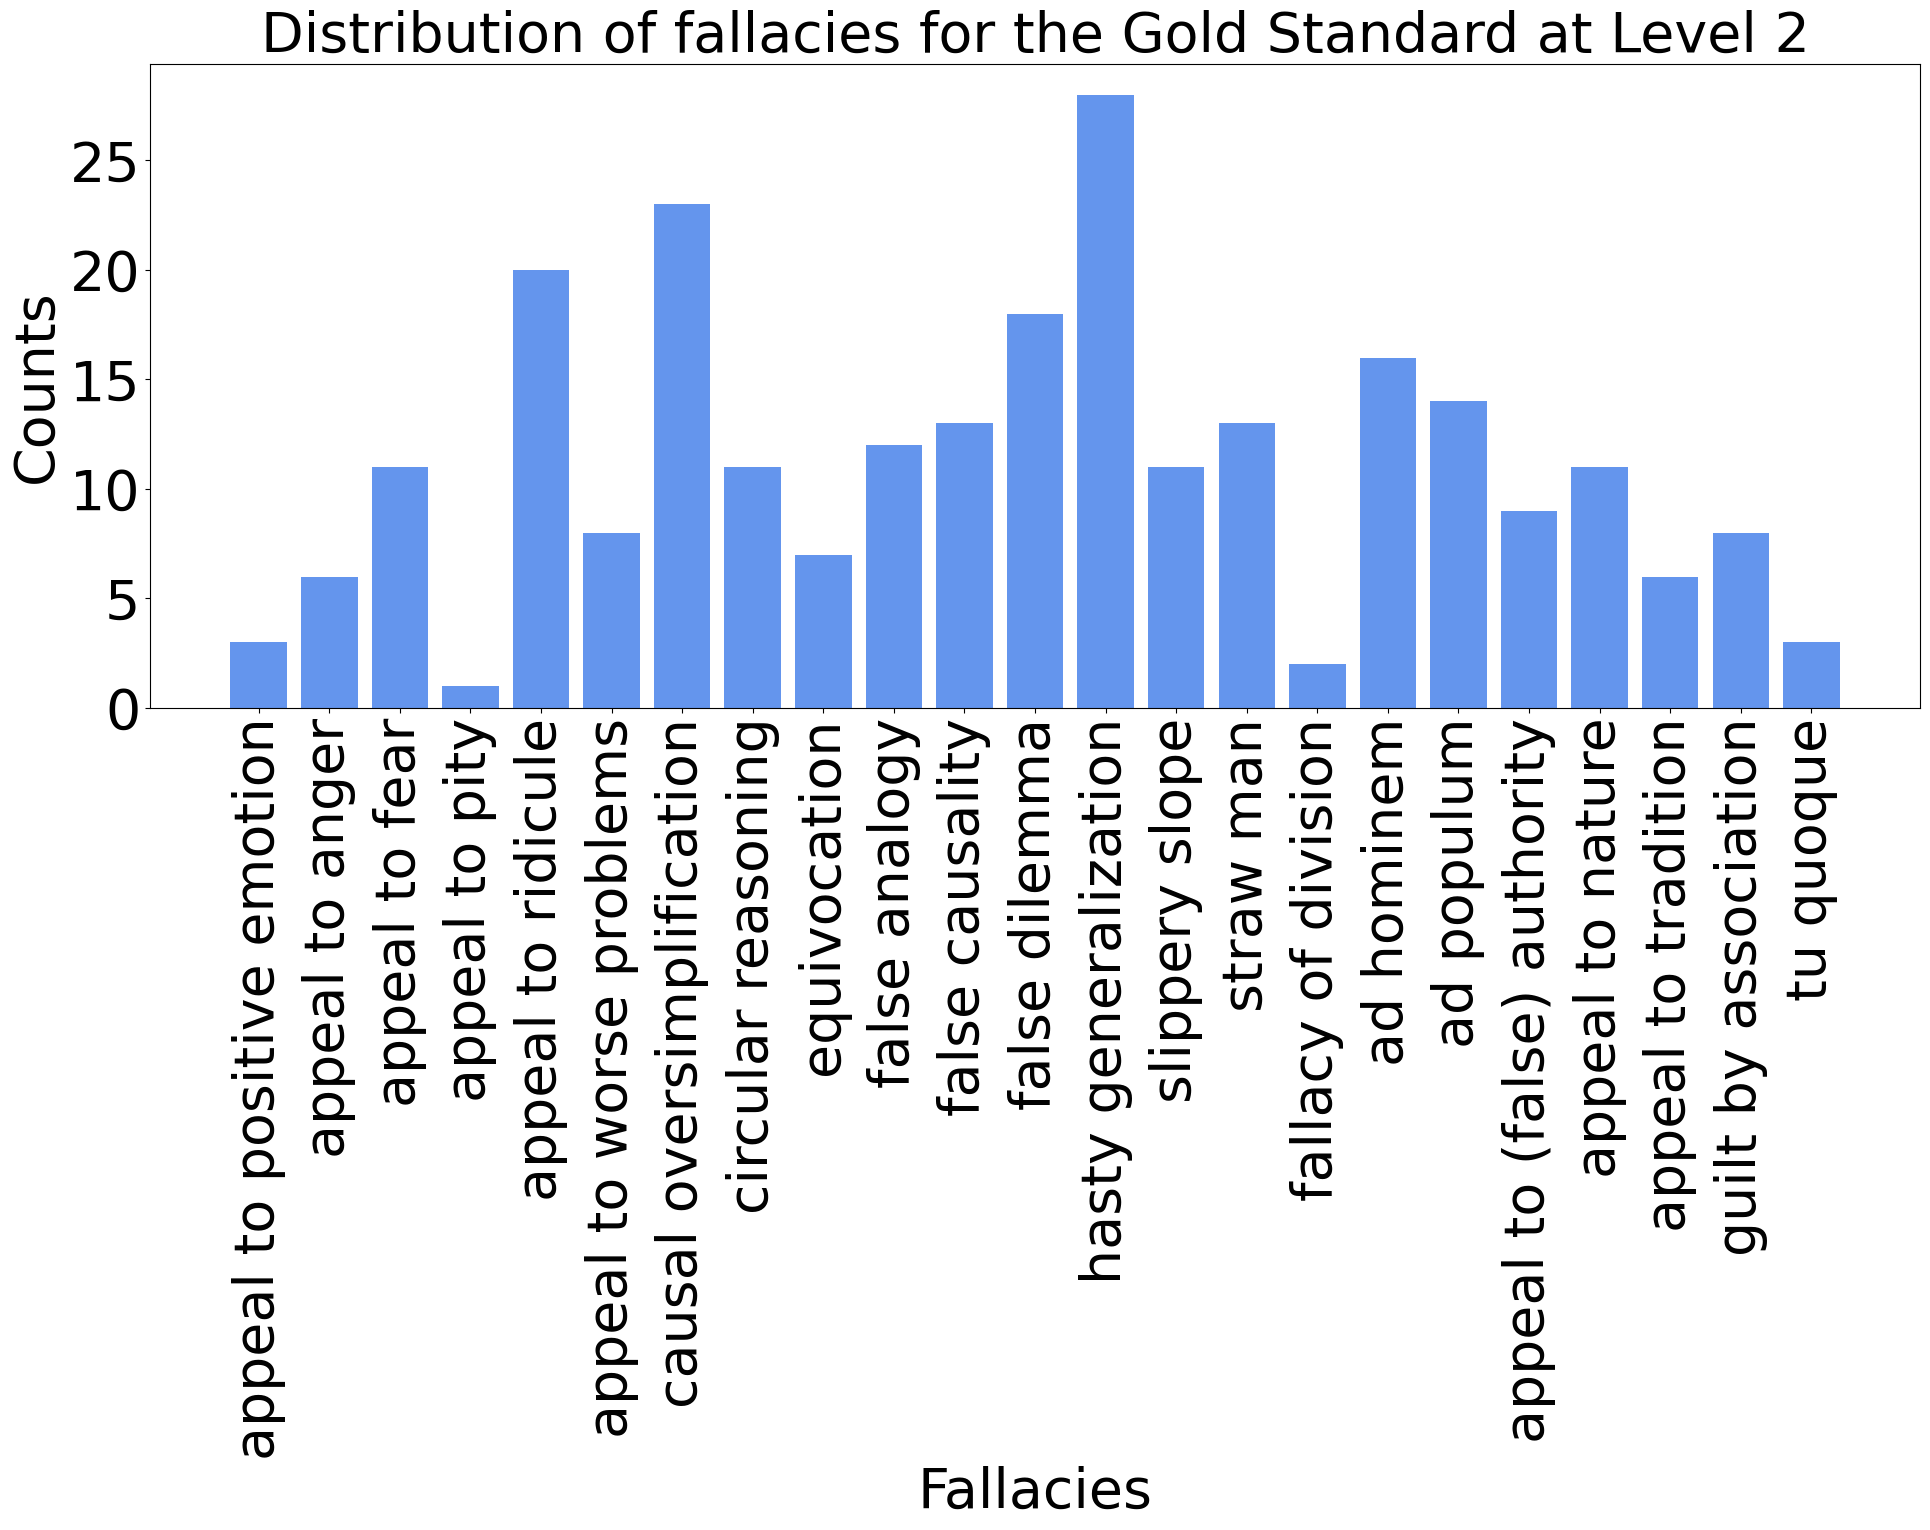

In [1179]:
plot_bar_labels_count(gold_labels_count, "Gold Standard", "Level 2")

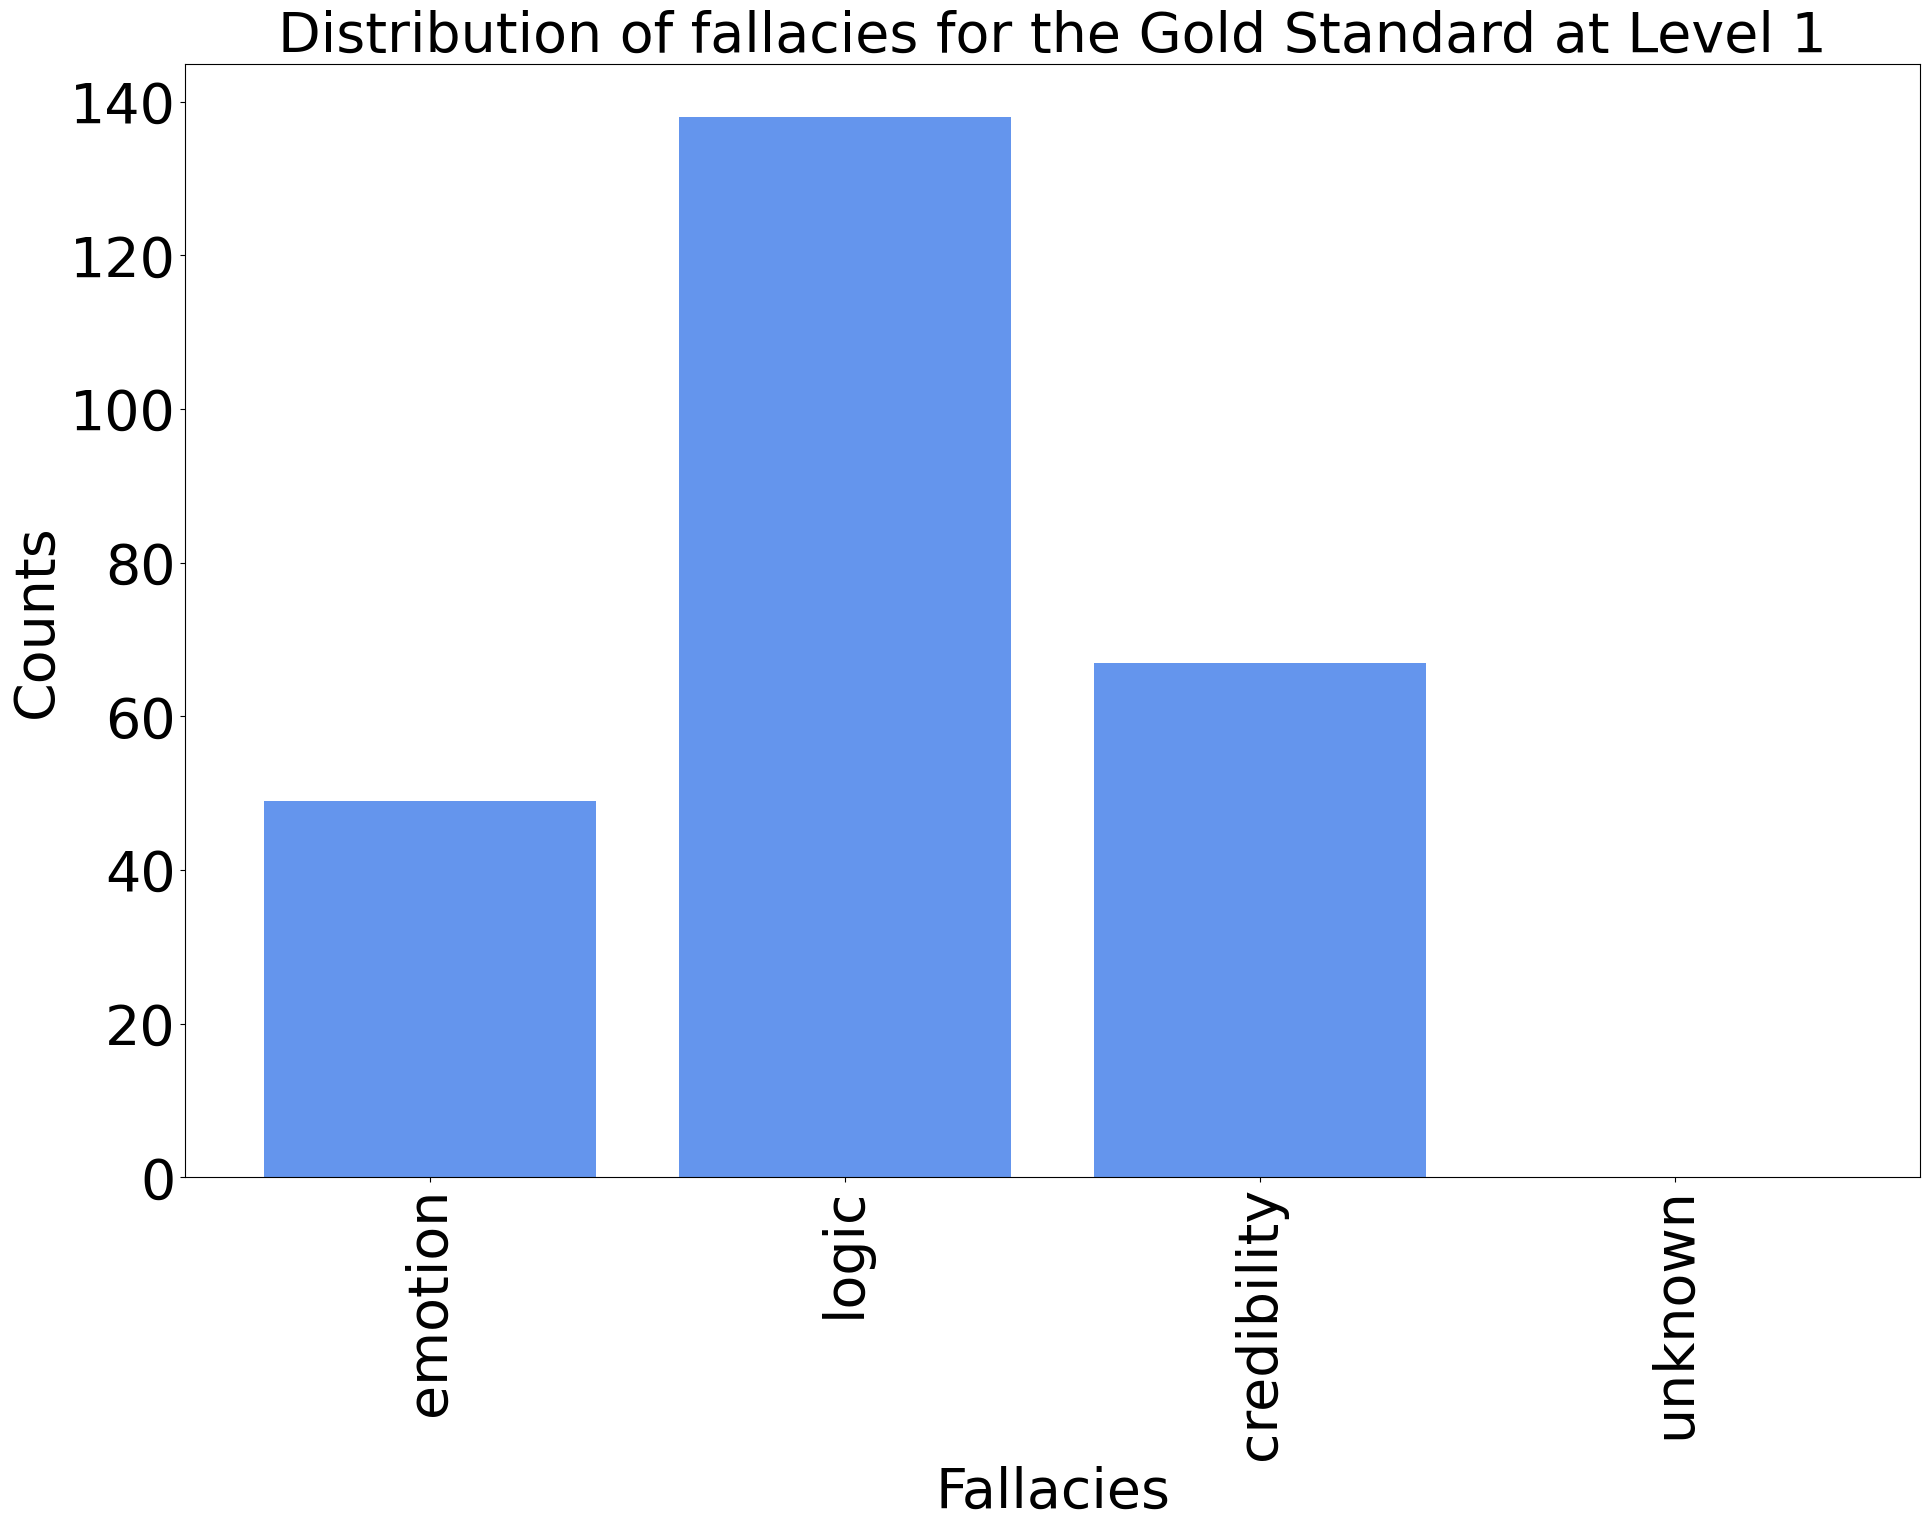

In [1180]:
plot_bar_labels_count(transform_level_2_to_level_1(gold_labels_count), "Gold Standard", "Level 1")

#### Worst Predictions

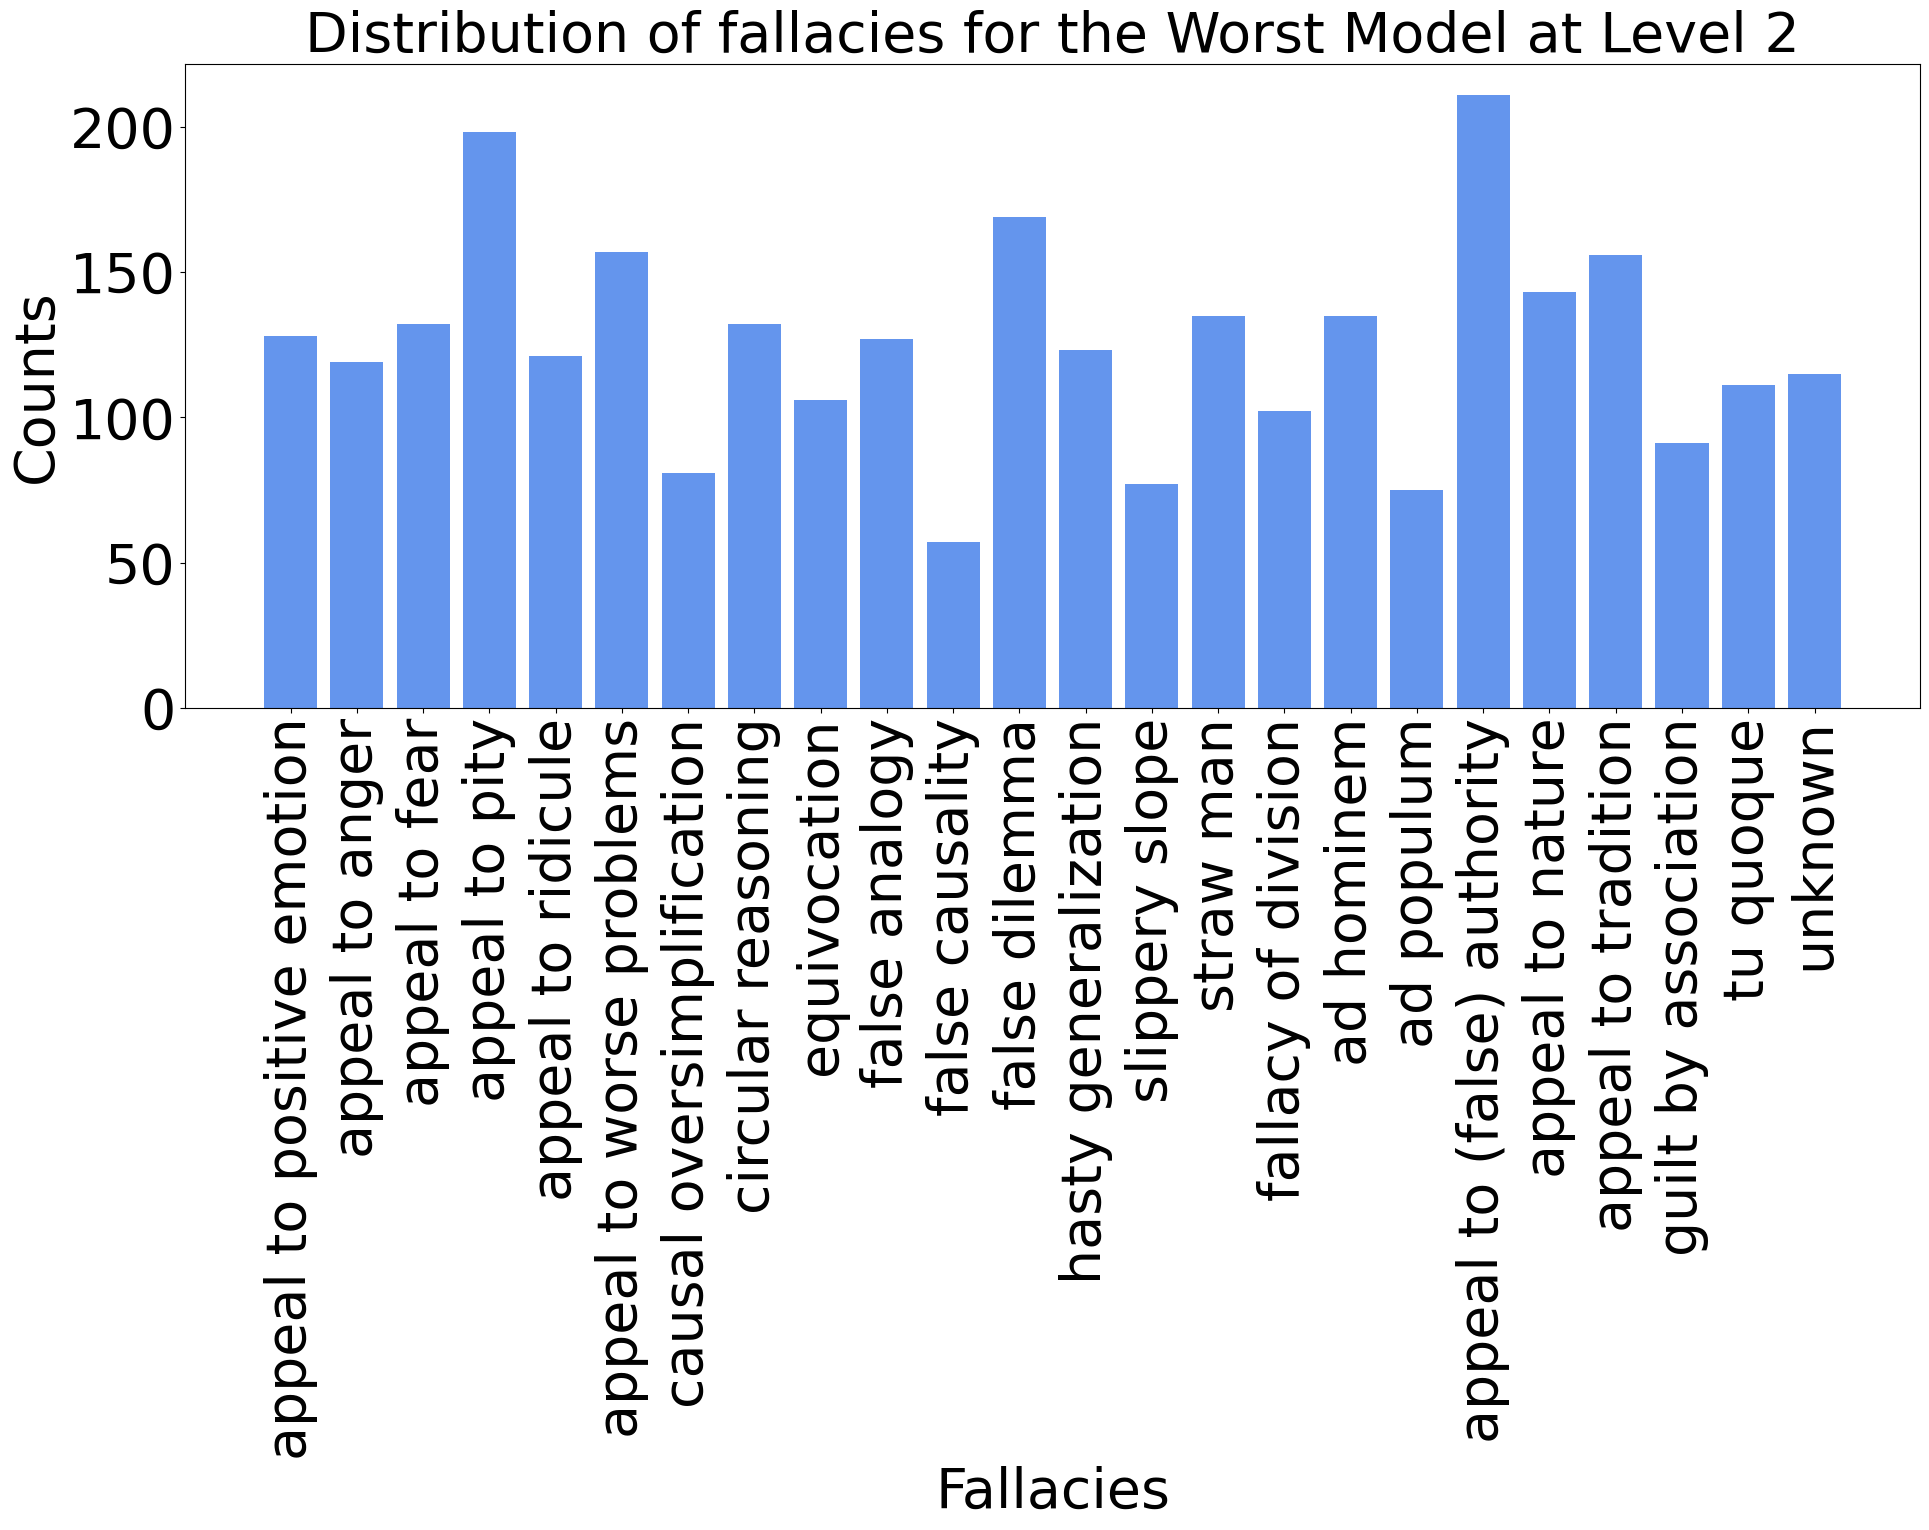

In [1181]:
plot_bar_labels_count(worst_pred_labels_count, "Worst Model", "Level 2")

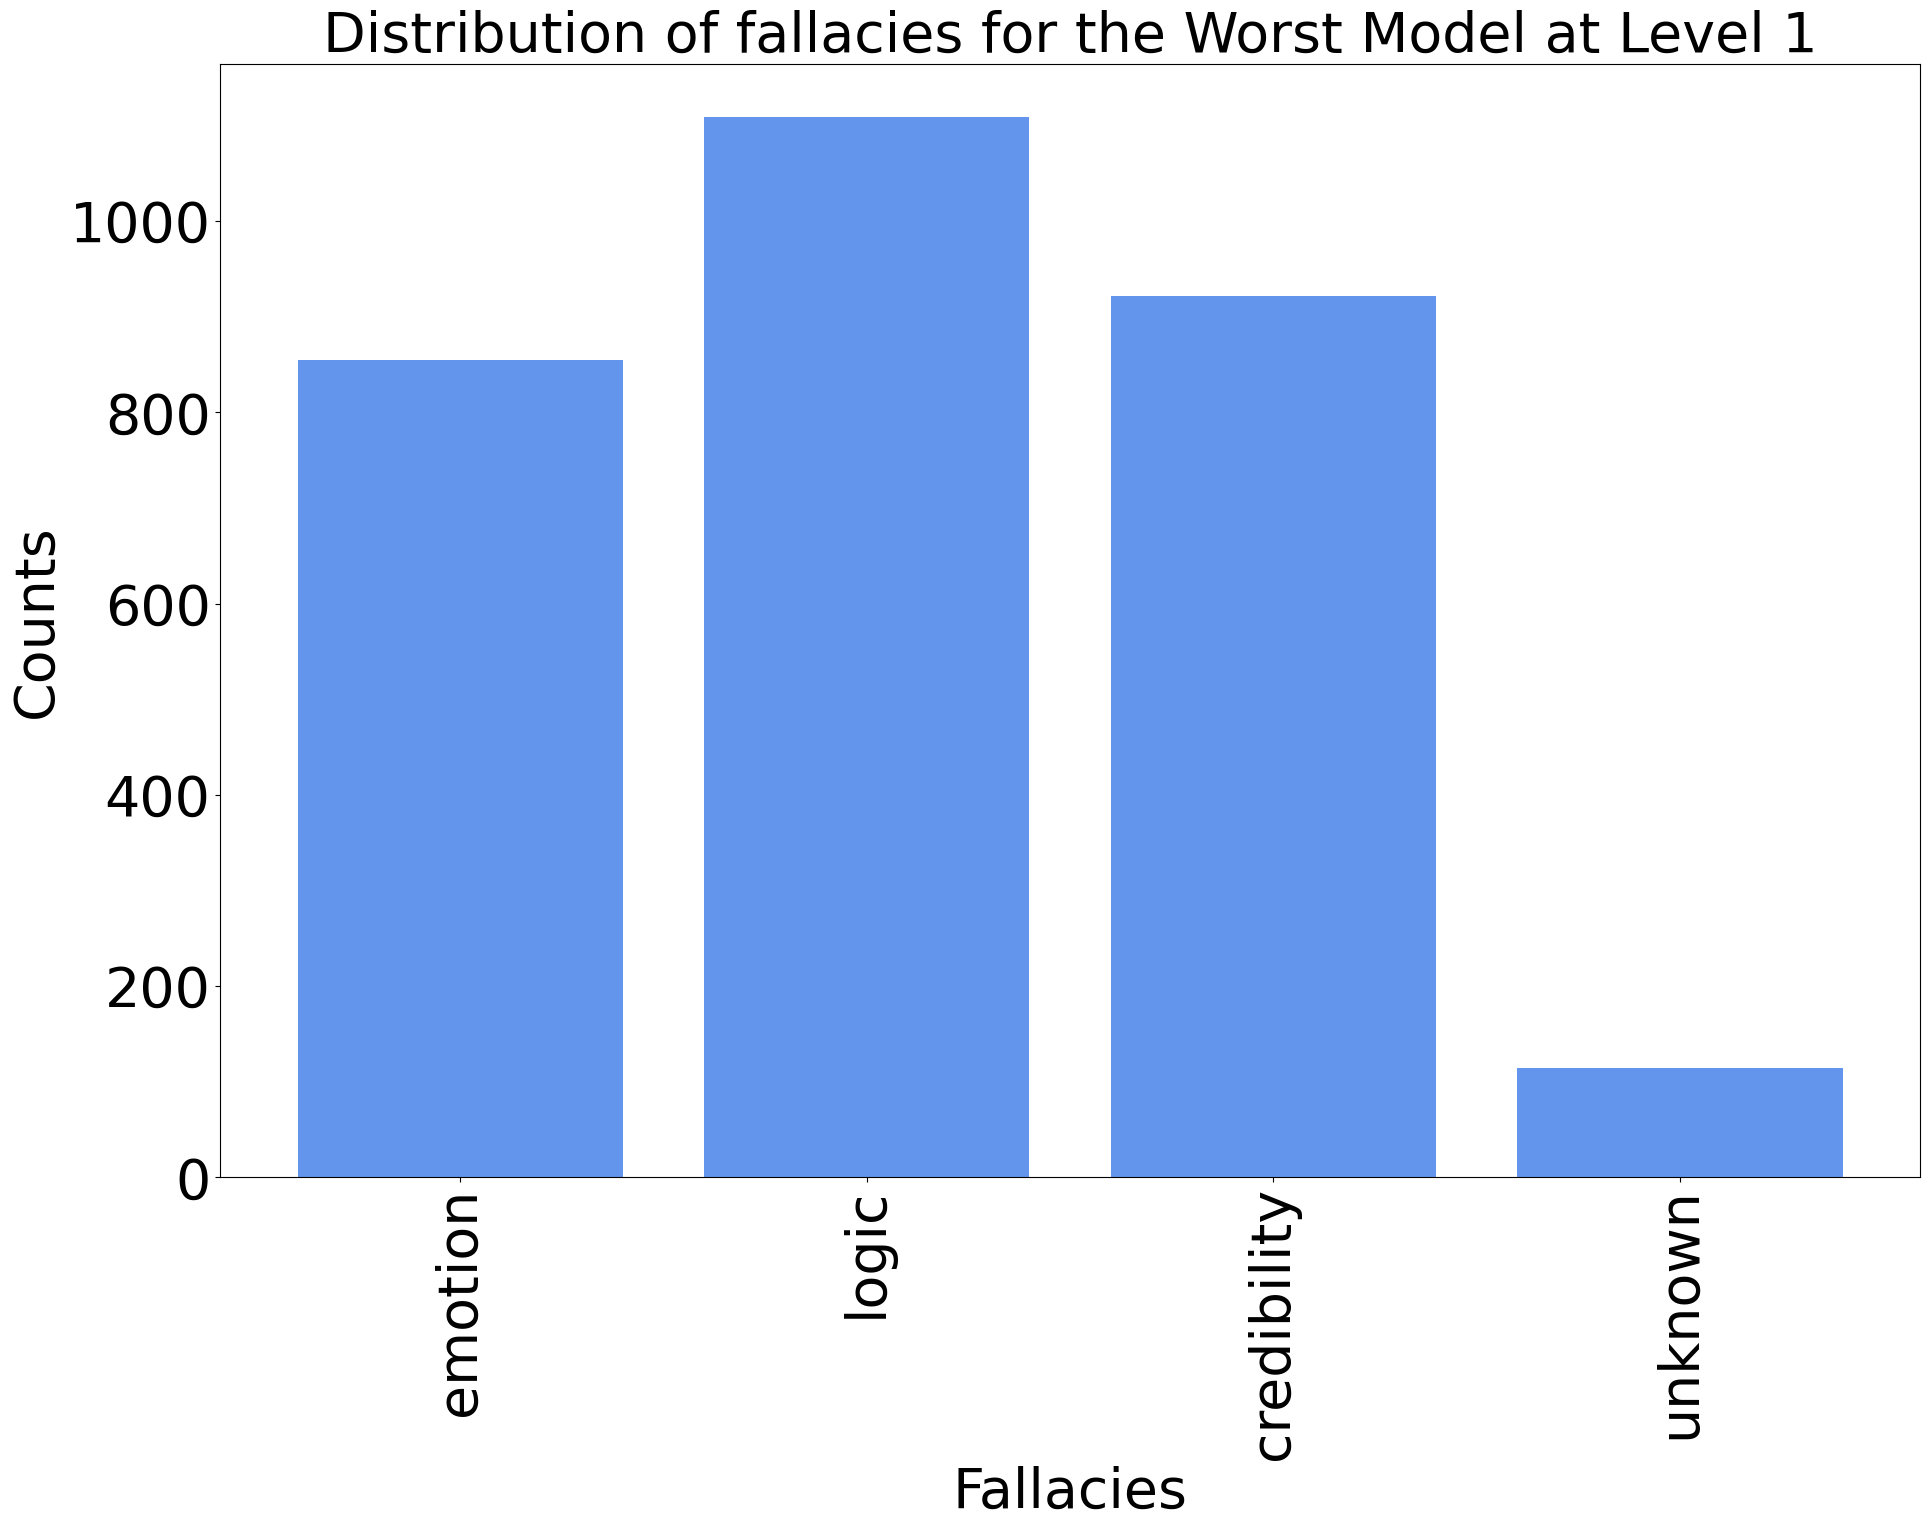

In [1182]:
plot_bar_labels_count(transform_level_2_to_level_1(worst_pred_labels_count), "Worst Model", "Level 1")

#### Best Predictions

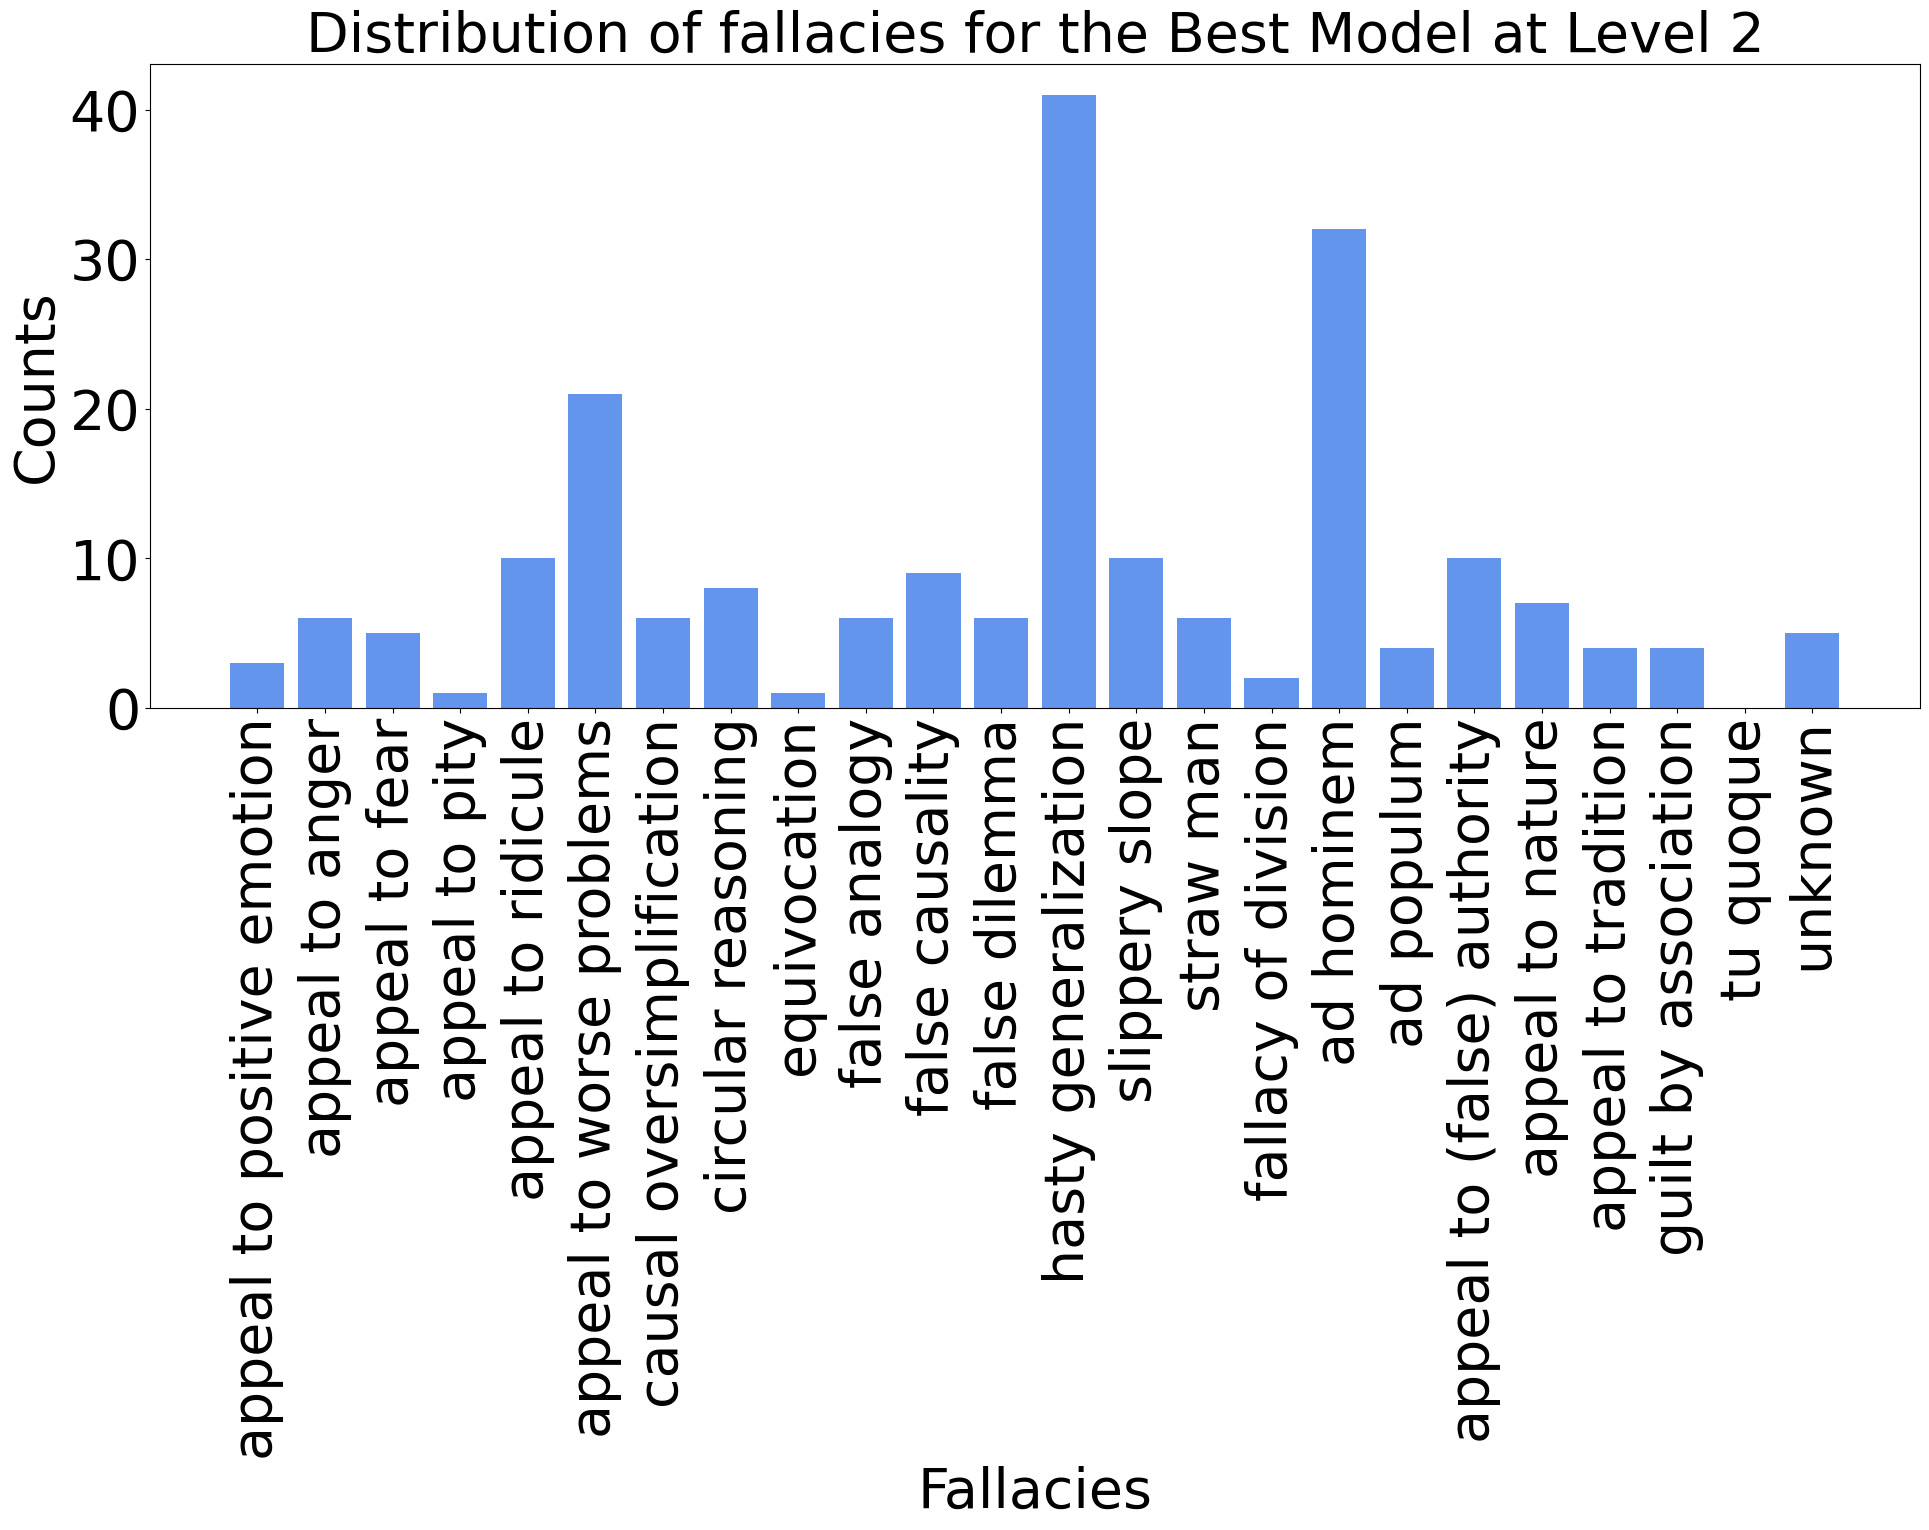

In [1183]:
plot_bar_labels_count(best_pred_labels_count, "Best Model", "Level 2")

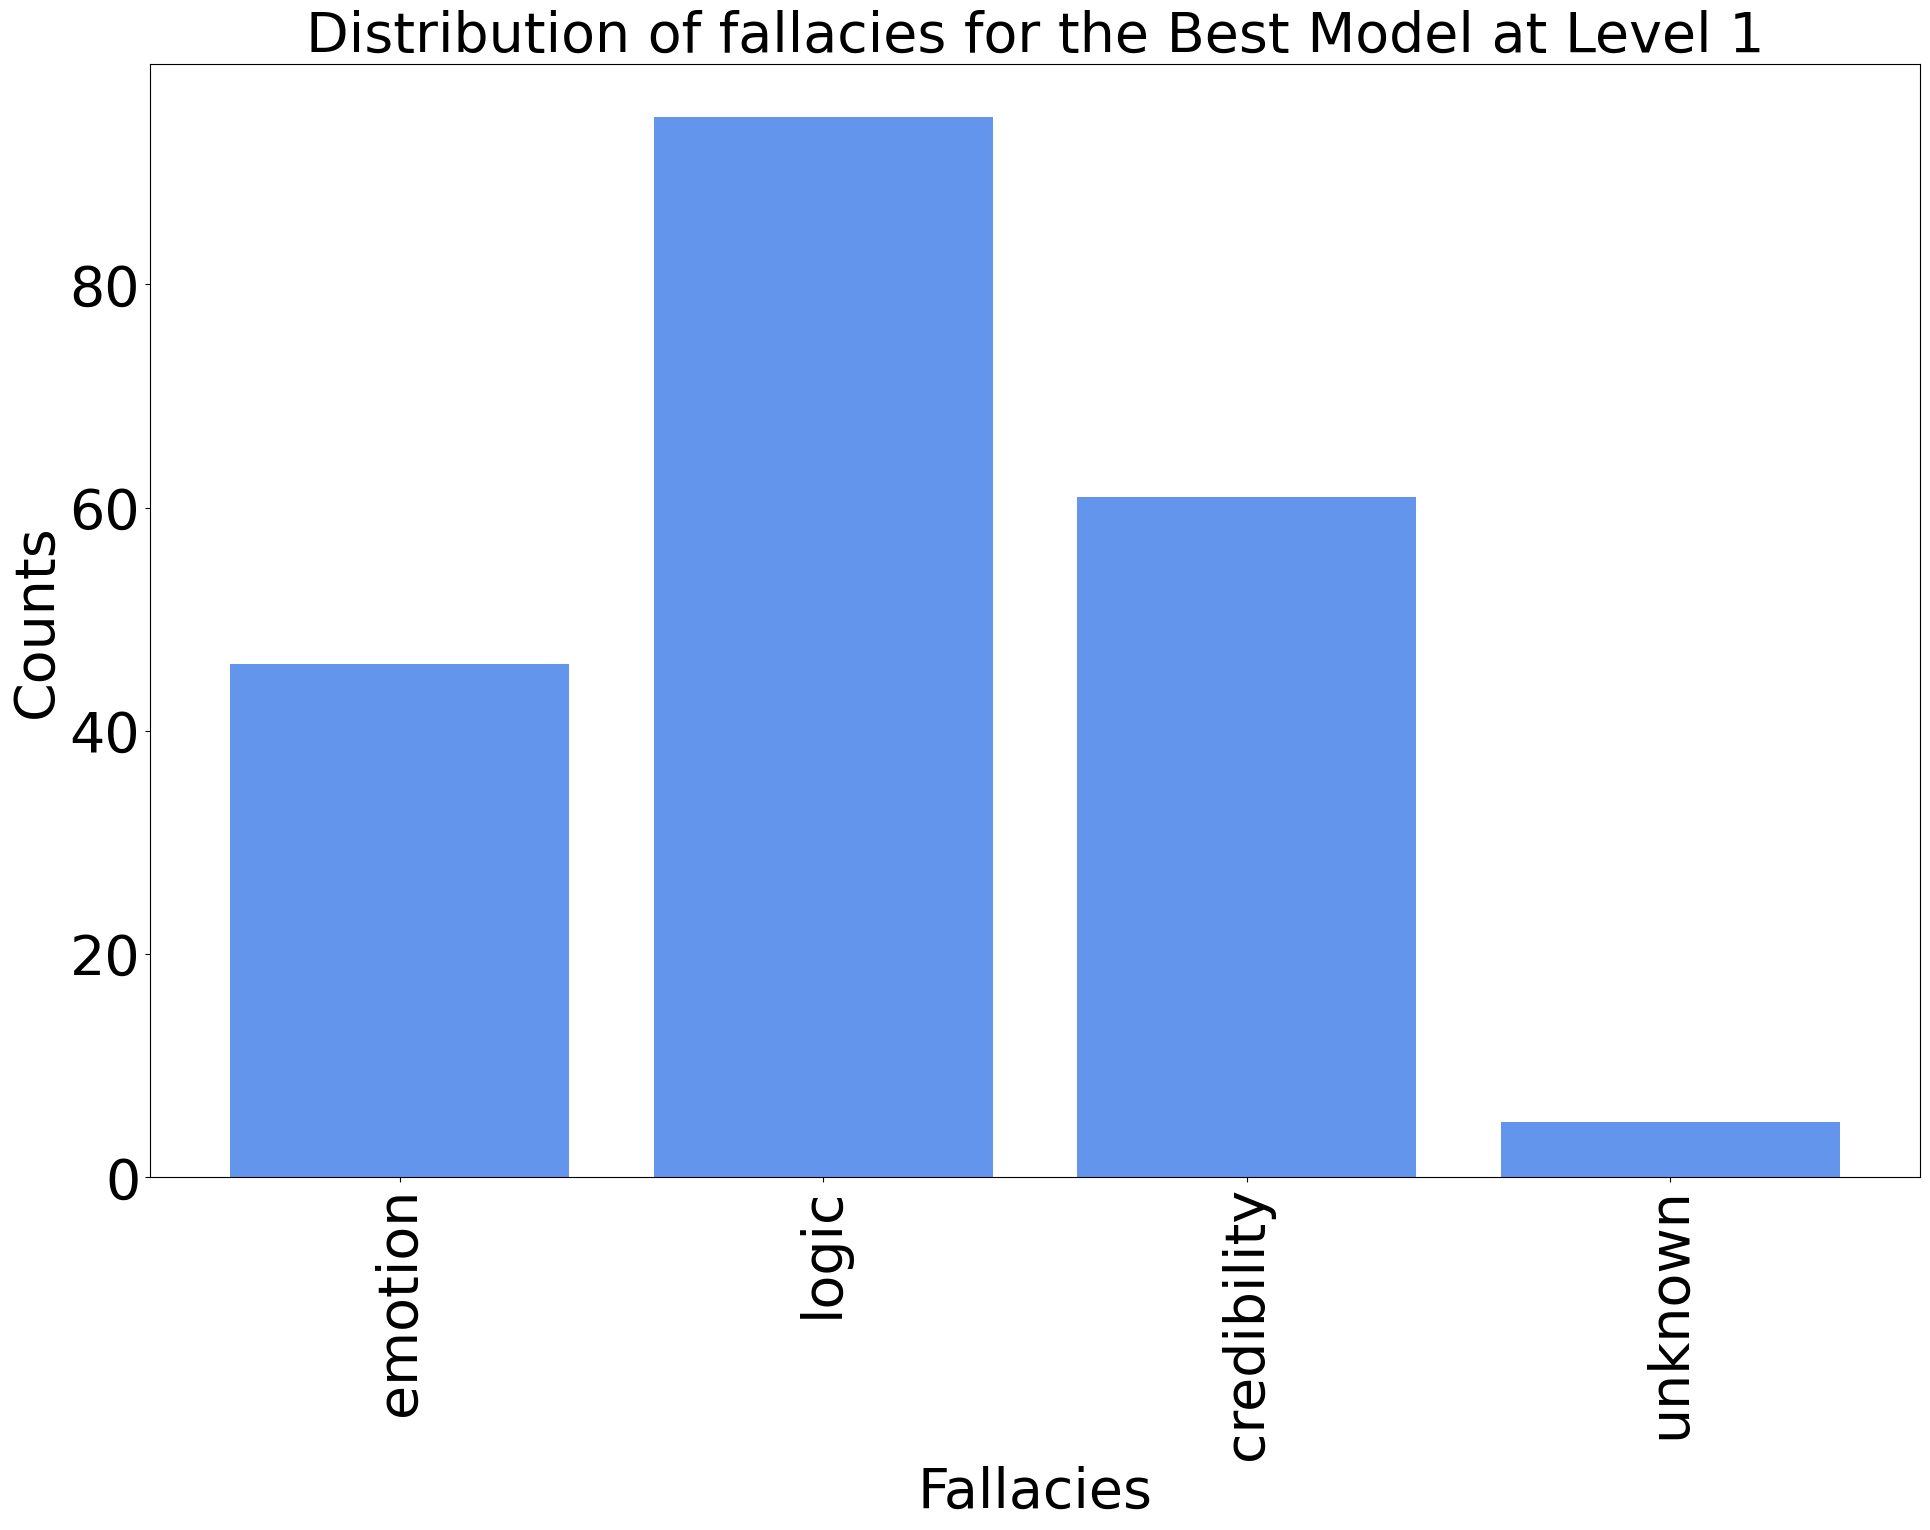

In [1184]:
plot_bar_labels_count(transform_level_2_to_level_1(best_pred_labels_count), "Best Model", "Level 1")

In [1185]:
print(all_dict_best_pred_spans[1])
print(all_dict_gold_spans[1])

{(0, 83): {'nothing'}, (84, 145): {'hasty generalization'}}
{(84, 145): {'hasty generalization'}, (0, 83): set()}


### Average Fallacies per Predicted Span

In [1186]:
def average_fallacies_per_predicted_span(all_dict_spans):
    count_fallacies = 0
    count_span = 0
    for i in all_dict_spans:
        for span in i.keys():
            if len(i[span]) == 1 and "nothing" in i[span]:
                continue
            if "nothing" in i[span]:
                count_fallacies += len(i[span]) - 1
            else:
                count_fallacies += len(i[span])
            count_span += 1

    return count_fallacies / count_span, count_fallacies, count_span                

In [1187]:
print("Average best model fallacies per fallacious span: ", average_fallacies_per_predicted_span(all_dict_best_pred_spans))
print("Average worst model fallacies per fallacious span: ", average_fallacies_per_predicted_span(all_dict_worst_pred_spans))

Average best model fallacies per fallacious span:  (1.0402010050251256, 207, 199)
Average worst model fallacies per fallacious span:  (4.8016, 3001, 625)


#### Exact Matching Fallacious Span

In [1188]:
def count_match_fallacious_span(all_dict_gold_spans, all_dict_pred_spans):
    gd_labels_count = {
    "nothing": 0,
    "appeal to positive emotion": 0,
    "appeal to anger": 0,
    "appeal to fear": 0,
    "appeal to pity": 0,
    "appeal to ridicule": 0,
    "appeal to worse problems": 0,
    "causal oversimplification": 0,
    "circular reasoning": 0,
    "equivocation": 0,
    "false analogy": 0,
    "false causality": 0,
    "false dilemma": 0,
    "hasty generalization": 0,
    "slippery slope": 0,
    "straw man": 0,
    "fallacy of division": 0,
    "ad hominem": 0,
    "ad populum": 0,
    "appeal to (false) authority": 0,
    "appeal to nature": 0,
    "appeal to tradition": 0,
    "guilt by association": 0,
    "tu quoque": 0,
    "unknown": 0
    }

    pred_labels_count = deepcopy(gd_labels_count)

    count_match = 0
    count_span = 0
    for ground_truth_ex, pred_truth_ex in zip(all_dict_gold_spans, all_dict_pred_spans):
        for span in ground_truth_ex.keys():
            if (len(ground_truth_ex[span]) == 1 and ("nothing" in ground_truth_ex[span])) or len(ground_truth_ex[span]) == 0: 
                continue
            print(span, ground_truth_ex, pred_truth_ex)
            if span in pred_truth_ex.keys():
                count_match += 1
                for l in ground_truth_ex[span]:
                    if l in pred_truth_ex[span]:
                        pred_labels_count[l] += 1
                    if "nothing" not in l:
                        gd_labels_count[l] += 1
            count_span += 1

    return count_match, count_span, gd_labels_count, pred_labels_count

In [1189]:
count_best_match, count_best_span, gd_best_labels_count, pred_labels_count = count_match_fallacious_span(all_dict_gold_spans, all_dict_best_pred_spans)

(155, 588) {(155, 588): {'slippery slope'}, (0, 154): set()} {(0, 242): {'nothing'}, (243, 588): {'slippery slope'}}
(84, 145) {(84, 145): {'hasty generalization'}, (0, 83): set()} {(0, 83): {'nothing'}, (84, 145): {'hasty generalization'}}
(118, 265) {(118, 265): {'false analogy'}, (0, 117): set()} {(0, 265): {'nothing'}}
(107, 261) {(107, 261): {'guilt by association'}, (107, 338): {'causal oversimplification'}, (158, 338): {'nothing', 'ad populum'}, (391, 542): {'circular reasoning'}, (0, 106): set(), (339, 390): set()} {(0, 157): {'nothing'}, (158, 261): {'hasty generalization'}, (262, 309): {'appeal to worse problems'}, (310, 338): {'hasty generalization'}, (339, 384): {'appeal to ridicule'}, (385, 542): {'nothing'}}
(107, 338) {(107, 261): {'guilt by association'}, (107, 338): {'causal oversimplification'}, (158, 338): {'nothing', 'ad populum'}, (391, 542): {'circular reasoning'}, (0, 106): set(), (339, 390): set()} {(0, 157): {'nothing'}, (158, 261): {'hasty generalization'}, (2

In [1190]:
print("Average best model exact mactch fallacious span", count_best_match / count_best_span, count_best_match, count_best_span)

Average best model exact mactch fallacious span 0.32019704433497537 65 203


In [1191]:
pred_labels_count

{'nothing': 0,
 'appeal to positive emotion': 0,
 'appeal to anger': 0,
 'appeal to fear': 0,
 'appeal to pity': 0,
 'appeal to ridicule': 0,
 'appeal to worse problems': 4,
 'causal oversimplification': 1,
 'circular reasoning': 4,
 'equivocation': 0,
 'false analogy': 0,
 'false causality': 0,
 'false dilemma': 0,
 'hasty generalization': 10,
 'slippery slope': 1,
 'straw man': 0,
 'fallacy of division': 0,
 'ad hominem': 6,
 'ad populum': 1,
 'appeal to (false) authority': 2,
 'appeal to nature': 1,
 'appeal to tradition': 1,
 'guilt by association': 0,
 'tu quoque': 0,
 'unknown': 0}

In [1192]:
count_worst_match, count_worst_span, gd_worst_labels_count, pred_worst_labels_count = count_match_fallacious_span(all_dict_gold_spans, all_dict_worst_pred_spans)

(155, 588) {(155, 588): {'slippery slope'}, (0, 154): set()} {(0, 588): {'nothing'}, (0, 154): {'false dilemma', 'appeal to pity', 'appeal to fear', 'hasty generalization', 'appeal to positive emotion', 'straw man', 'causal oversimplification', 'appeal to worse problems', 'appeal to anger', 'appeal to ridicule', 'circular reasoning', 'false analogy', 'fallacy of division'}, (155, 356): {'appeal to (false) authority'}, (243, 356): {'false dilemma', 'tu quoque', 'equivocation', 'hasty generalization', 'appeal to positive emotion', 'straw man', 'ad populum', 'appeal to tradition', 'appeal to worse problems', 'slippery slope', 'guilt by association', 'ad hominem', 'circular reasoning', 'false analogy', 'fallacy of division'}, (357, 588): {'appeal to pity', 'appeal to anger', 'appeal to fear'}}
(84, 145) {(84, 145): {'hasty generalization'}, (0, 83): set()} {(0, 145): {'nothing'}, (84, 145): {'false dilemma', 'ad populum', 'hasty generalization', 'appeal to positive emotion', 'appeal to (fa

In [1193]:
print("Average worst model exact mactch fallacious span", count_worst_match / count_worst_span, count_worst_match, count_worst_span)

Average worst model exact mactch fallacious span 0.4236453201970443 86 203


In [1194]:
pred_worst_labels_count

{'nothing': 0,
 'appeal to positive emotion': 0,
 'appeal to anger': 0,
 'appeal to fear': 0,
 'appeal to pity': 0,
 'appeal to ridicule': 1,
 'appeal to worse problems': 1,
 'causal oversimplification': 1,
 'circular reasoning': 1,
 'equivocation': 0,
 'false analogy': 1,
 'false causality': 1,
 'false dilemma': 1,
 'hasty generalization': 4,
 'slippery slope': 0,
 'straw man': 3,
 'fallacy of division': 0,
 'ad hominem': 1,
 'ad populum': 0,
 'appeal to (false) authority': 1,
 'appeal to nature': 1,
 'appeal to tradition': 0,
 'guilt by association': 0,
 'tu quoque': 1,
 'unknown': 0}

In [1195]:
def plot_bar_labels_exact_match(gd_best_labels_count, pred_labels_count, name_bar_pred_labels, level="Level 2"):

    del gd_best_labels_count["nothing"]
    del pred_labels_count["nothing"]

    del gd_best_labels_count["unknown"]
    del pred_labels_count["unknown"]
    
    labels = list(gd_best_labels_count.keys())
    values1 = list(pred_labels_count.values())
    values2 = list(gd_best_labels_count.values())

    fig, ax = plt.subplots(figsize=(20, 16))

    bar_width = 0.35
    index = np.arange(len(labels))

    ax.bar(index - bar_width/2, values1, bar_width, label=name_bar_pred_labels, color='lightsteelblue')
    ax.bar(index + bar_width/2, values2, bar_width, label='Gold Standard', color='cornflowerblue')

    ax.set_xlabel('Fallacies', fontdict={'fontsize': 40})
    ax.set_ylabel('Counts', fontdict={'fontsize': 40})
    if "user" in name_bar_pred_labels:
        ax.set_title(f'Correct fallacies per exact matched fallacious span for the {str(name_bar_pred_labels)} at {level}', fontdict={'fontsize': 35})
    else:
        ax.set_title(f'Correct fallacies per exact matched fallacious span for the {str(name_bar_pred_labels)} at {level}', fontdict={'fontsize': 35})
    ax.set_xticks(index)
    ax.set_xticklabels(labels)
    plt.xticks(rotation=90, fontsize=40)
    plt.yticks(fontsize=40)
    ax.legend()
    # plt.rcParams.update({'font.size': 30})

    plt.tight_layout()
    # plt.show()
    plt.savefig(f"figures/exact_match_fallacies_per_fallacious_span_{name_bar_pred_labels.lower()}.pdf", format="pdf", dpi=1000)



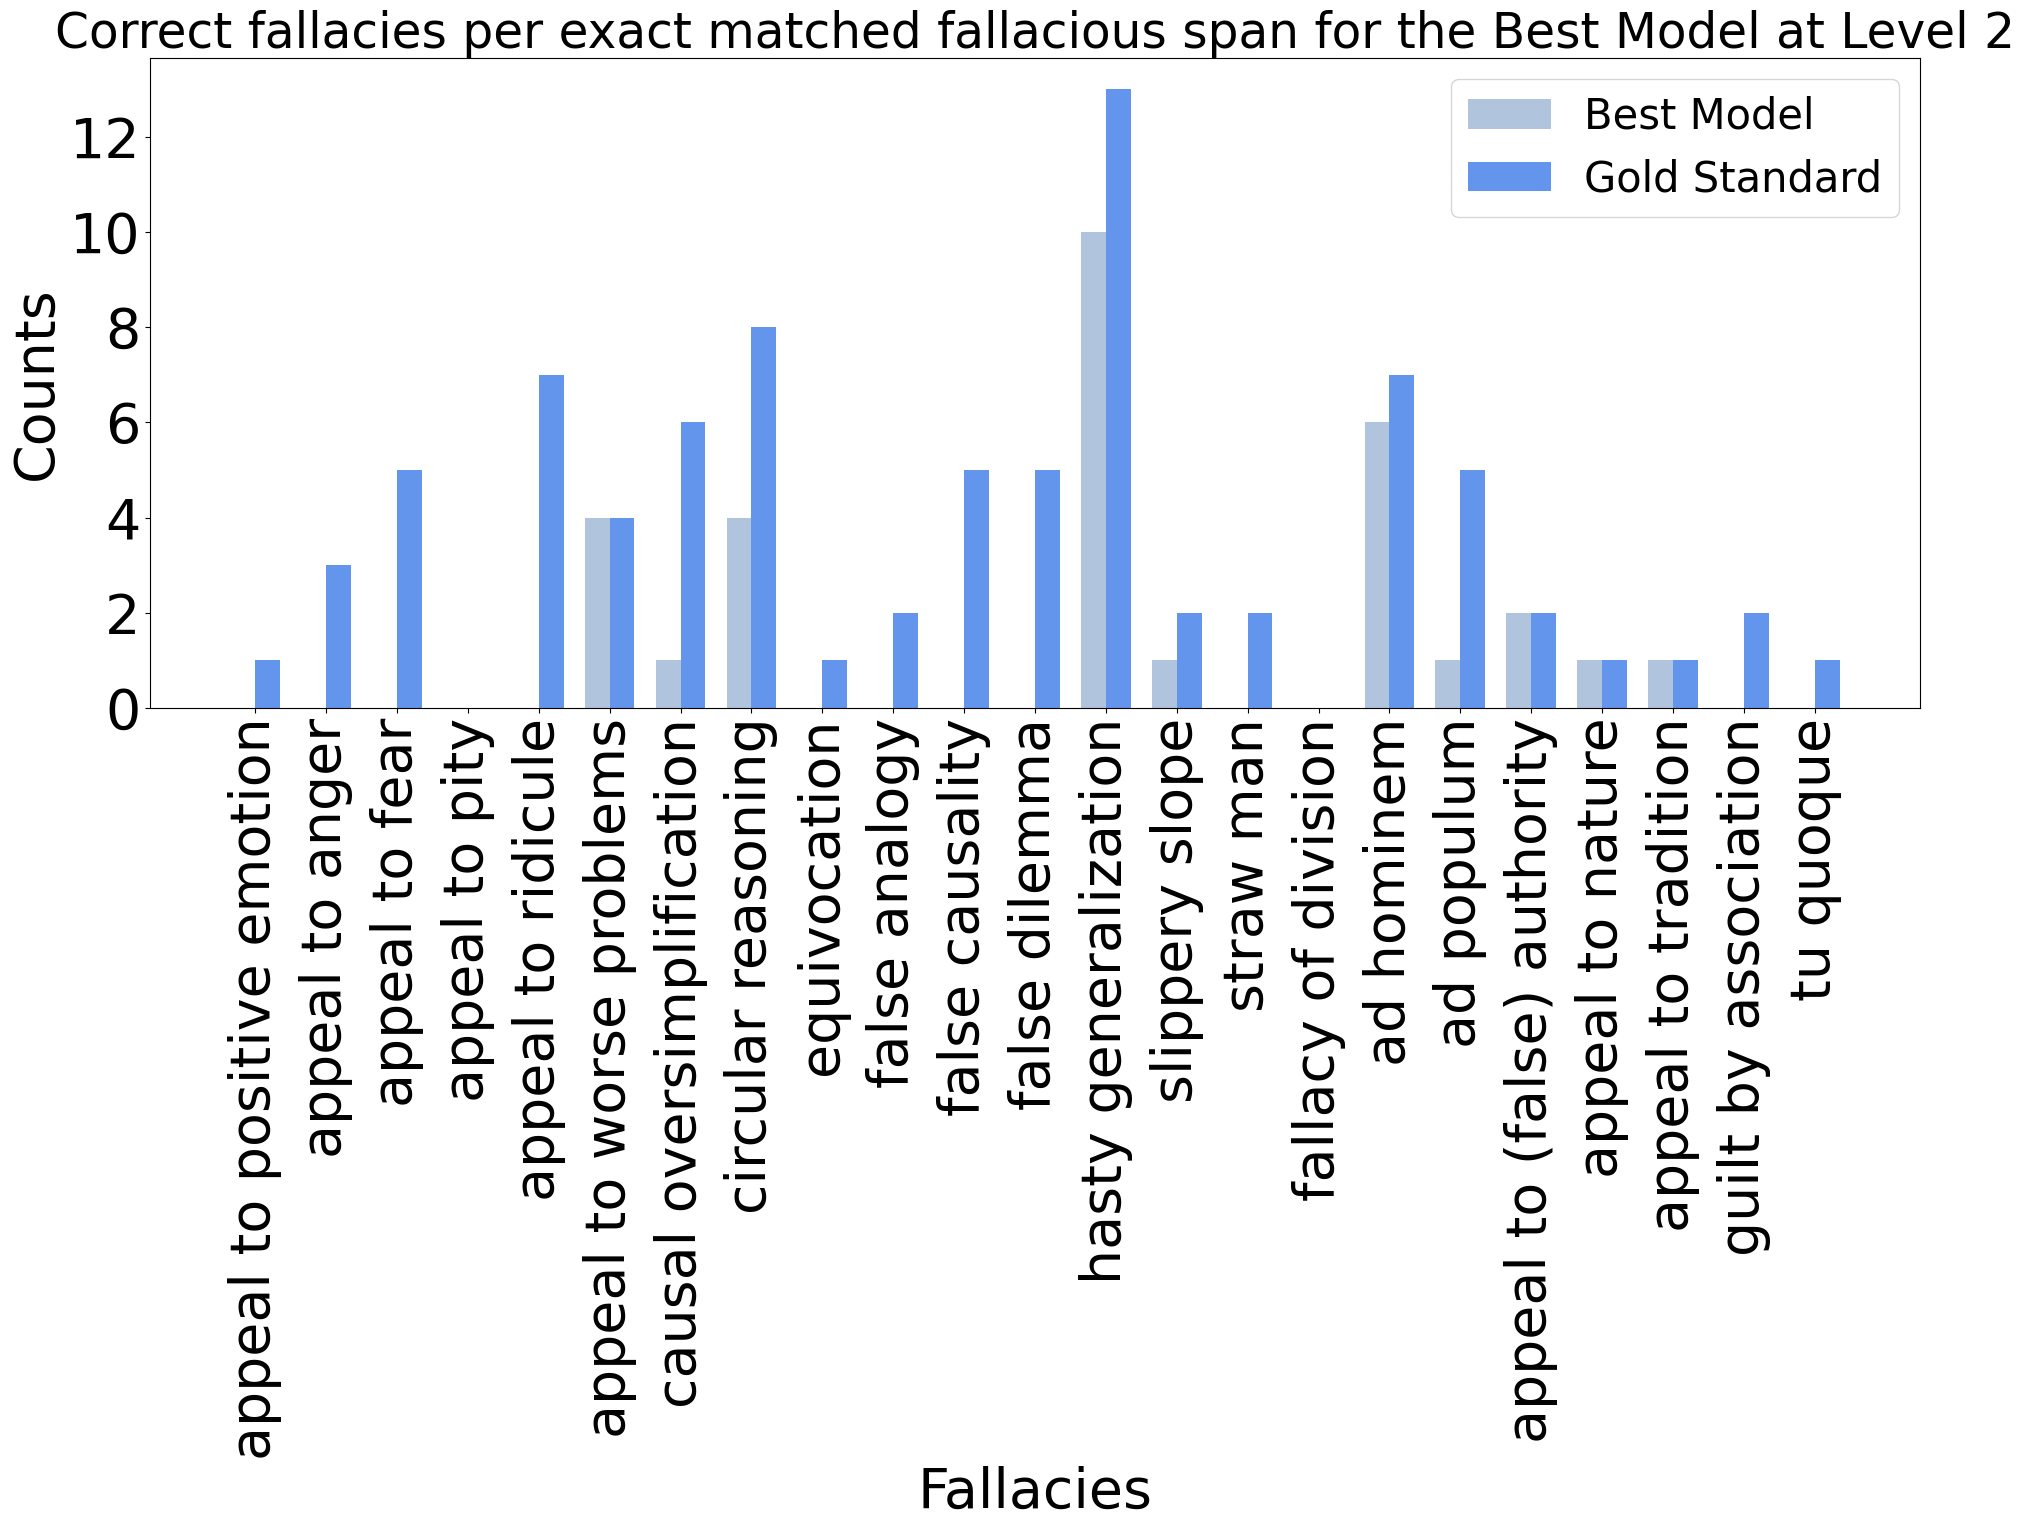

In [1196]:
plot_bar_labels_exact_match(gd_best_labels_count, pred_labels_count, "Best Model")

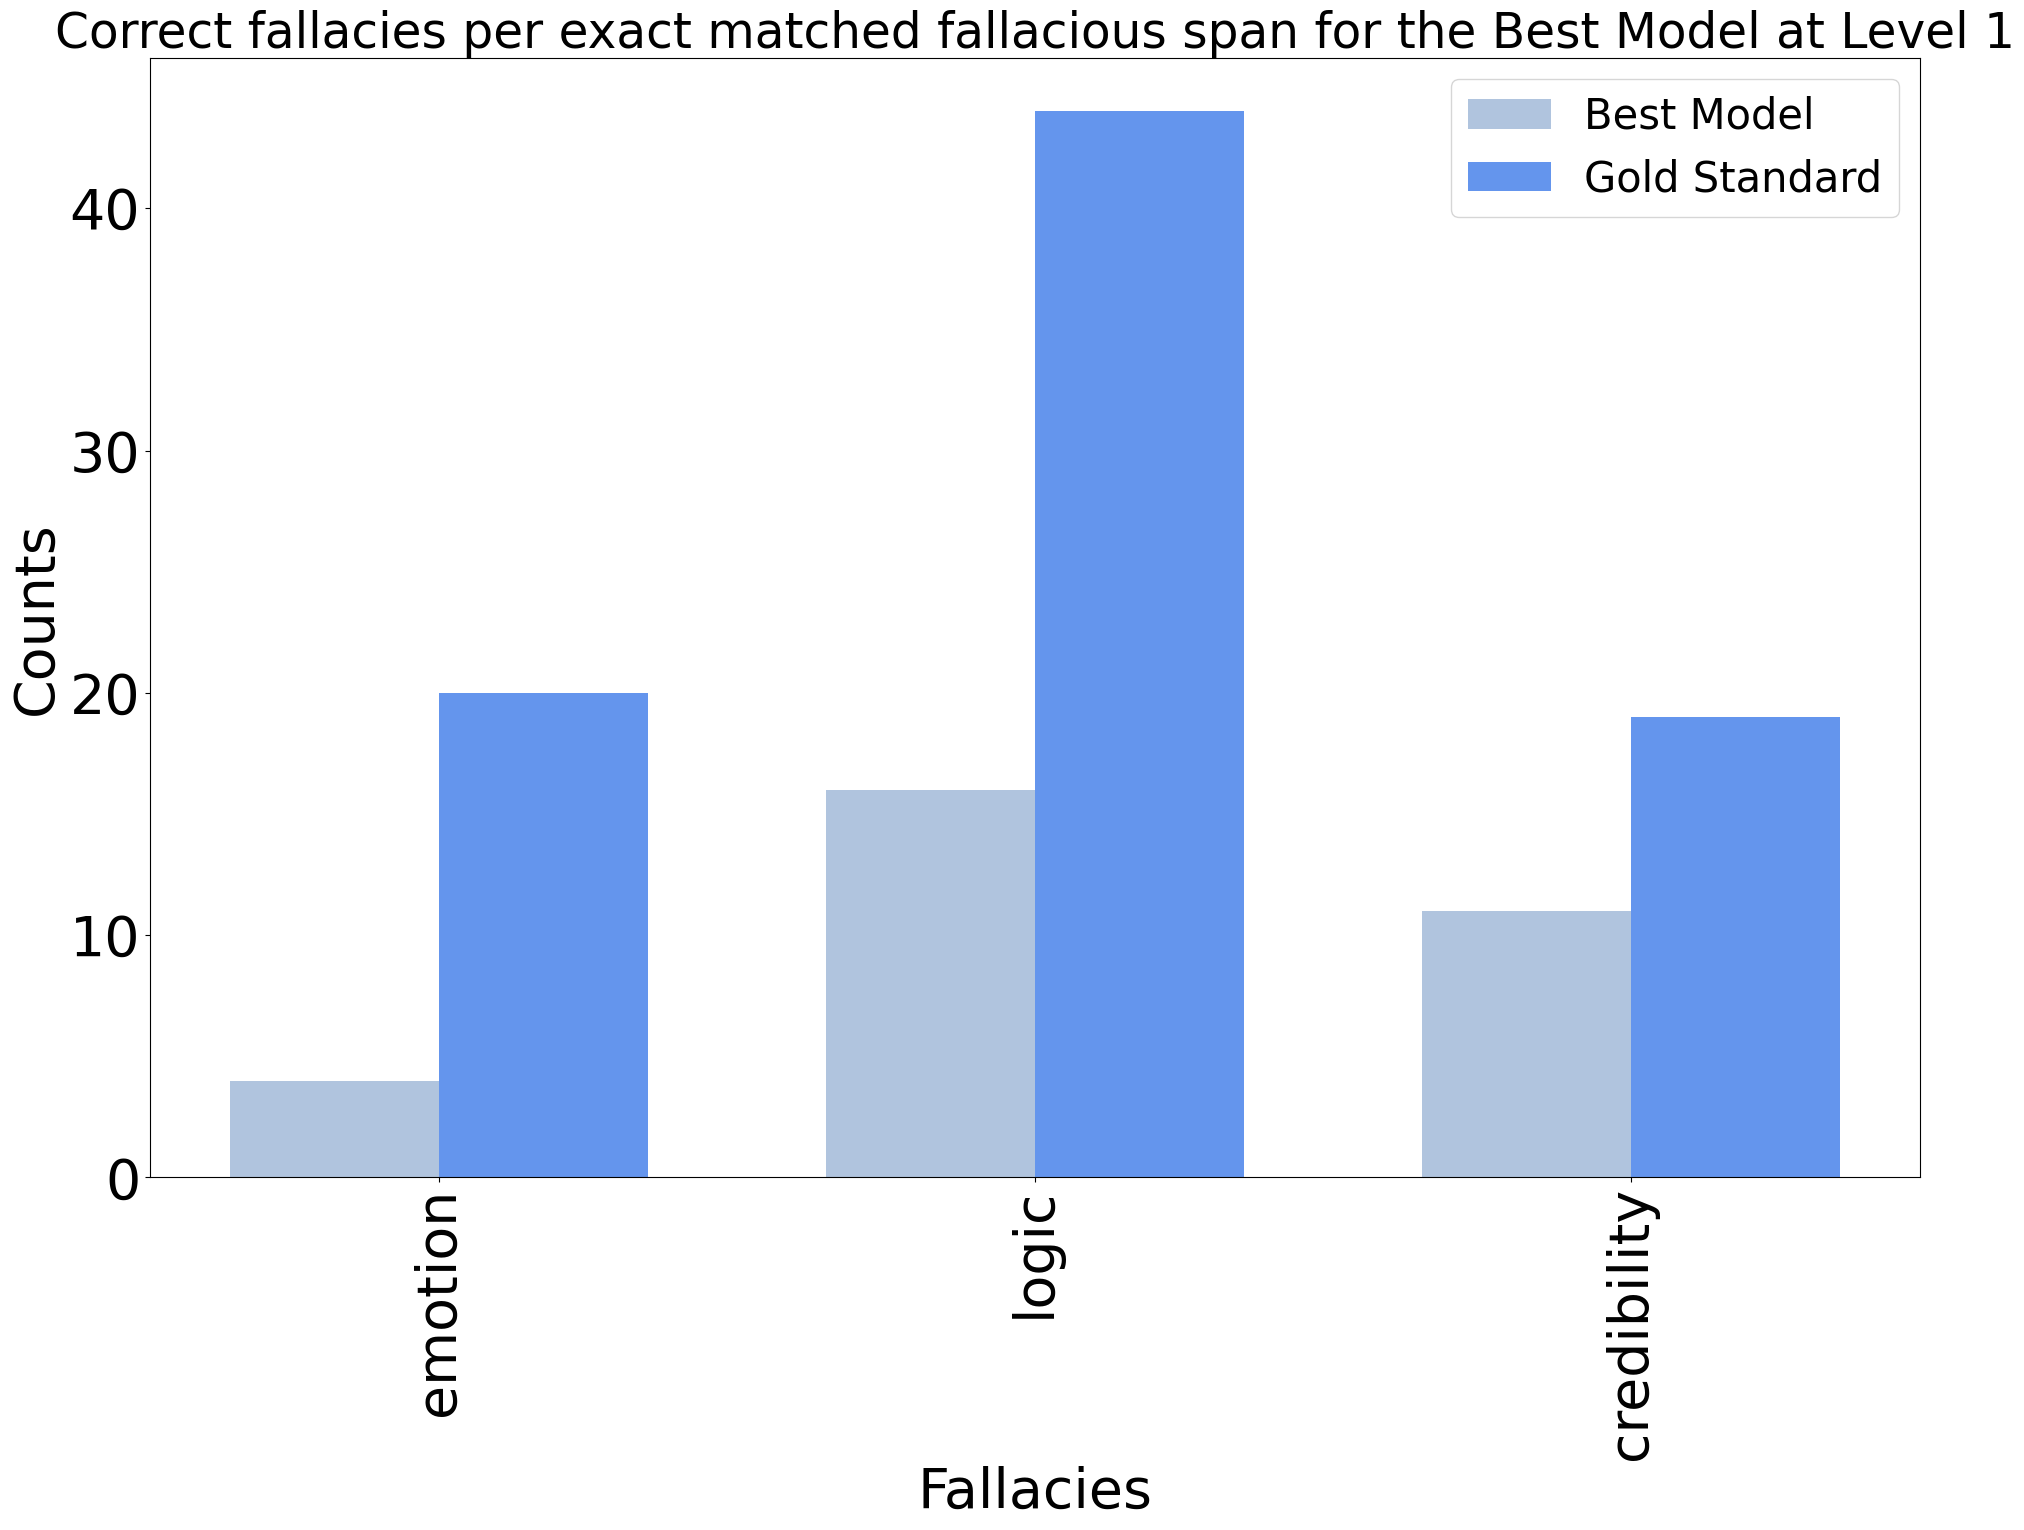

In [1197]:
plot_bar_labels_exact_match(transform_level_2_to_level_1(gd_best_labels_count), transform_level_2_to_level_1(pred_labels_count), "Best Model", "Level 1")

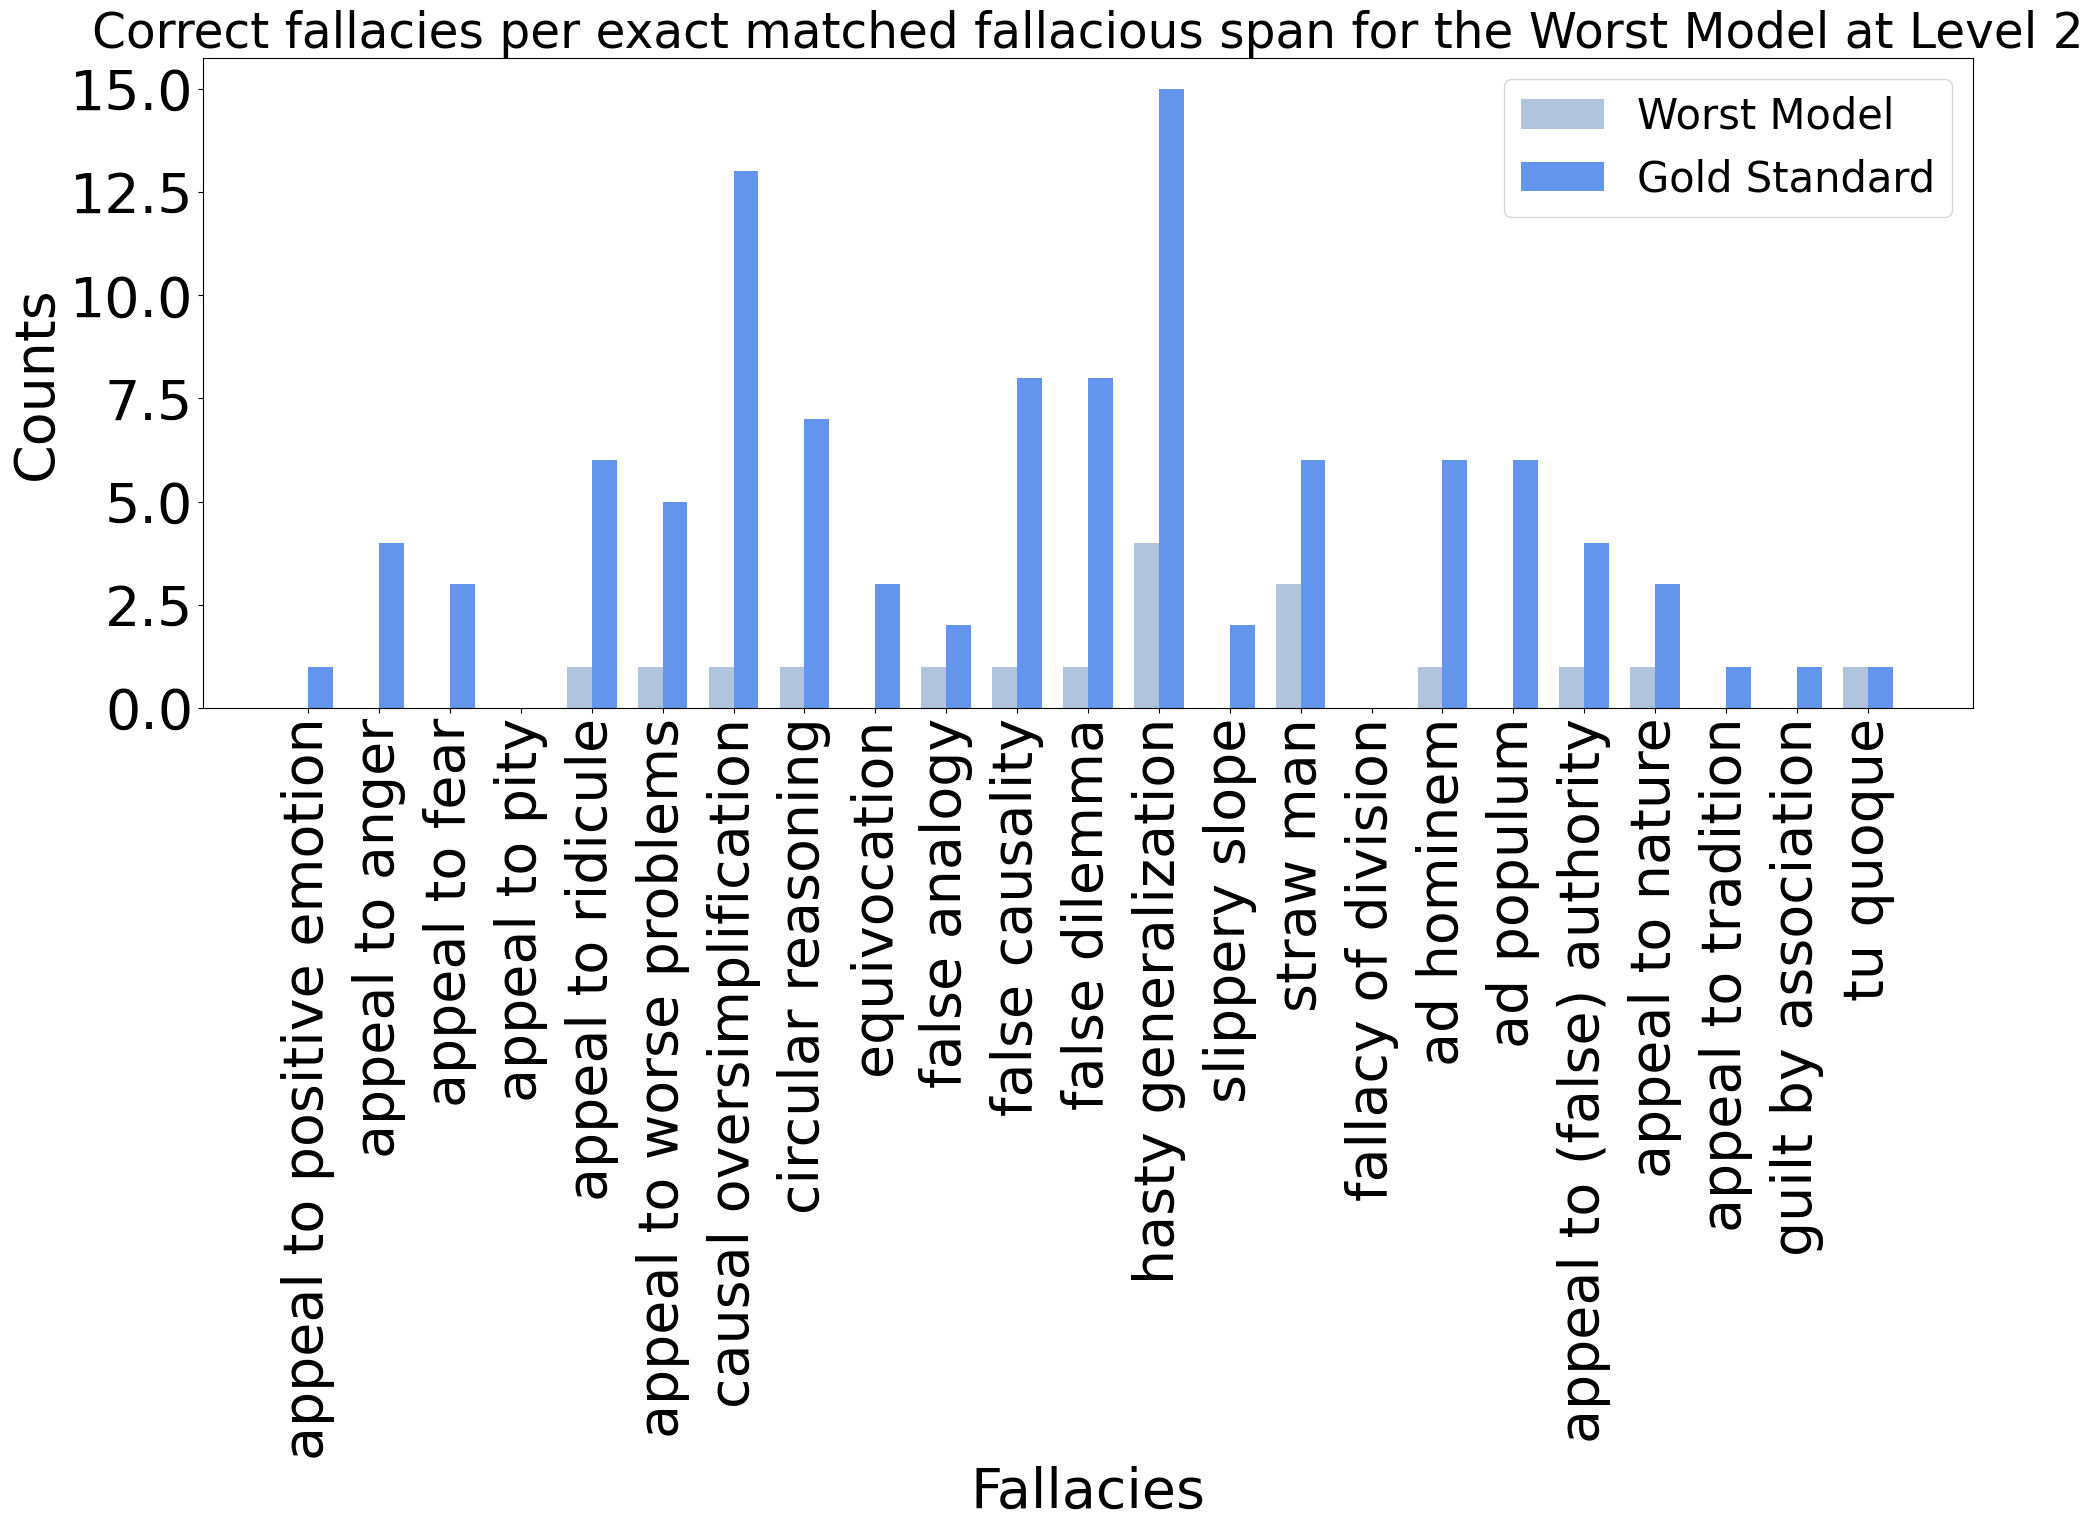

In [1198]:
plot_bar_labels_exact_match(gd_worst_labels_count, pred_worst_labels_count, "Worst Model")

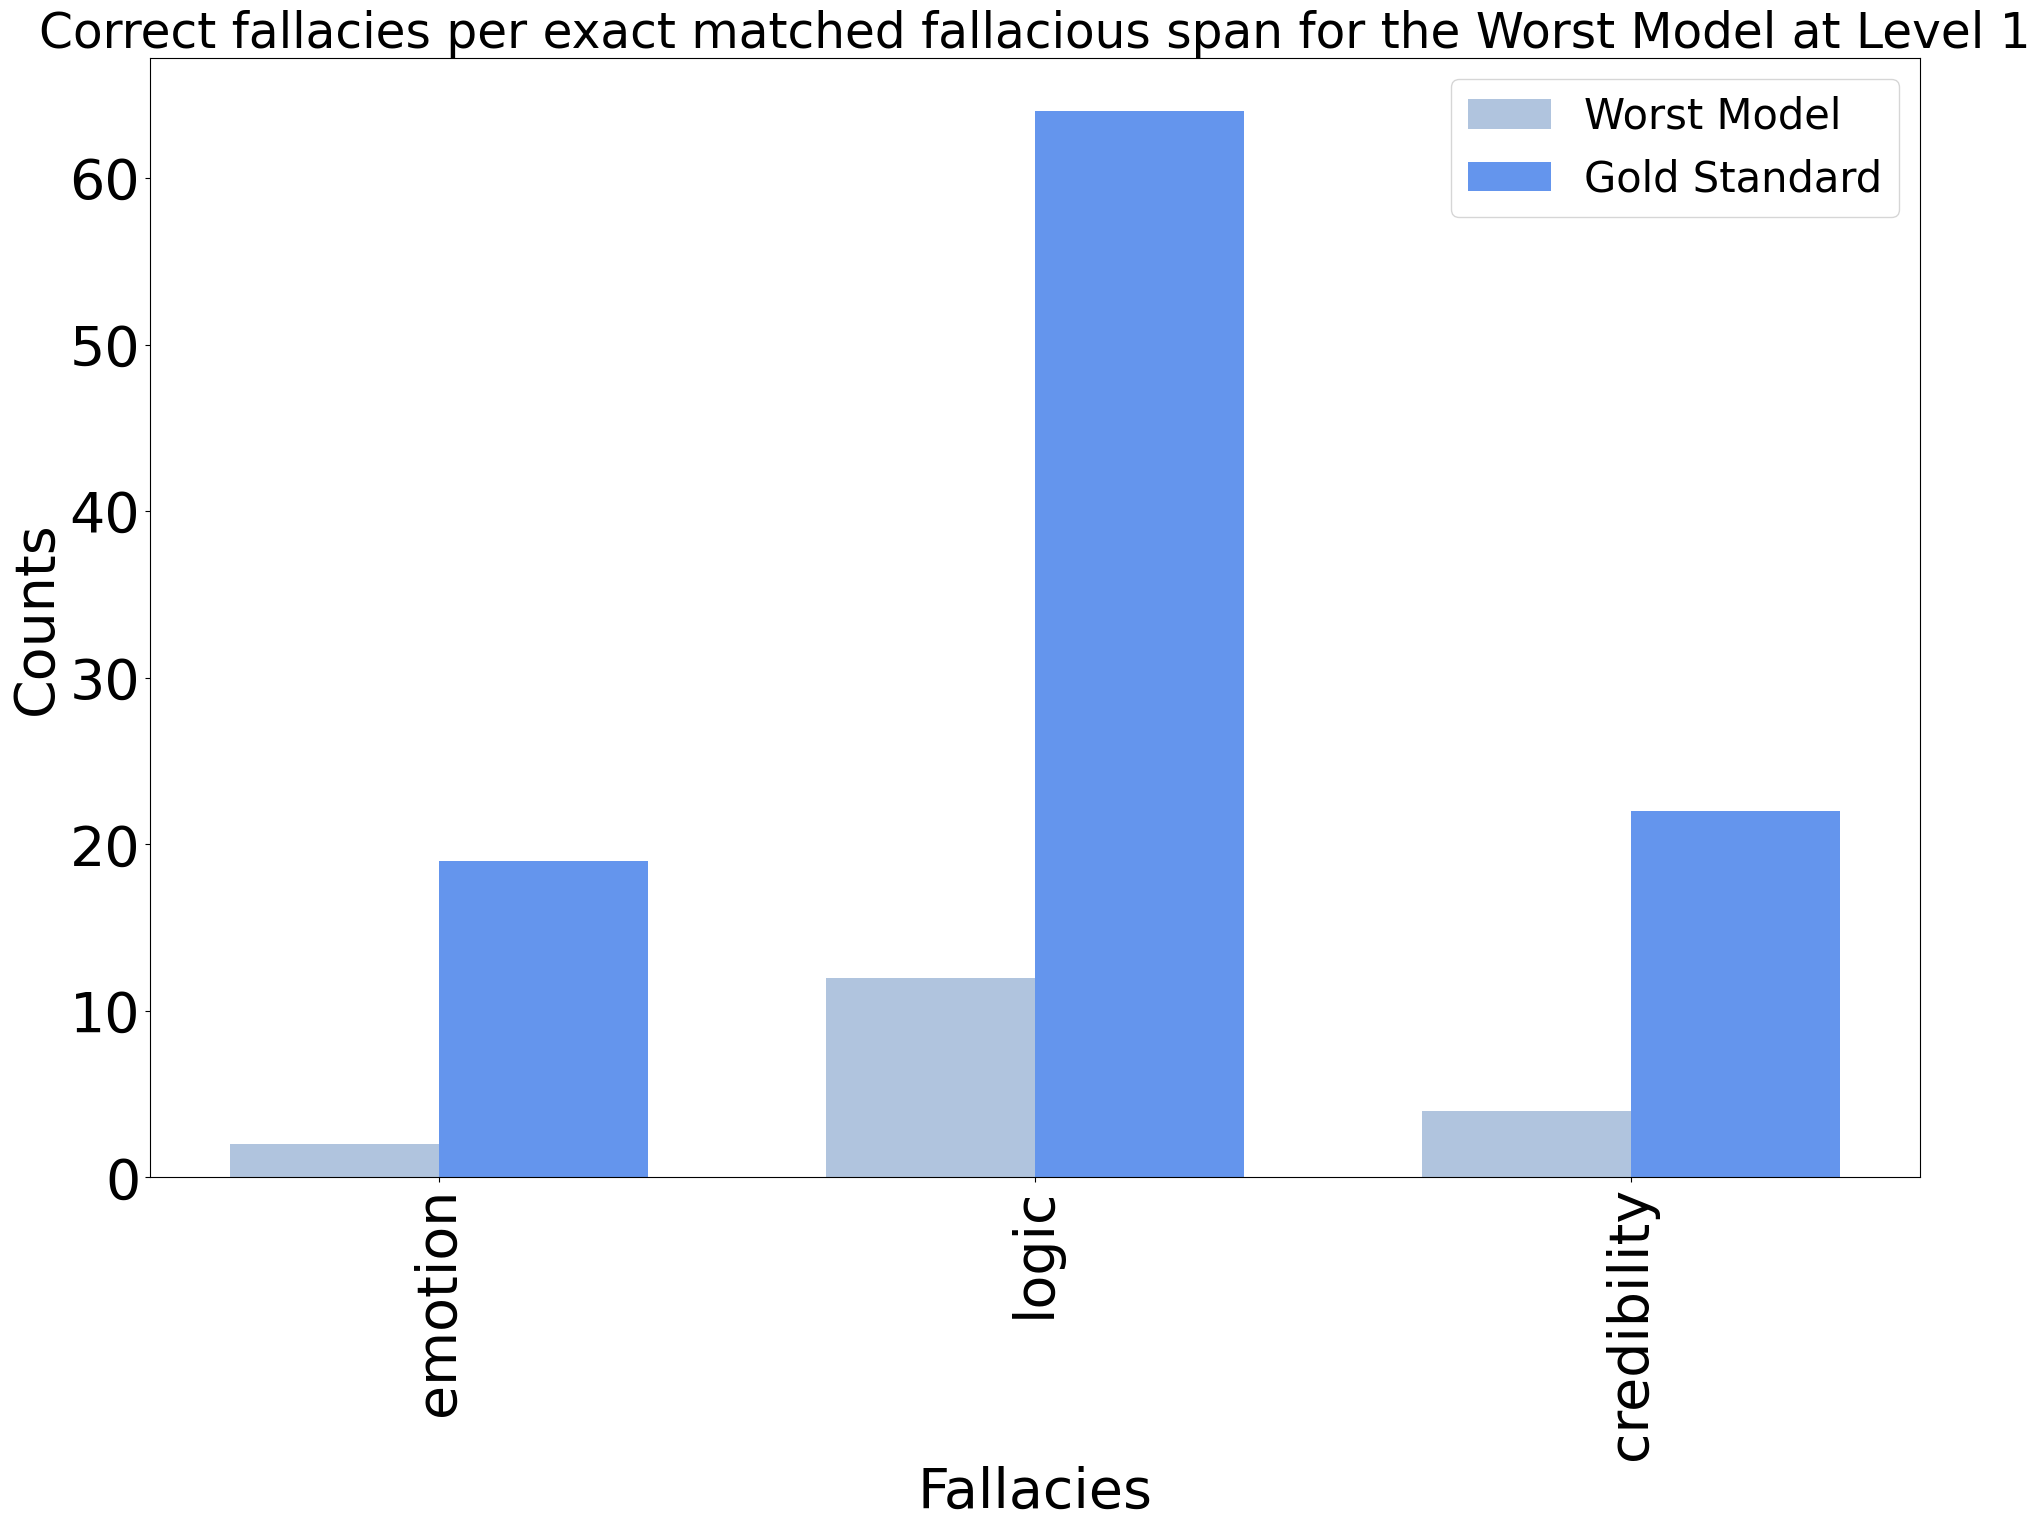

In [1199]:
plot_bar_labels_exact_match(transform_level_2_to_level_1(gd_worst_labels_count), transform_level_2_to_level_1(pred_worst_labels_count), "Worst Model", "Level 1")

## Error Analysis of Users

In [1200]:
gold_dataset = read_jsonl("datasets/user_study_examples_with_labels.jsonl")
pred_dataset_user_1 = read_jsonl("datasets/users_results/user1.jsonl")
pred_dataset_user_2 = read_jsonl("datasets/users_results/user2.jsonl")
pred_dataset_user_3 = read_jsonl("datasets/users_results/user4.jsonl")
pred_dataset_user_4 = read_jsonl("datasets/users_results/user5.jsonl")

all_y_true = []
all_y_pred_user_1 = []
all_y_pred_user_2 = []
all_y_pred_user_3 = []
all_y_pred_user_4 = []

for gold, pred_user_1, pred_user_2, pred_user_3, pred_user_4 in zip(gold_dataset, pred_dataset_user_1, pred_dataset_user_2, pred_dataset_user_3, pred_dataset_user_4):
    all_y_true.append(build_ground_truth_spans(gold["text"], gold["labels"]))
    all_y_pred_user_1.append(build_prediction_user_spans(pred_user_1["text"], pred_user_1["label"]))
    all_y_pred_user_2.append(build_prediction_user_spans(pred_user_2["text"], pred_user_2["label"]))
    all_y_pred_user_3.append(build_prediction_user_spans(pred_user_3["text"], pred_user_3["label"]))
    all_y_pred_user_4.append(build_prediction_user_spans(pred_user_4["text"], pred_user_4["label"]))


In [1201]:
all_dict_gold_spans, gold_labels_count = gold_truth_per_span(all_y_true)
all_dict_best_pred_span_user_1, best_pred_labels_count_user_1 = predictions_per_span(all_y_pred_user_1)
all_dict_best_pred_span_user_2, best_pred_labels_count_user_2 = predictions_per_span(all_y_pred_user_2)
all_dict_best_pred_span_user_3, best_pred_labels_count_user_3 = predictions_per_span(all_y_pred_user_3)
all_dict_best_pred_span_user_4, best_pred_labels_count_user_4 = predictions_per_span(all_y_pred_user_4)

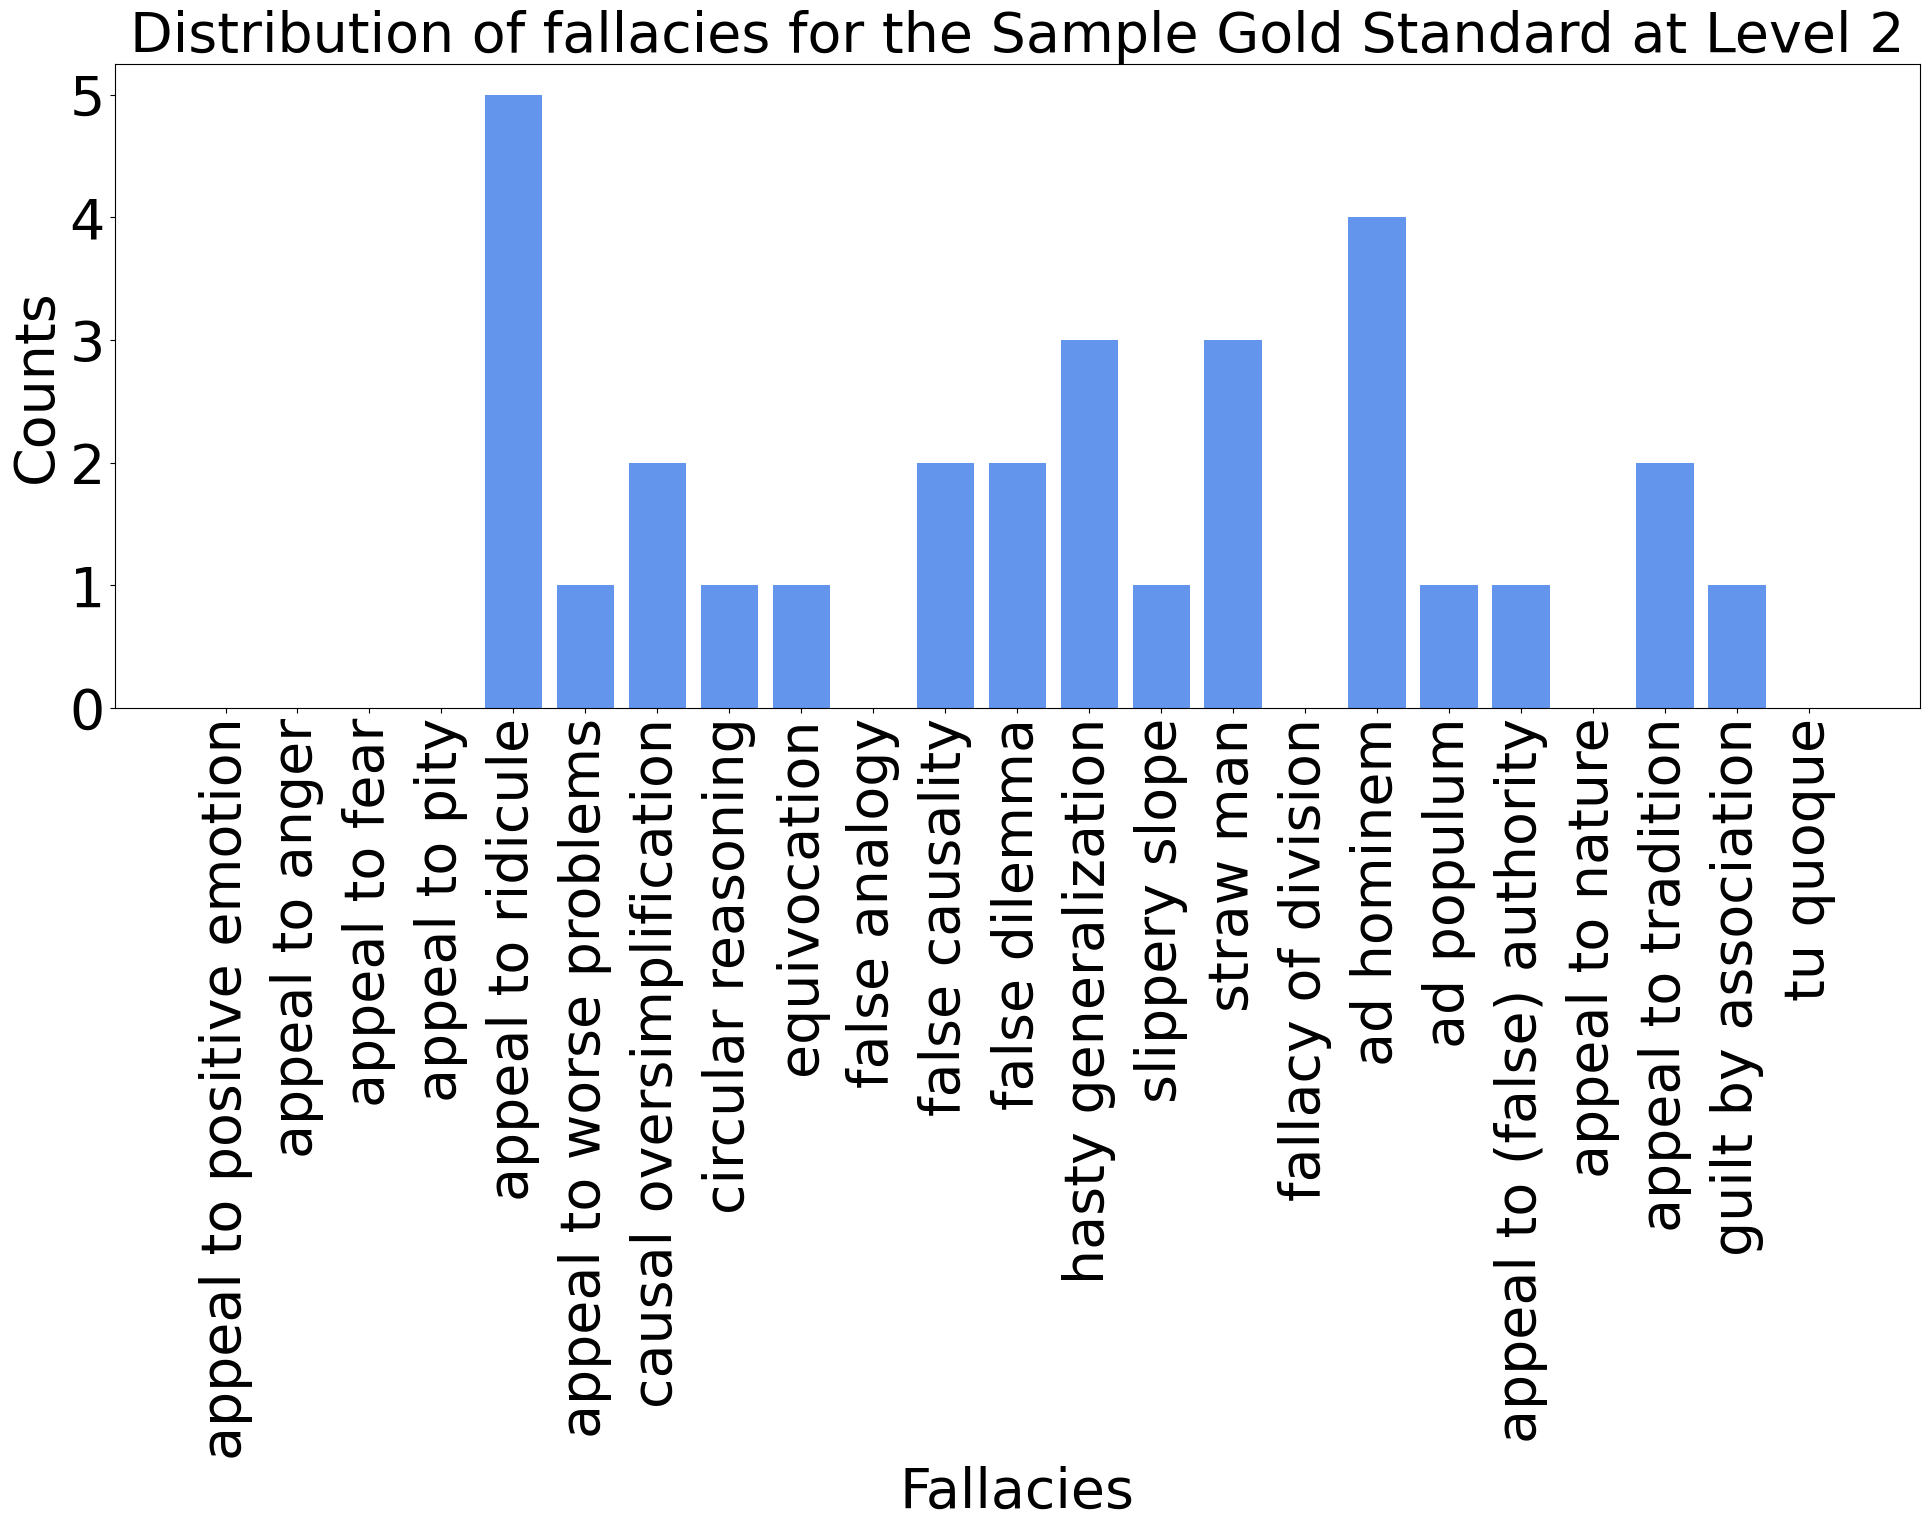

In [1202]:
plot_bar_labels_count(gold_labels_count, "Sample Gold Standard", "Level 2")

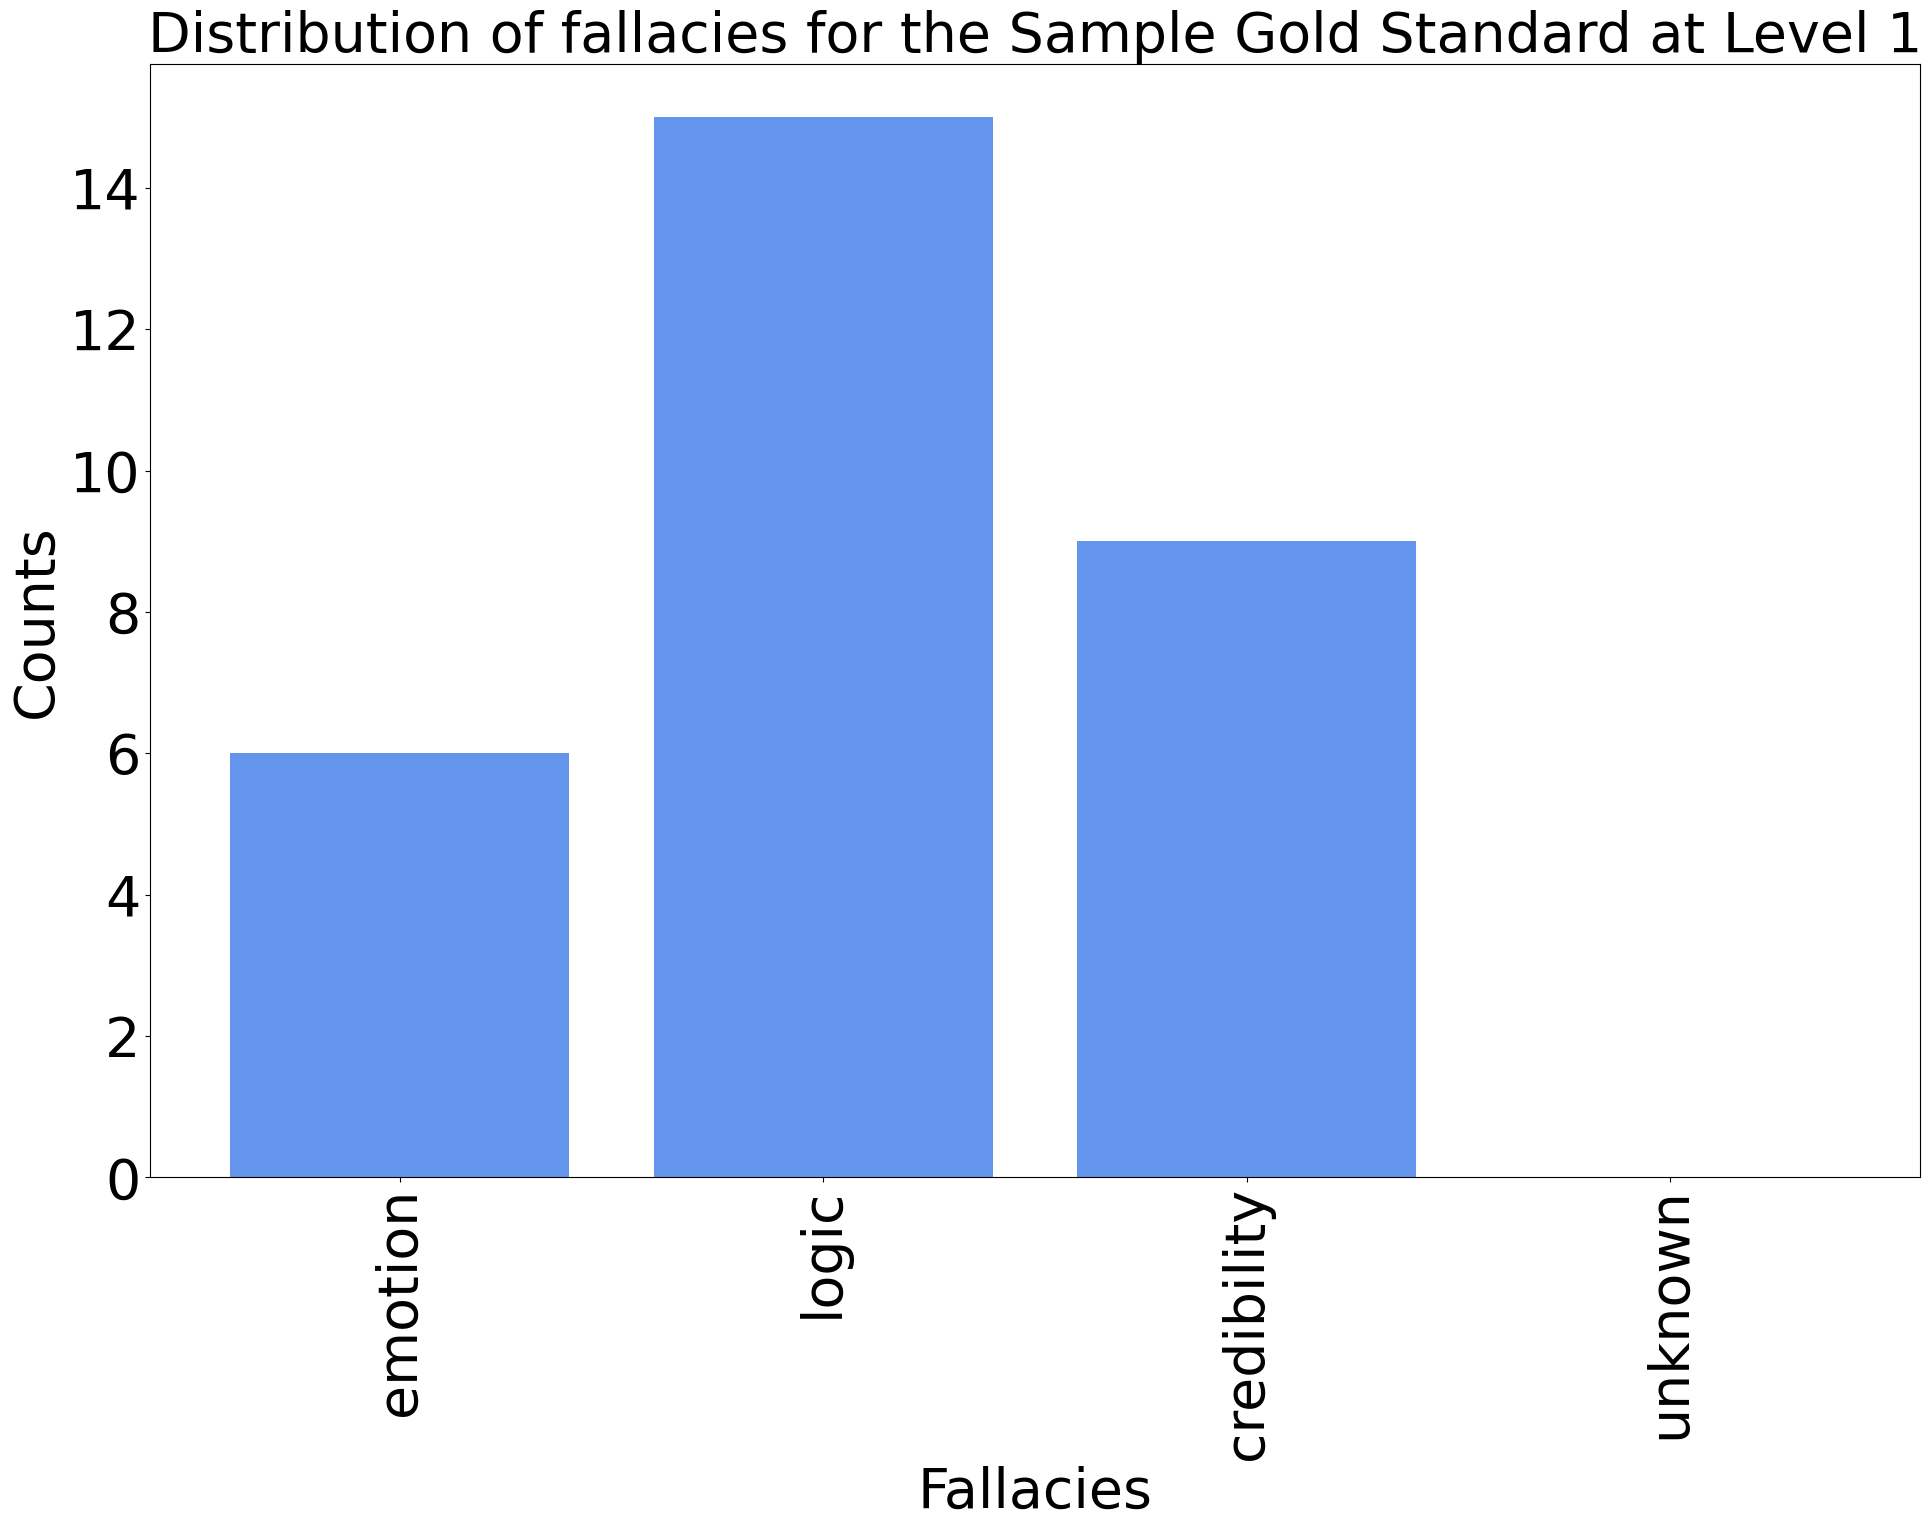

In [1203]:
plot_bar_labels_count(transform_level_2_to_level_1(gold_labels_count), "Sample Gold Standard", "Level 1")

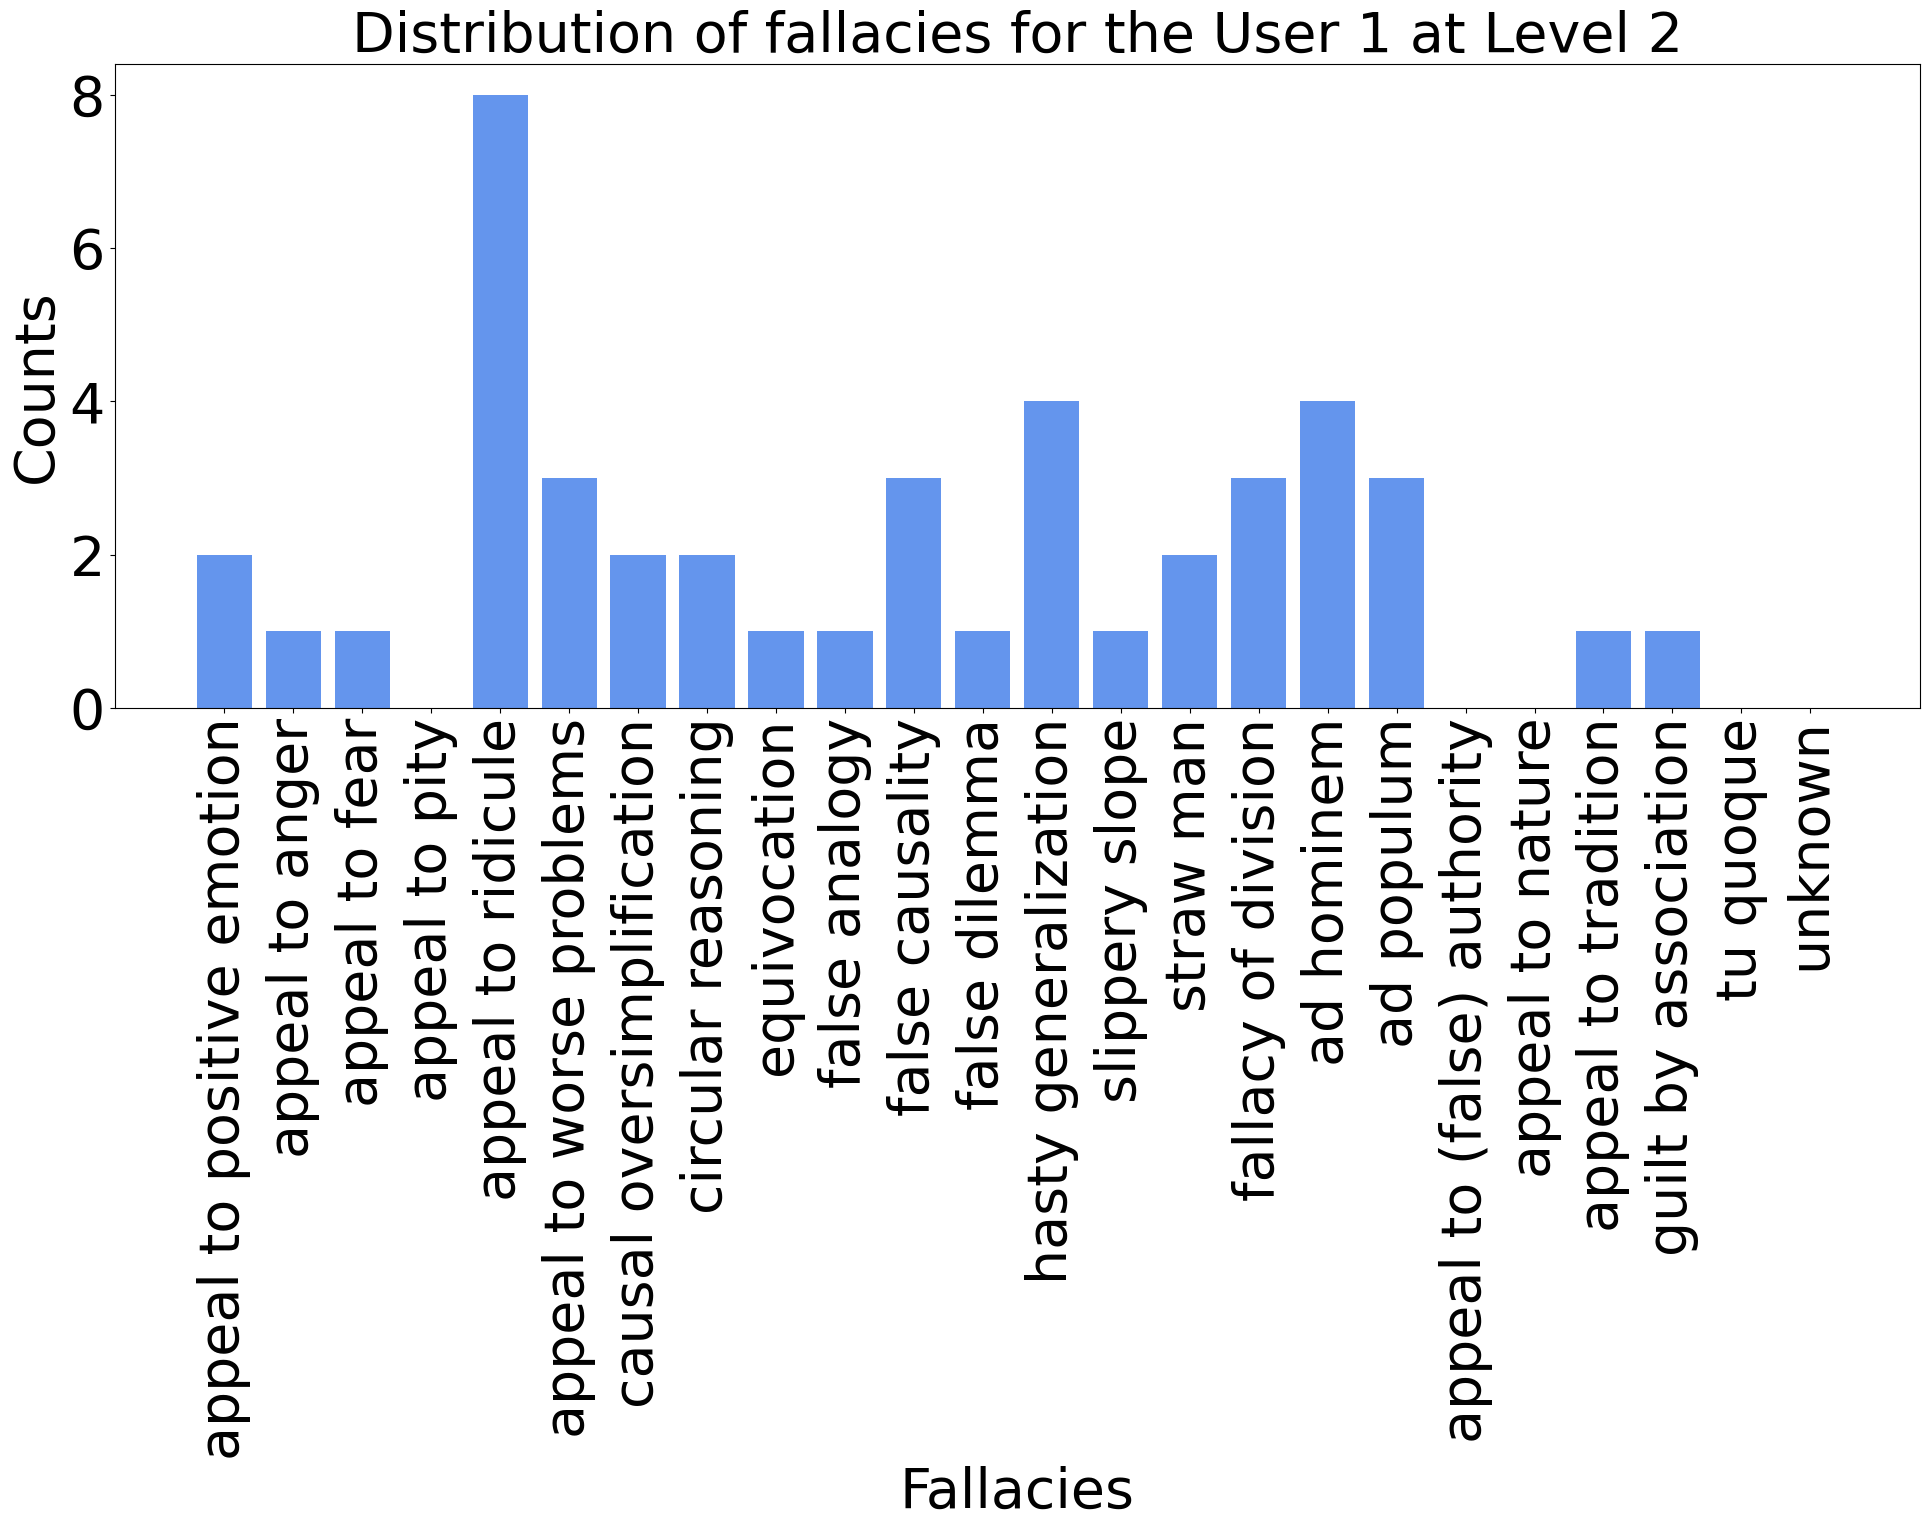

In [1204]:
plot_bar_labels_count(best_pred_labels_count_user_1, "User 1", "Level 2")

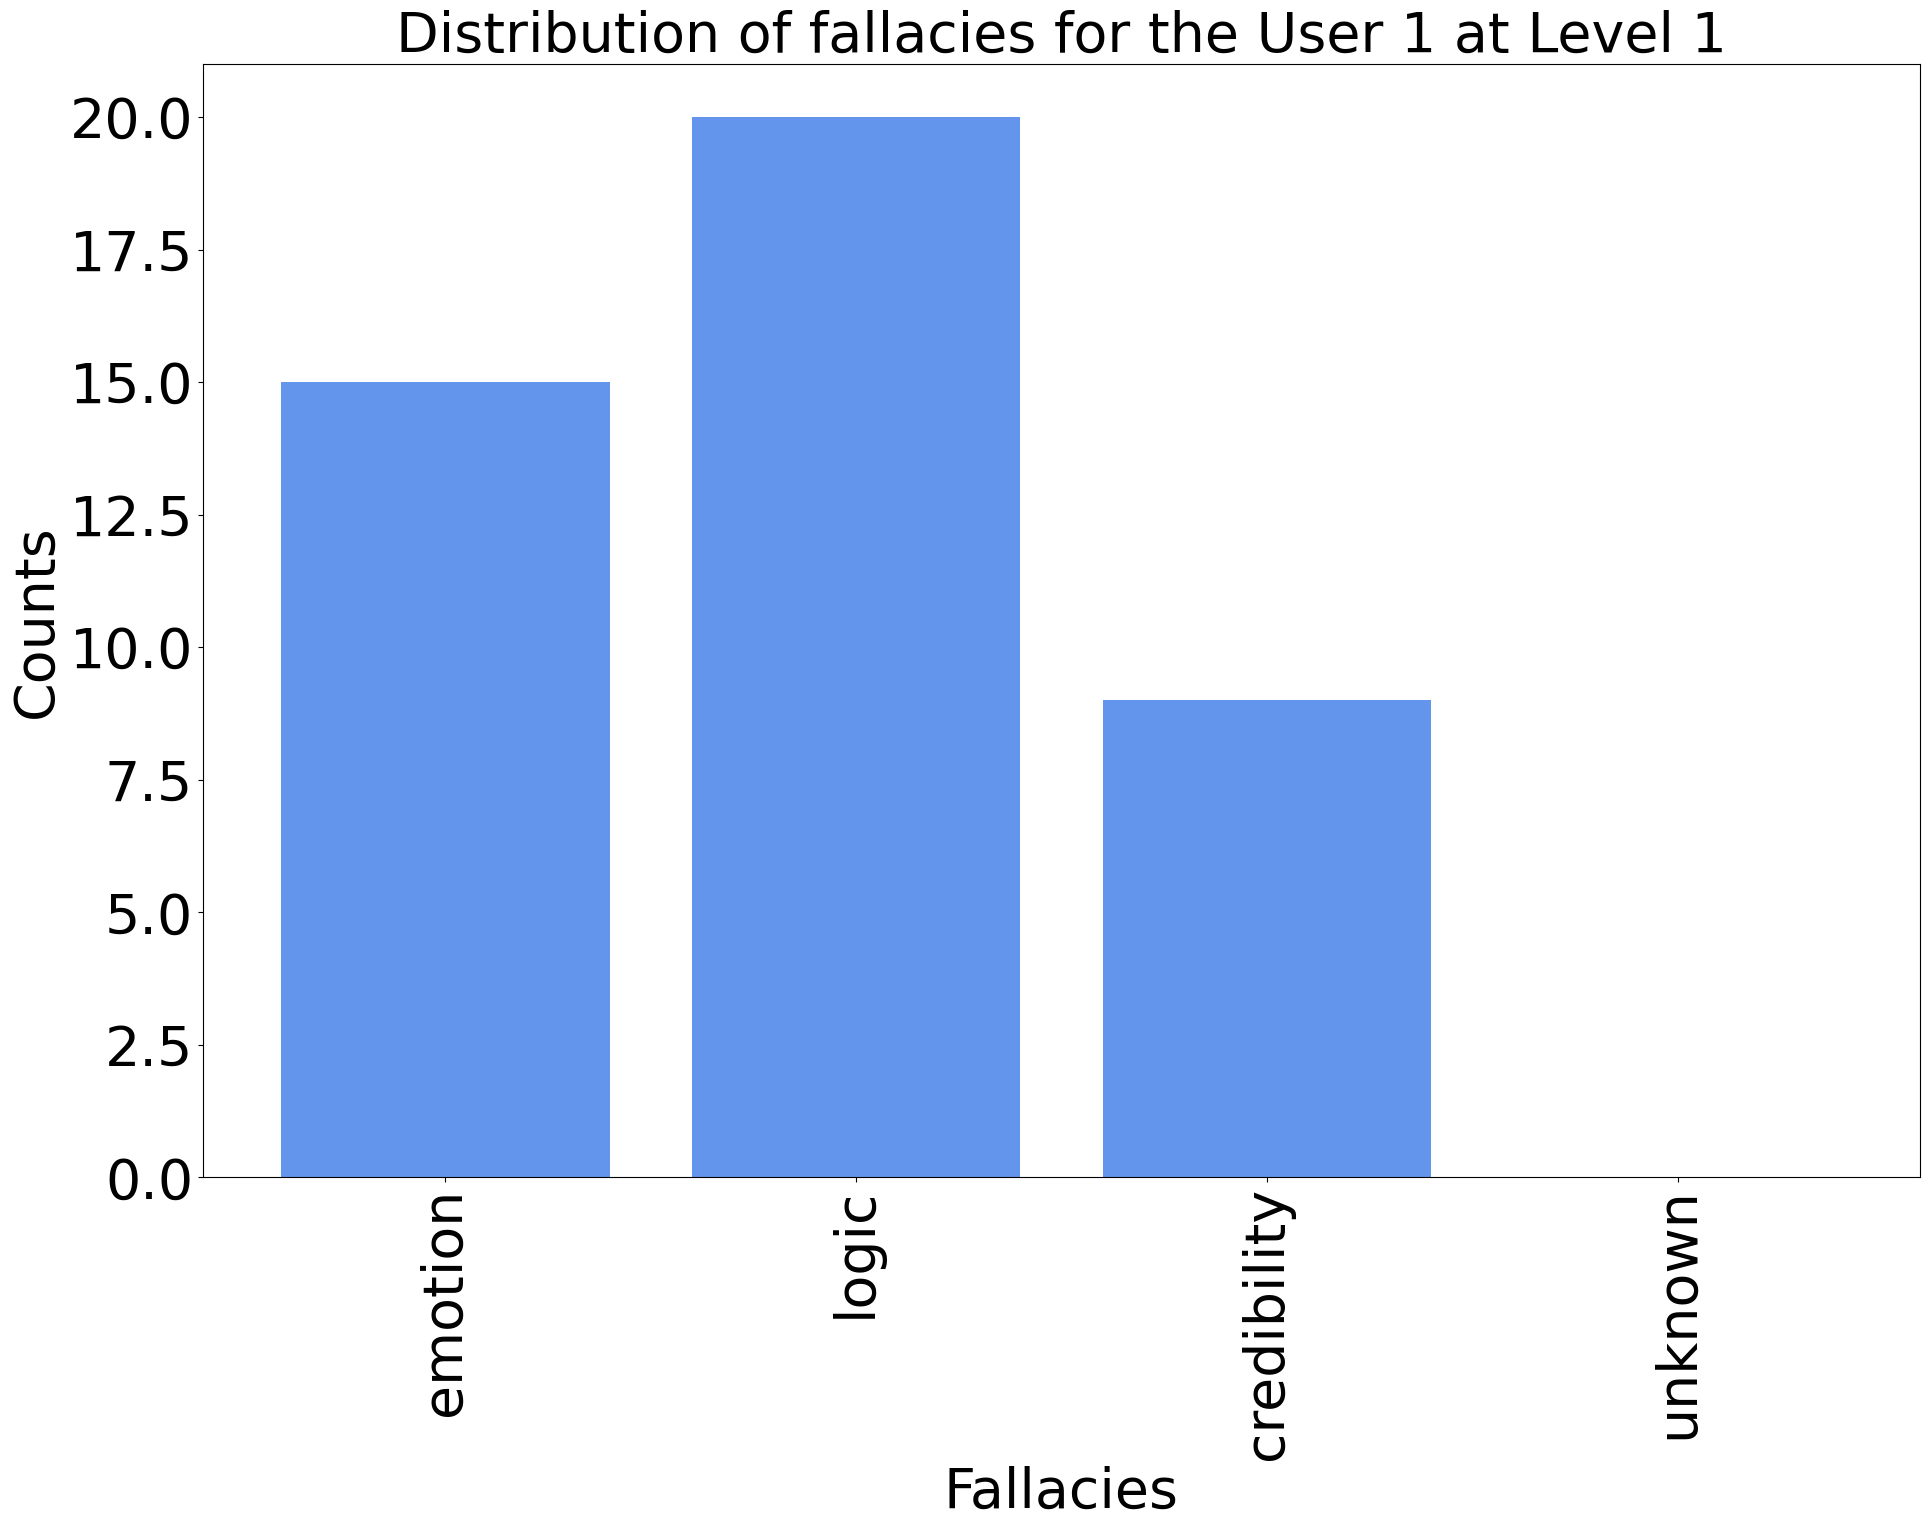

In [1205]:
plot_bar_labels_count(transform_level_2_to_level_1(best_pred_labels_count_user_1), "User 1", "Level 1")

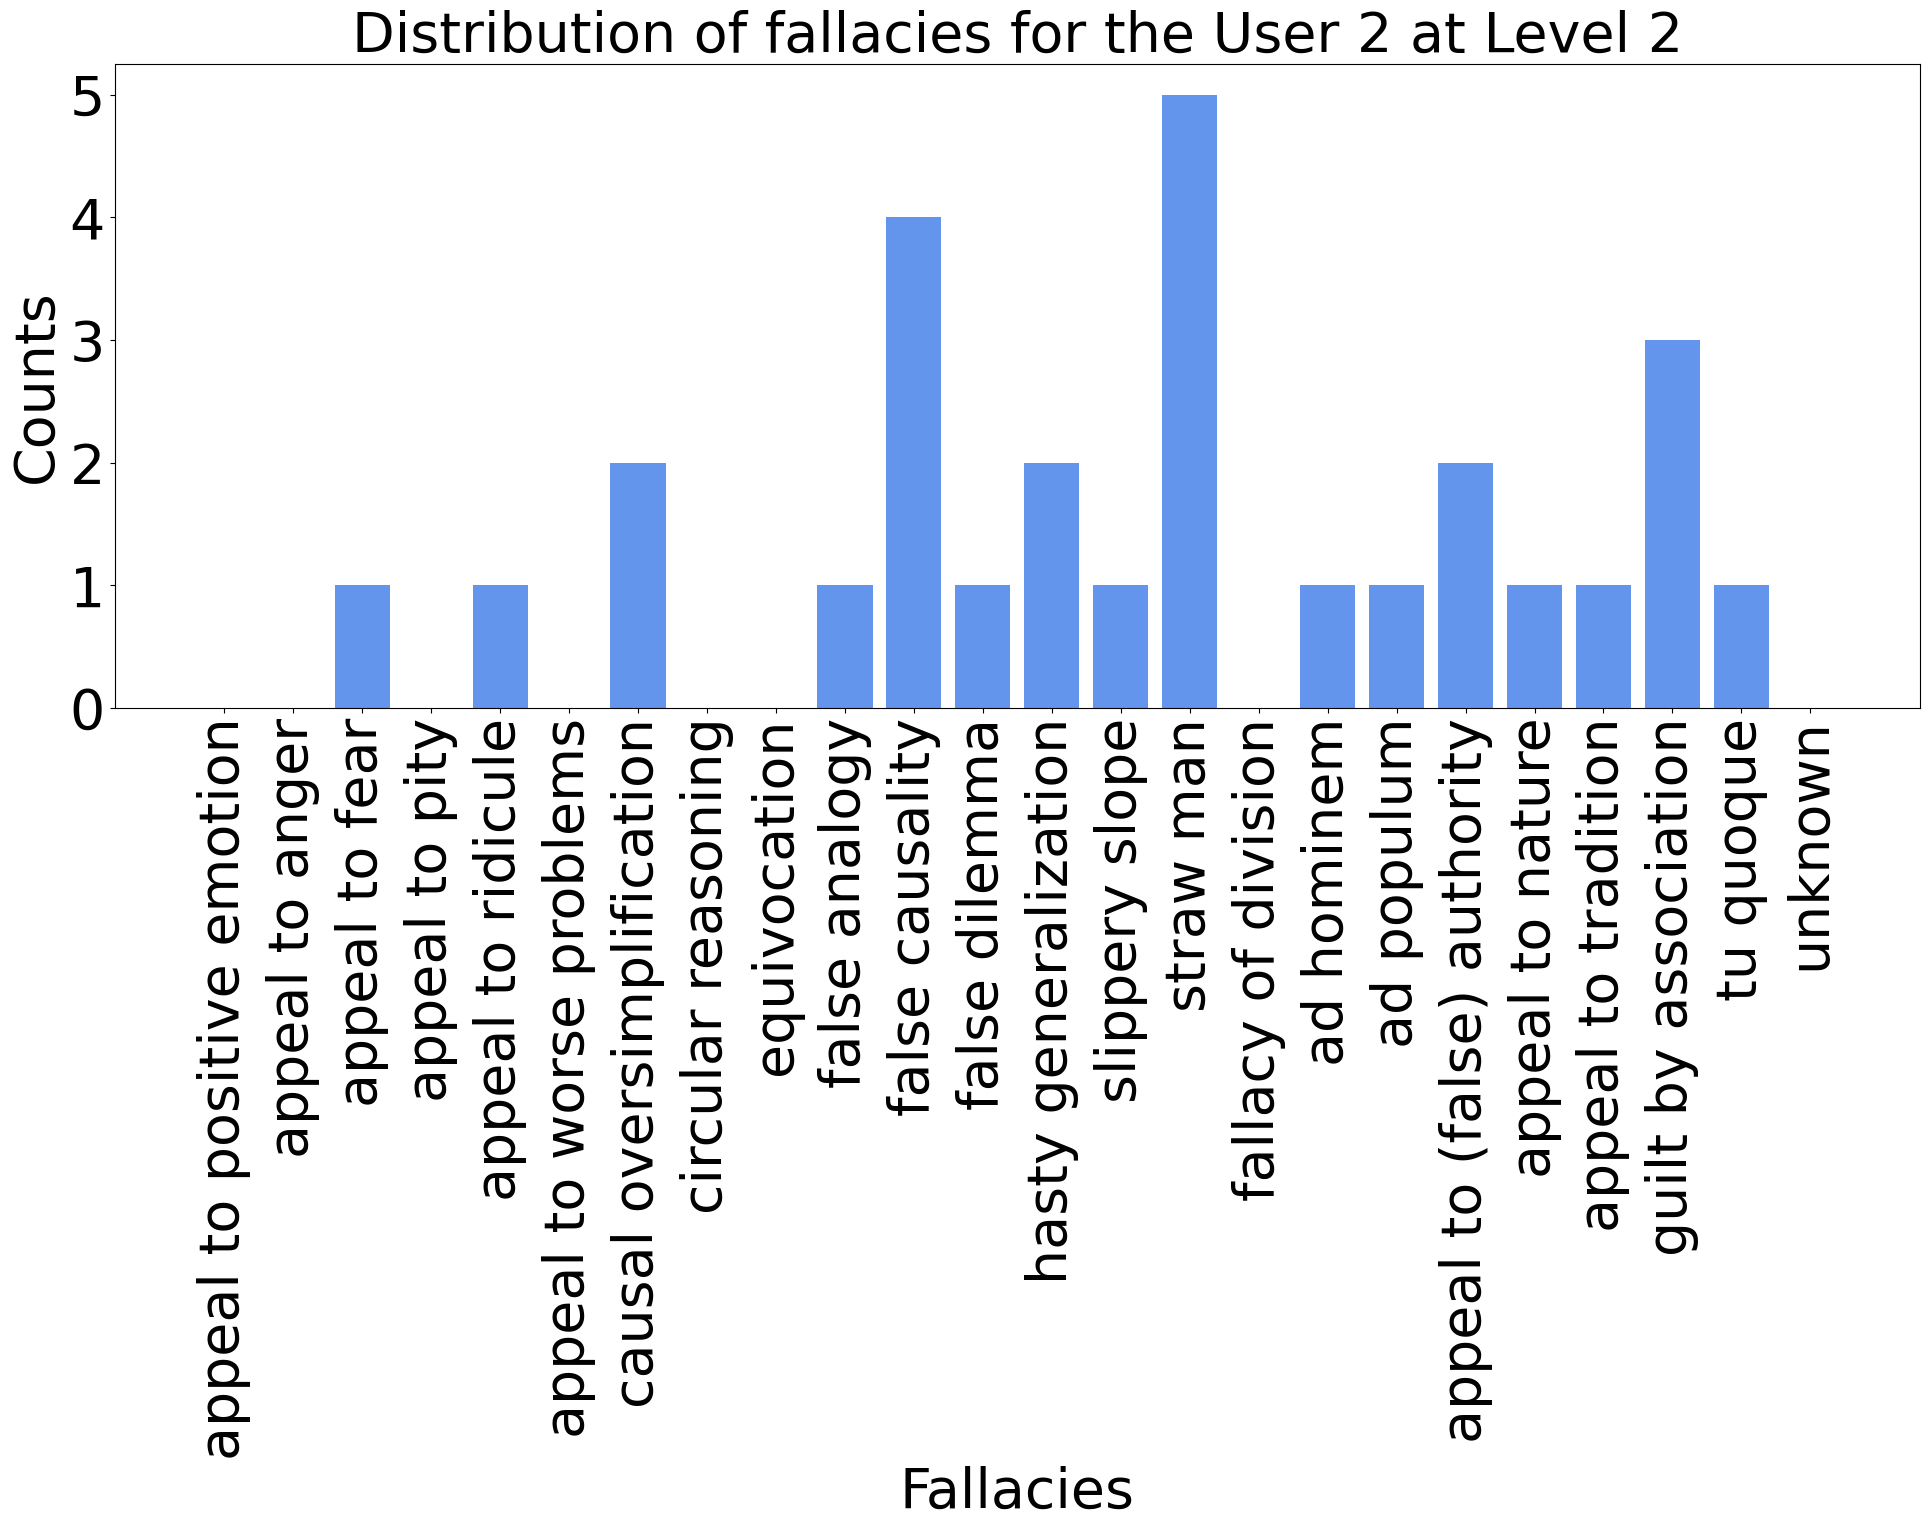

In [1206]:
plot_bar_labels_count(best_pred_labels_count_user_2, "User 2", "Level 2")

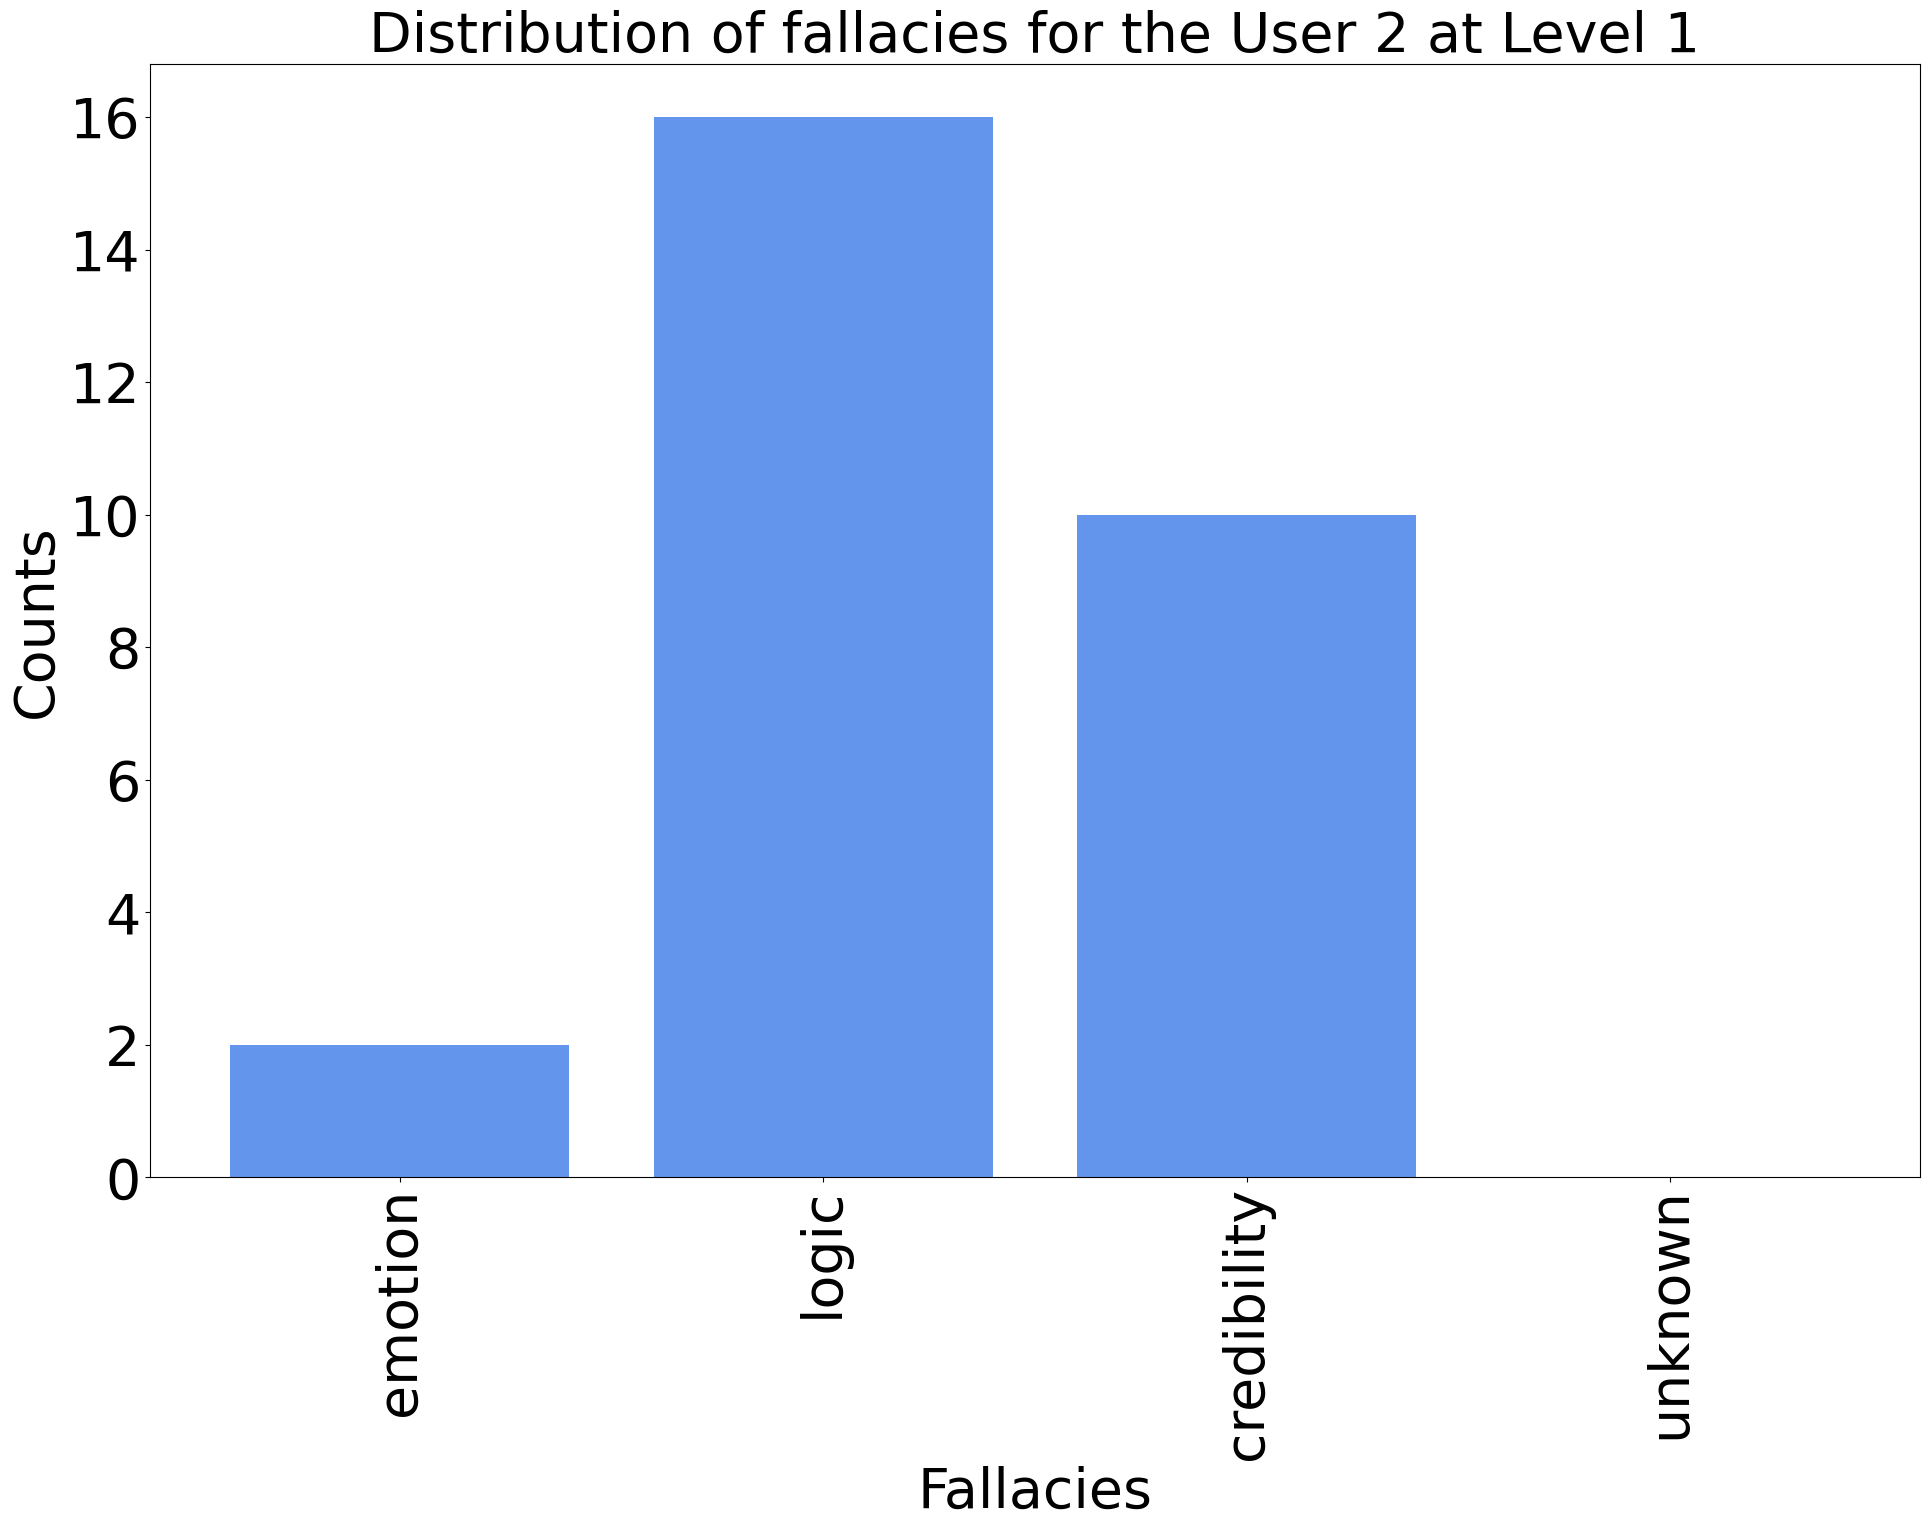

In [1207]:
plot_bar_labels_count(transform_level_2_to_level_1(best_pred_labels_count_user_2), "User 2", "Level 1") 

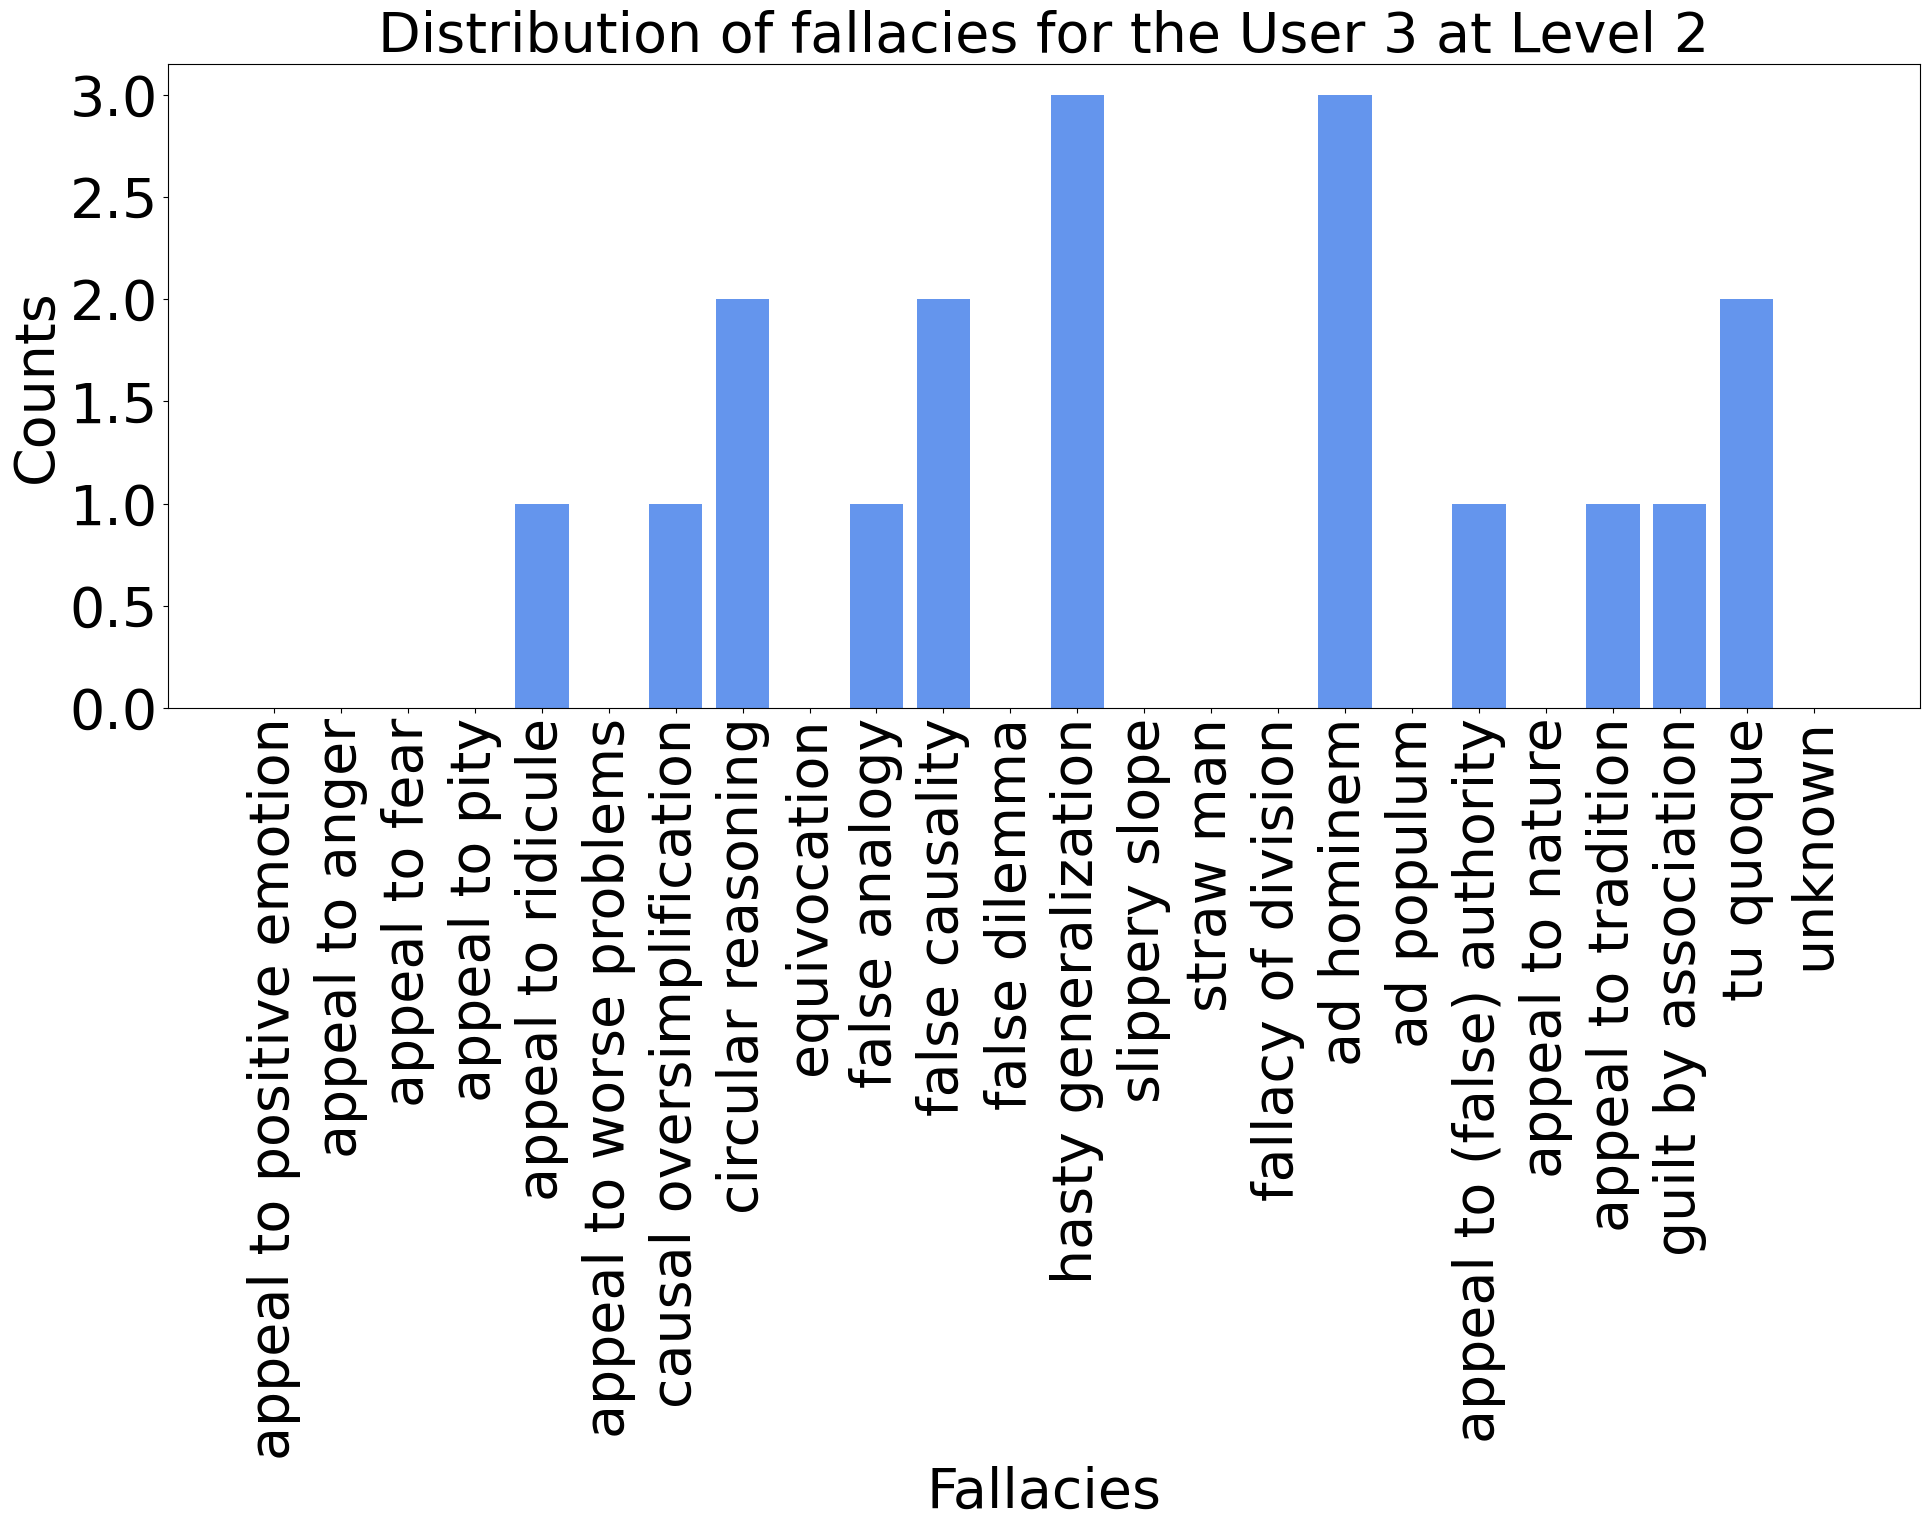

In [1208]:
plot_bar_labels_count(best_pred_labels_count_user_3, "User 3", "Level 2")

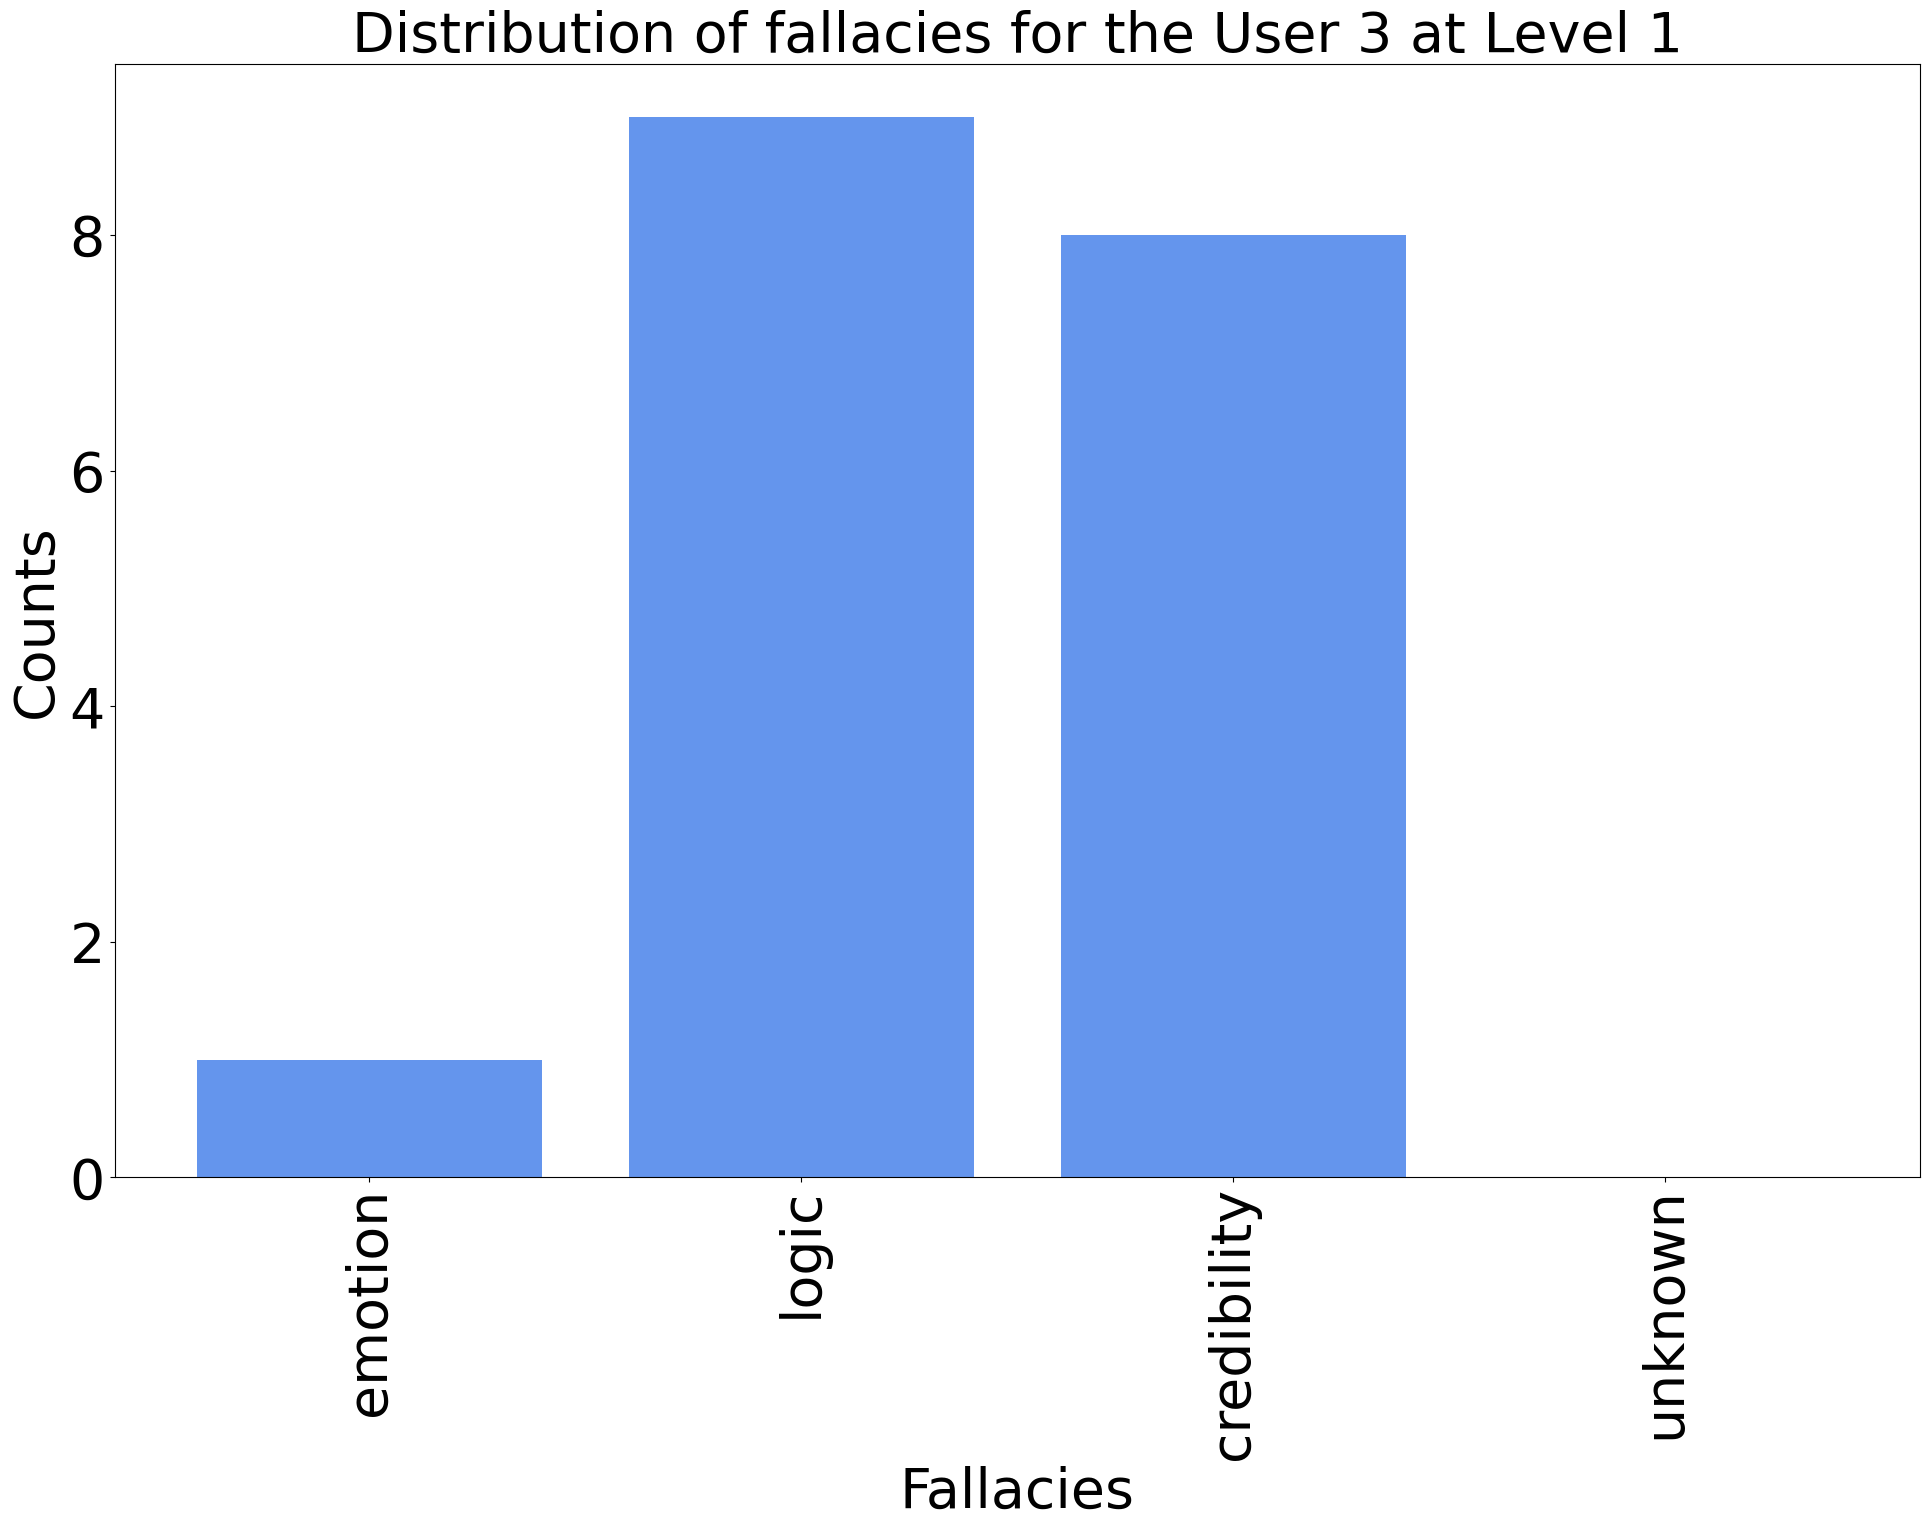

In [1209]:
plot_bar_labels_count(transform_level_2_to_level_1(best_pred_labels_count_user_3), "User 3", "Level 1")

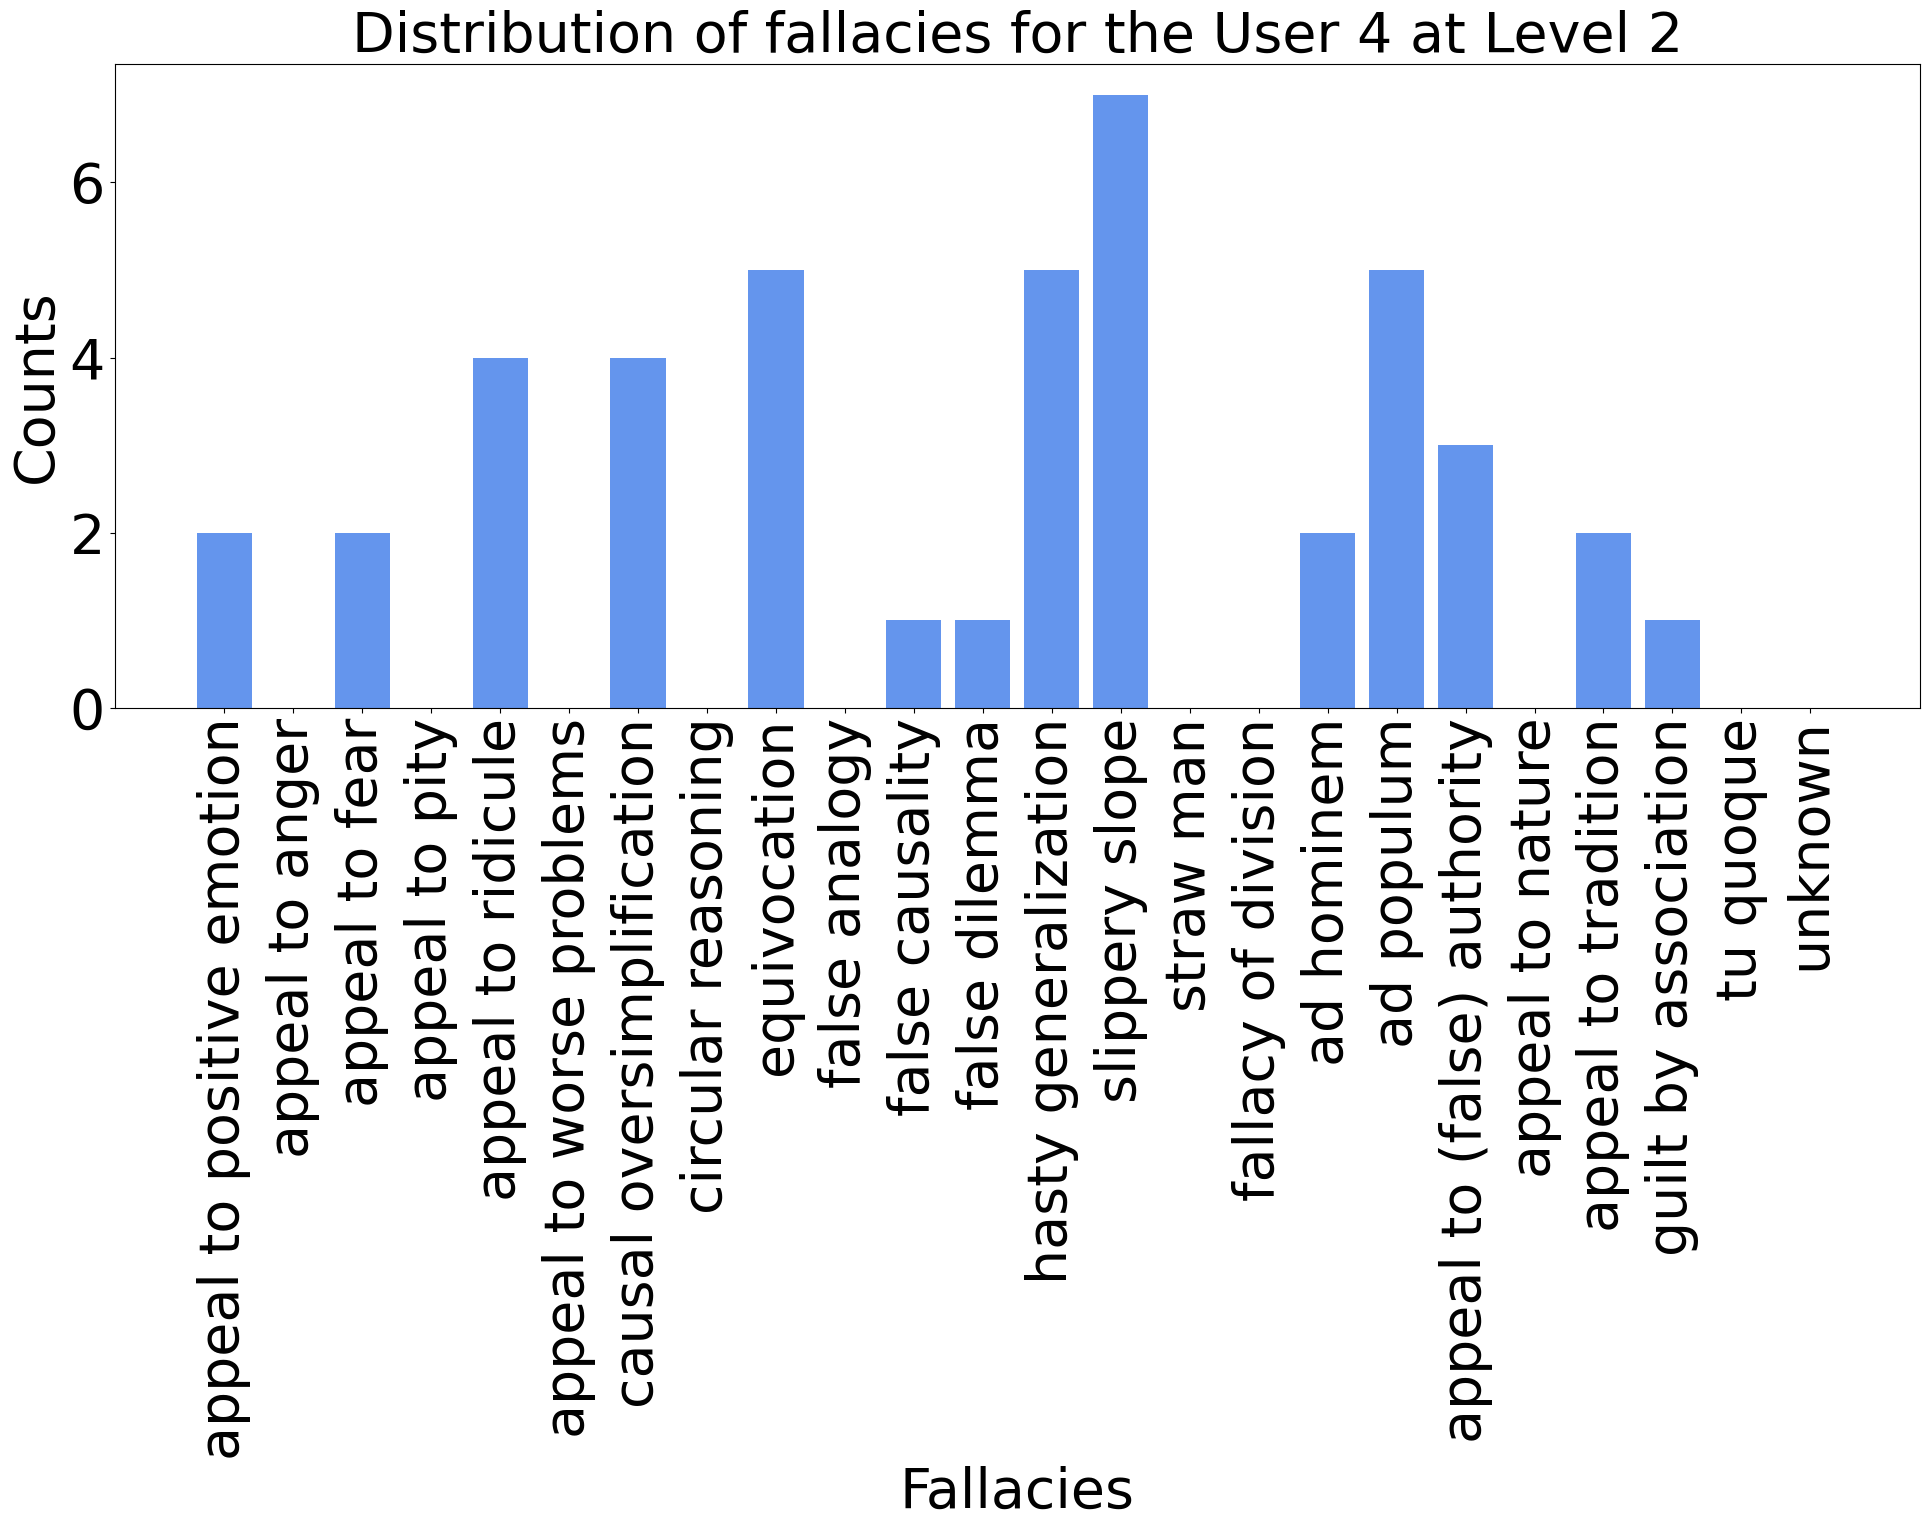

In [1210]:
plot_bar_labels_count(best_pred_labels_count_user_4, "User 4", "Level 2")

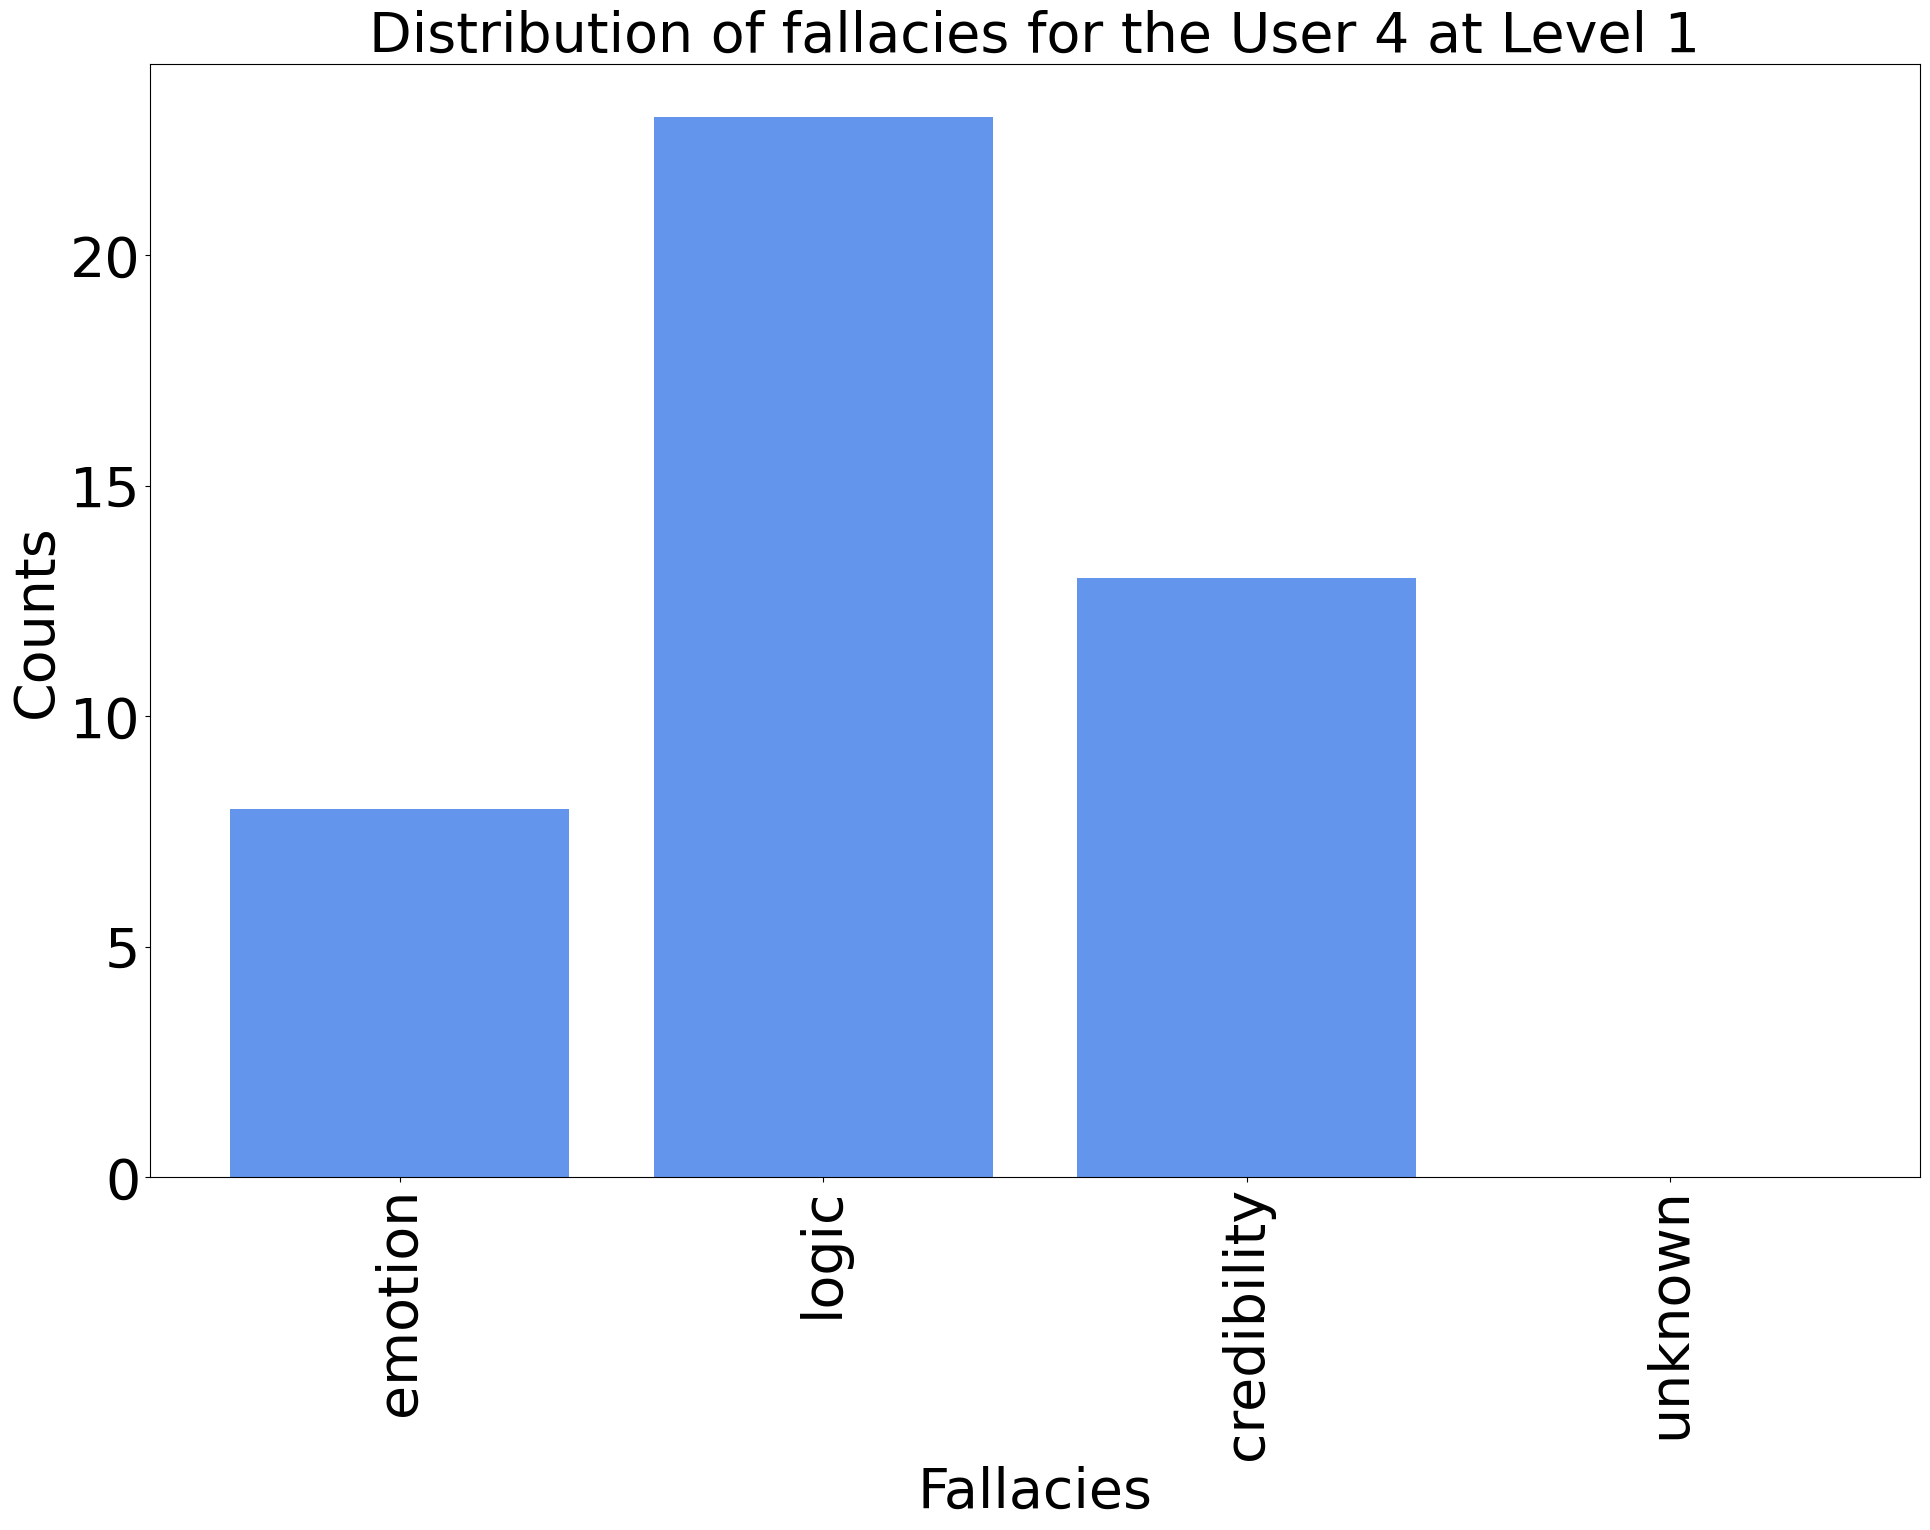

In [1211]:
plot_bar_labels_count(transform_level_2_to_level_1(best_pred_labels_count_user_4), "User 4", "Level 1")

In [1212]:
count_match_user_1, count_span_user_1, gd_labels_count_user_1, pred_labels_count_user_1 = count_match_fallacious_span(all_dict_gold_spans, all_dict_best_pred_span_user_1)
count_match_user_2, count_span_user_2, gd_labels_count_user_2, pred_labels_count_user_2 = count_match_fallacious_span(all_dict_gold_spans, all_dict_best_pred_span_user_2)
count_match_user_3, count_span_user_3, gd_labels_count_user_3, pred_labels_count_user_3 = count_match_fallacious_span(all_dict_gold_spans, all_dict_best_pred_span_user_3)
count_match_user_4, count_span_user_4, gd_labels_count_user_4, pred_labels_count_user_4 = count_match_fallacious_span(all_dict_gold_spans, all_dict_best_pred_span_user_4)

(232, 332) {(232, 332): {'slippery slope'}, (0, 231): set()} {(92, 201): {'causal oversimplification'}, (92, 231): {'false dilemma'}, (202, 231): {'appeal to ridicule'}, (232, 332): {'appeal to ridicule'}, (0, 91): {'nothing'}}
(0, 126) {(0, 126): {'ad hominem'}} {(0, 126): {'appeal to ridicule'}}
(0, 91) {(0, 91): {'appeal to (false) authority'}} {(0, 92): {'nothing'}}
(0, 207) {(0, 207): {'ad hominem', 'guilt by association'}} {(57, 128): {'guilt by association'}, (129, 207): {'straw man', 'ad hominem'}, (0, 56): {'nothing'}}
(139, 265) {(139, 265): {'false dilemma', 'hasty generalization'}, (0, 138): set()} {(70, 132): {'hasty generalization'}, (139, 191): {'ad hominem'}, (139, 265): {'appeal to ridicule', 'appeal to fear'}, (0, 69): {'nothing'}, (133, 138): {'nothing'}}
(0, 72) {(0, 72): {'false causality'}} {(0, 72): {'appeal to positive emotion', 'fallacy of division'}}
(0, 55) {(0, 55): {'ad populum'}} {(0, 55): {'circular reasoning', 'ad populum'}}
(0, 65) {(0, 65): {'hasty gen

In [1213]:
print("Average user 1 exact mactch fallacious span", count_match_user_1 / count_span_user_1, count_match_user_1, count_span_user_1)
print("Average user 2 exact mactch fallacious span", count_match_user_2 / count_span_user_2, count_match_user_2, count_span_user_2)
print("Average user 3 exact mactch fallacious span", count_match_user_3 / count_span_user_3, count_match_user_3, count_span_user_3)
print("Average user 4 exact mactch fallacious span", count_match_user_4 / count_span_user_4, count_match_user_4, count_span_user_4)

Average user 1 exact mactch fallacious span 0.5833333333333334 14 24
Average user 2 exact mactch fallacious span 0.7916666666666666 19 24
Average user 3 exact mactch fallacious span 0.4166666666666667 10 24
Average user 4 exact mactch fallacious span 0.3333333333333333 8 24


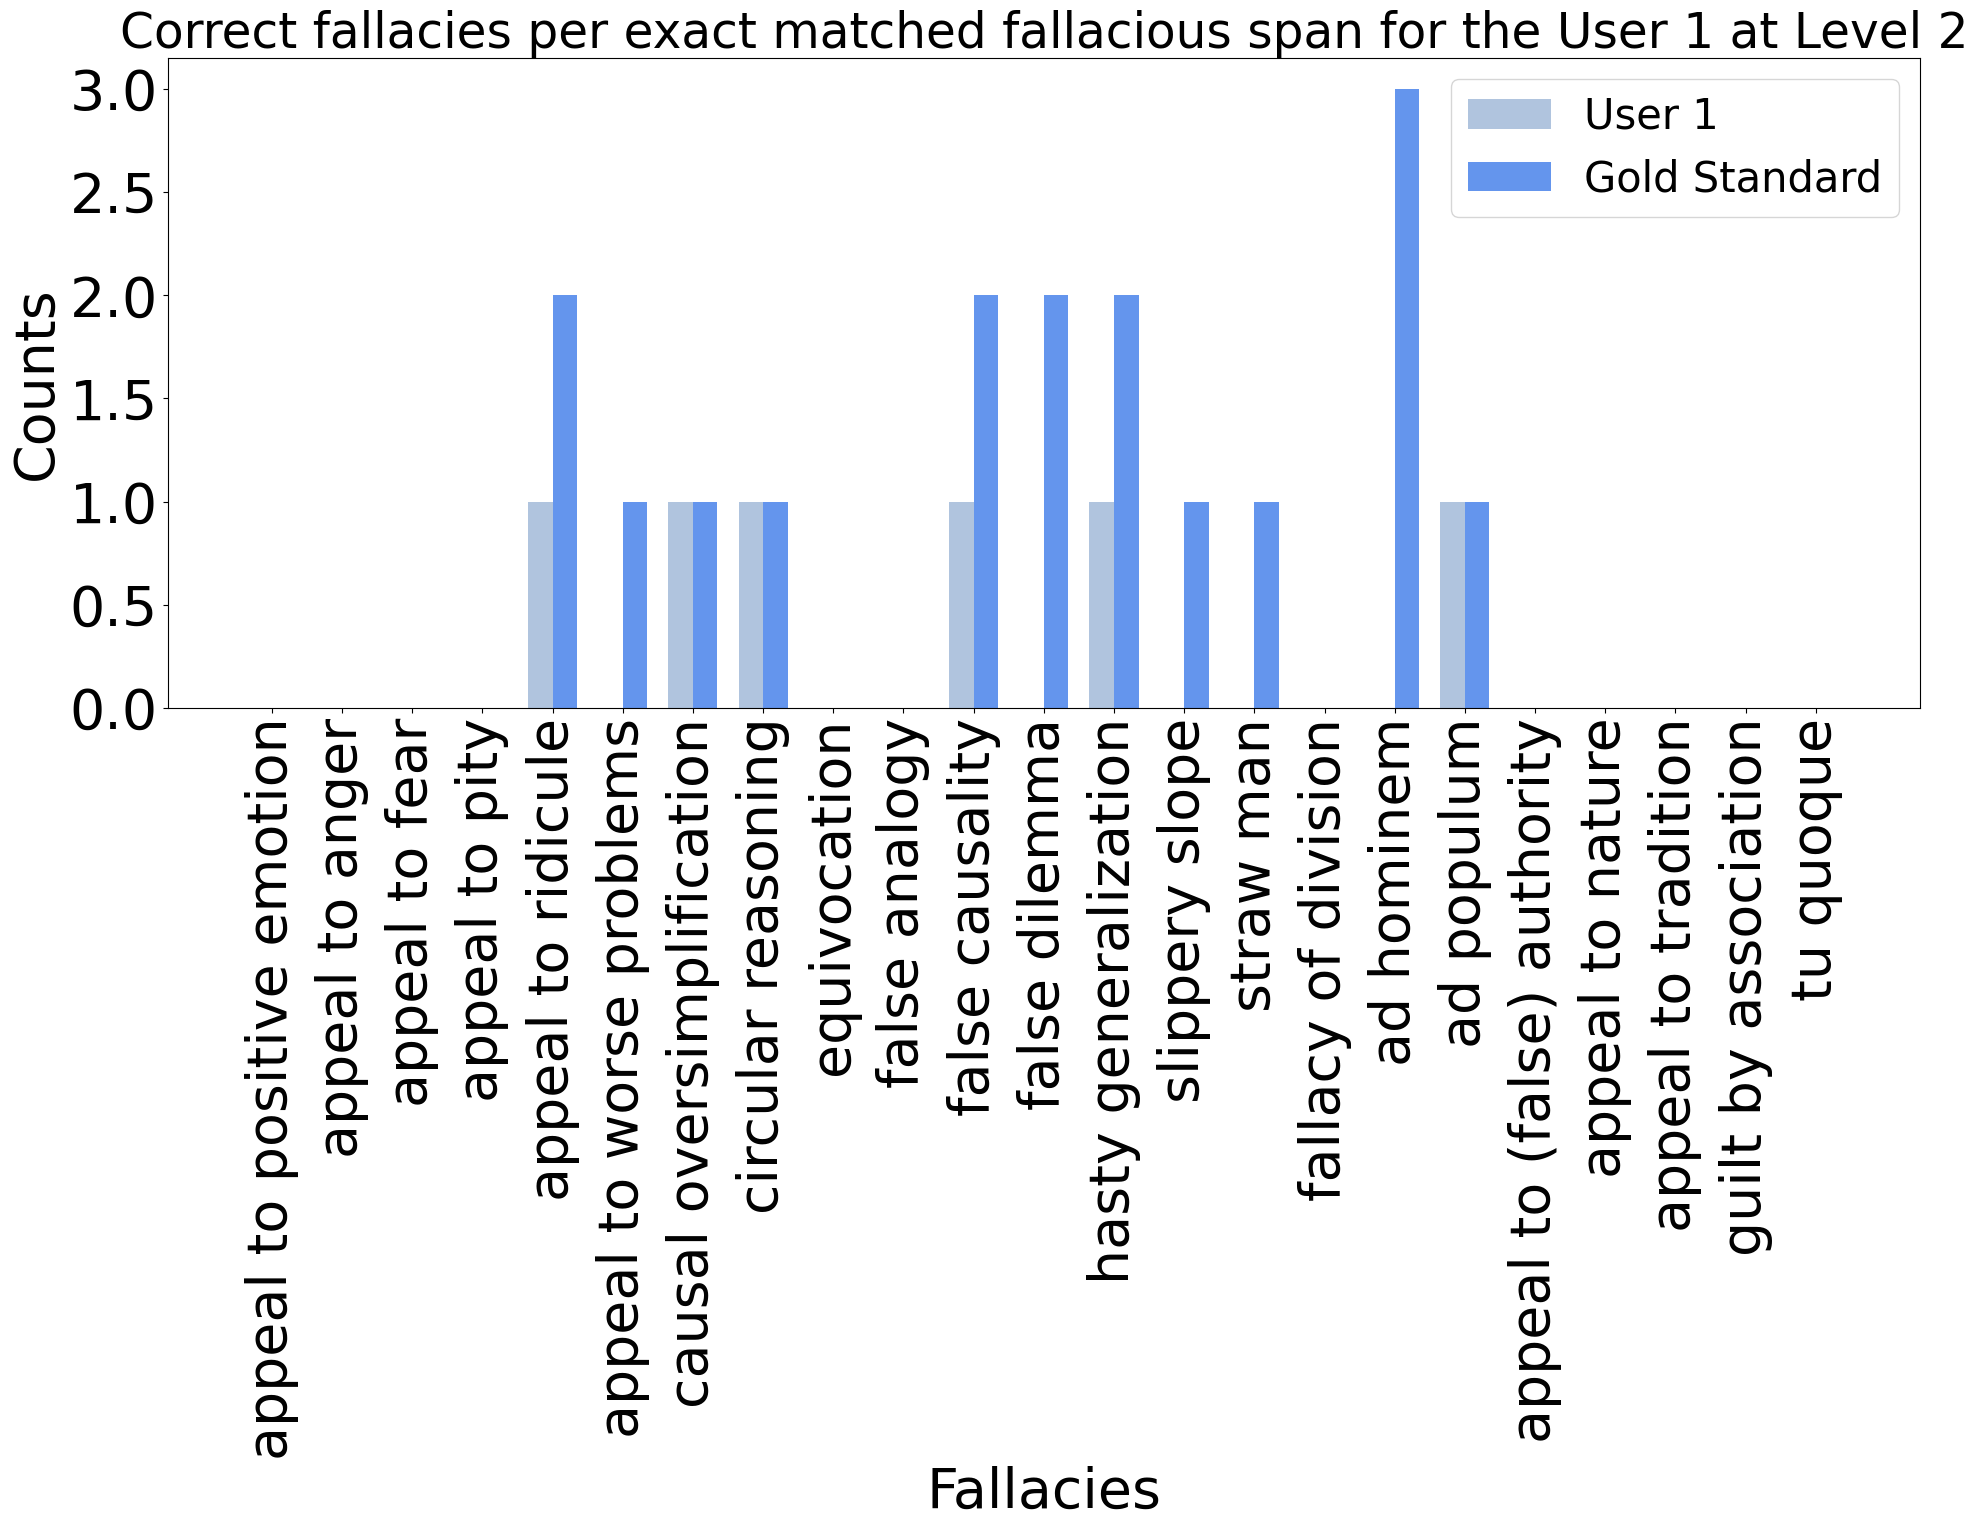

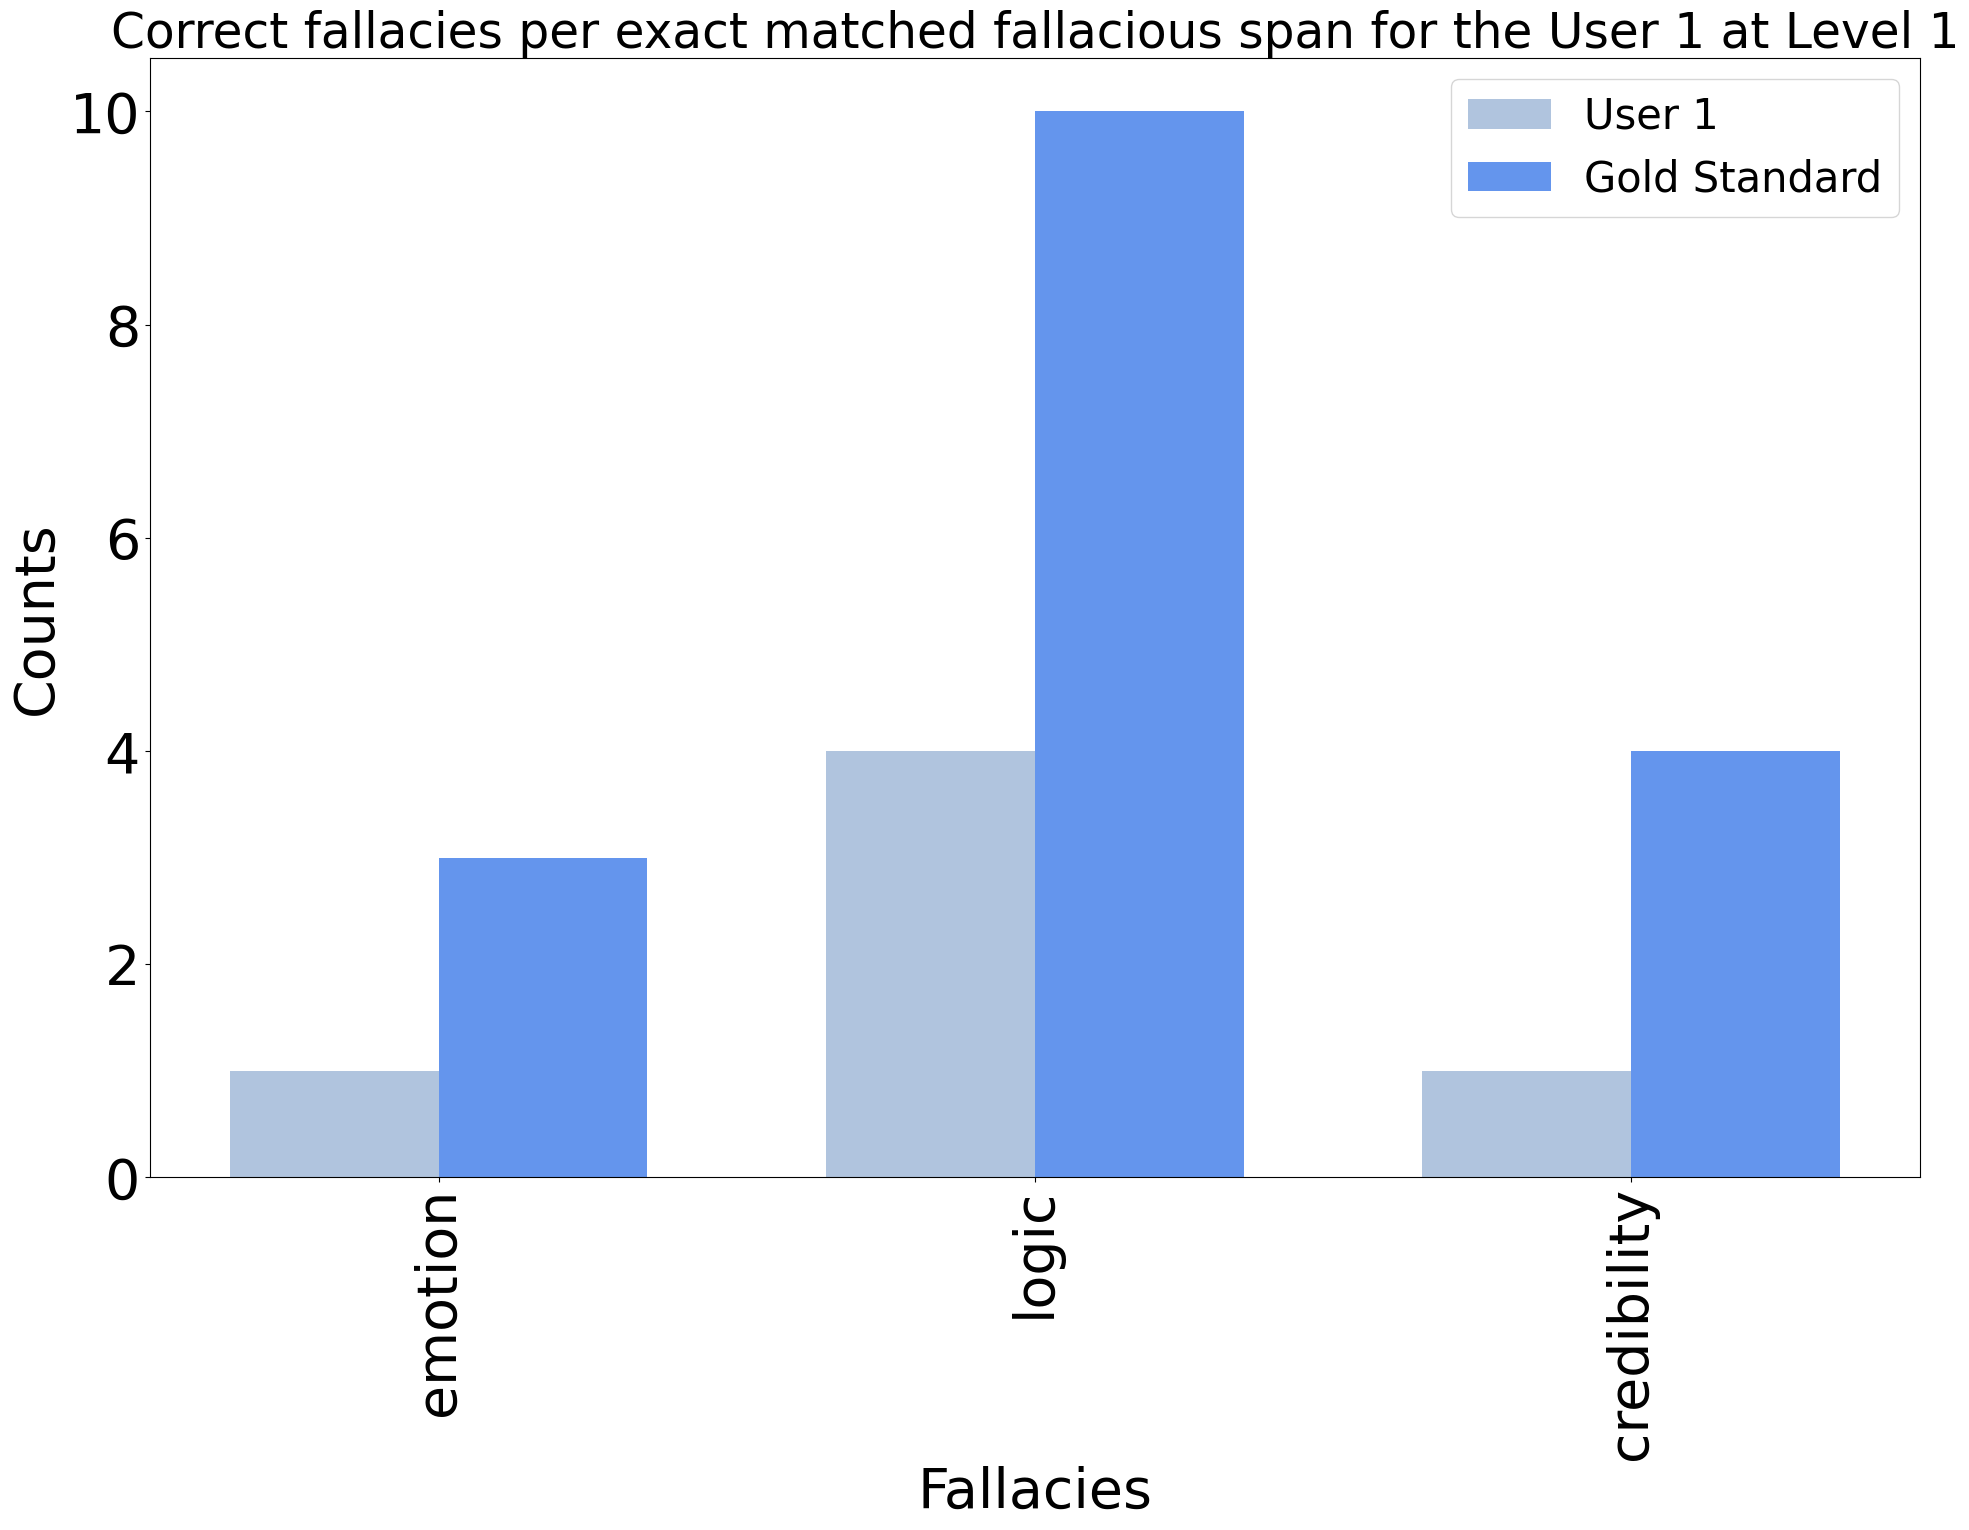

In [1214]:
plot_bar_labels_exact_match(gd_labels_count_user_1, pred_labels_count_user_1, "User 1")
plot_bar_labels_exact_match(transform_level_2_to_level_1(gd_labels_count_user_1), transform_level_2_to_level_1(pred_labels_count_user_1), "User 1", "Level 1")

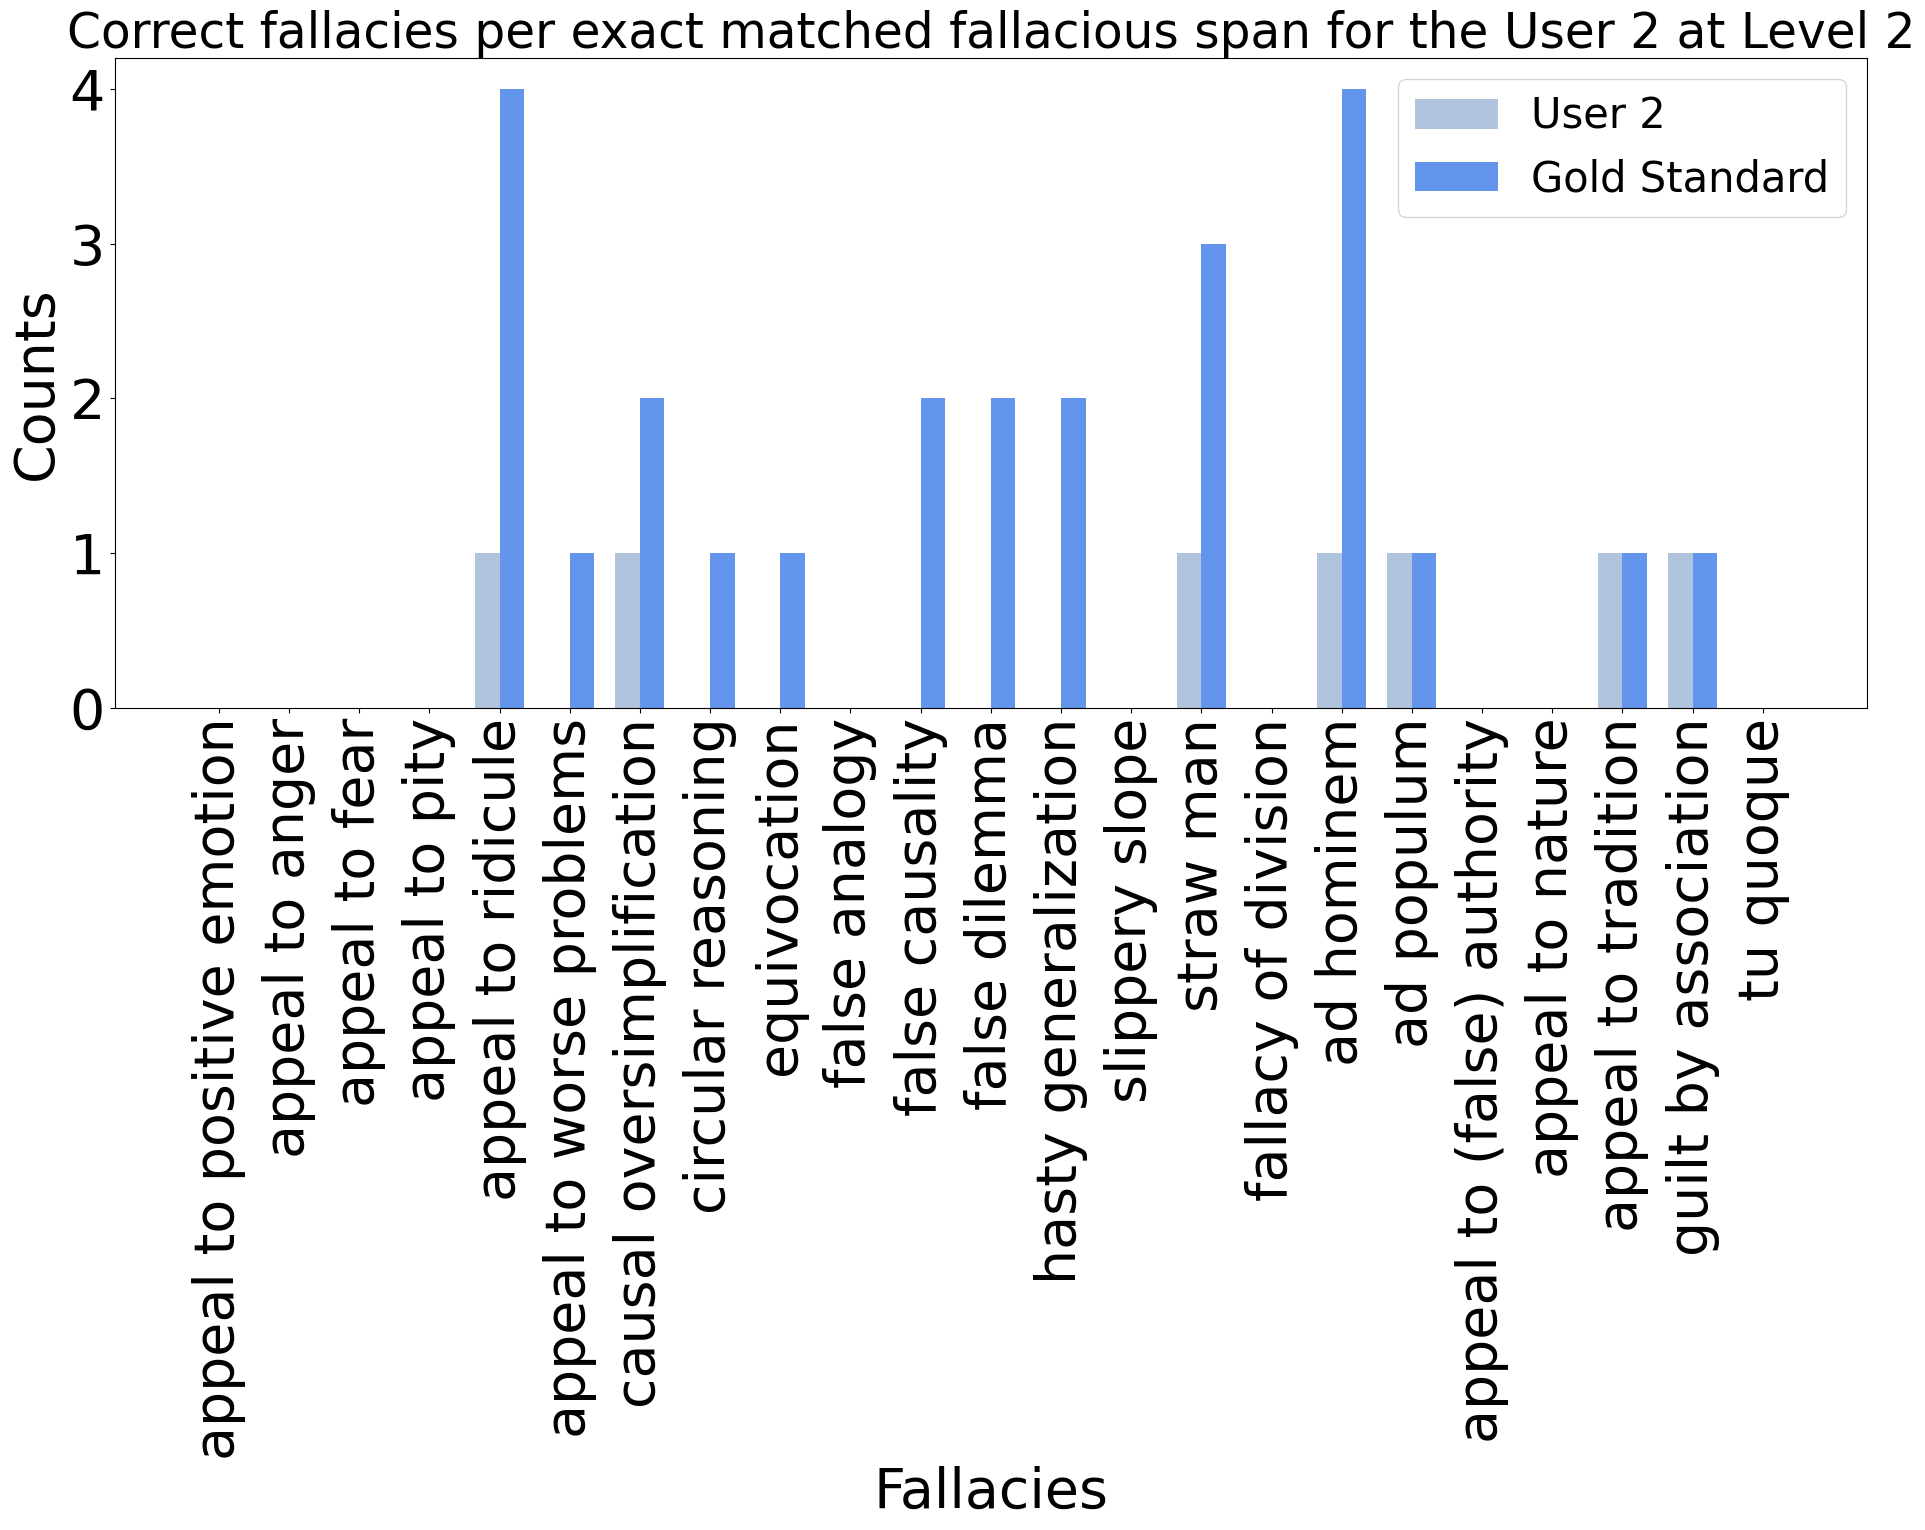

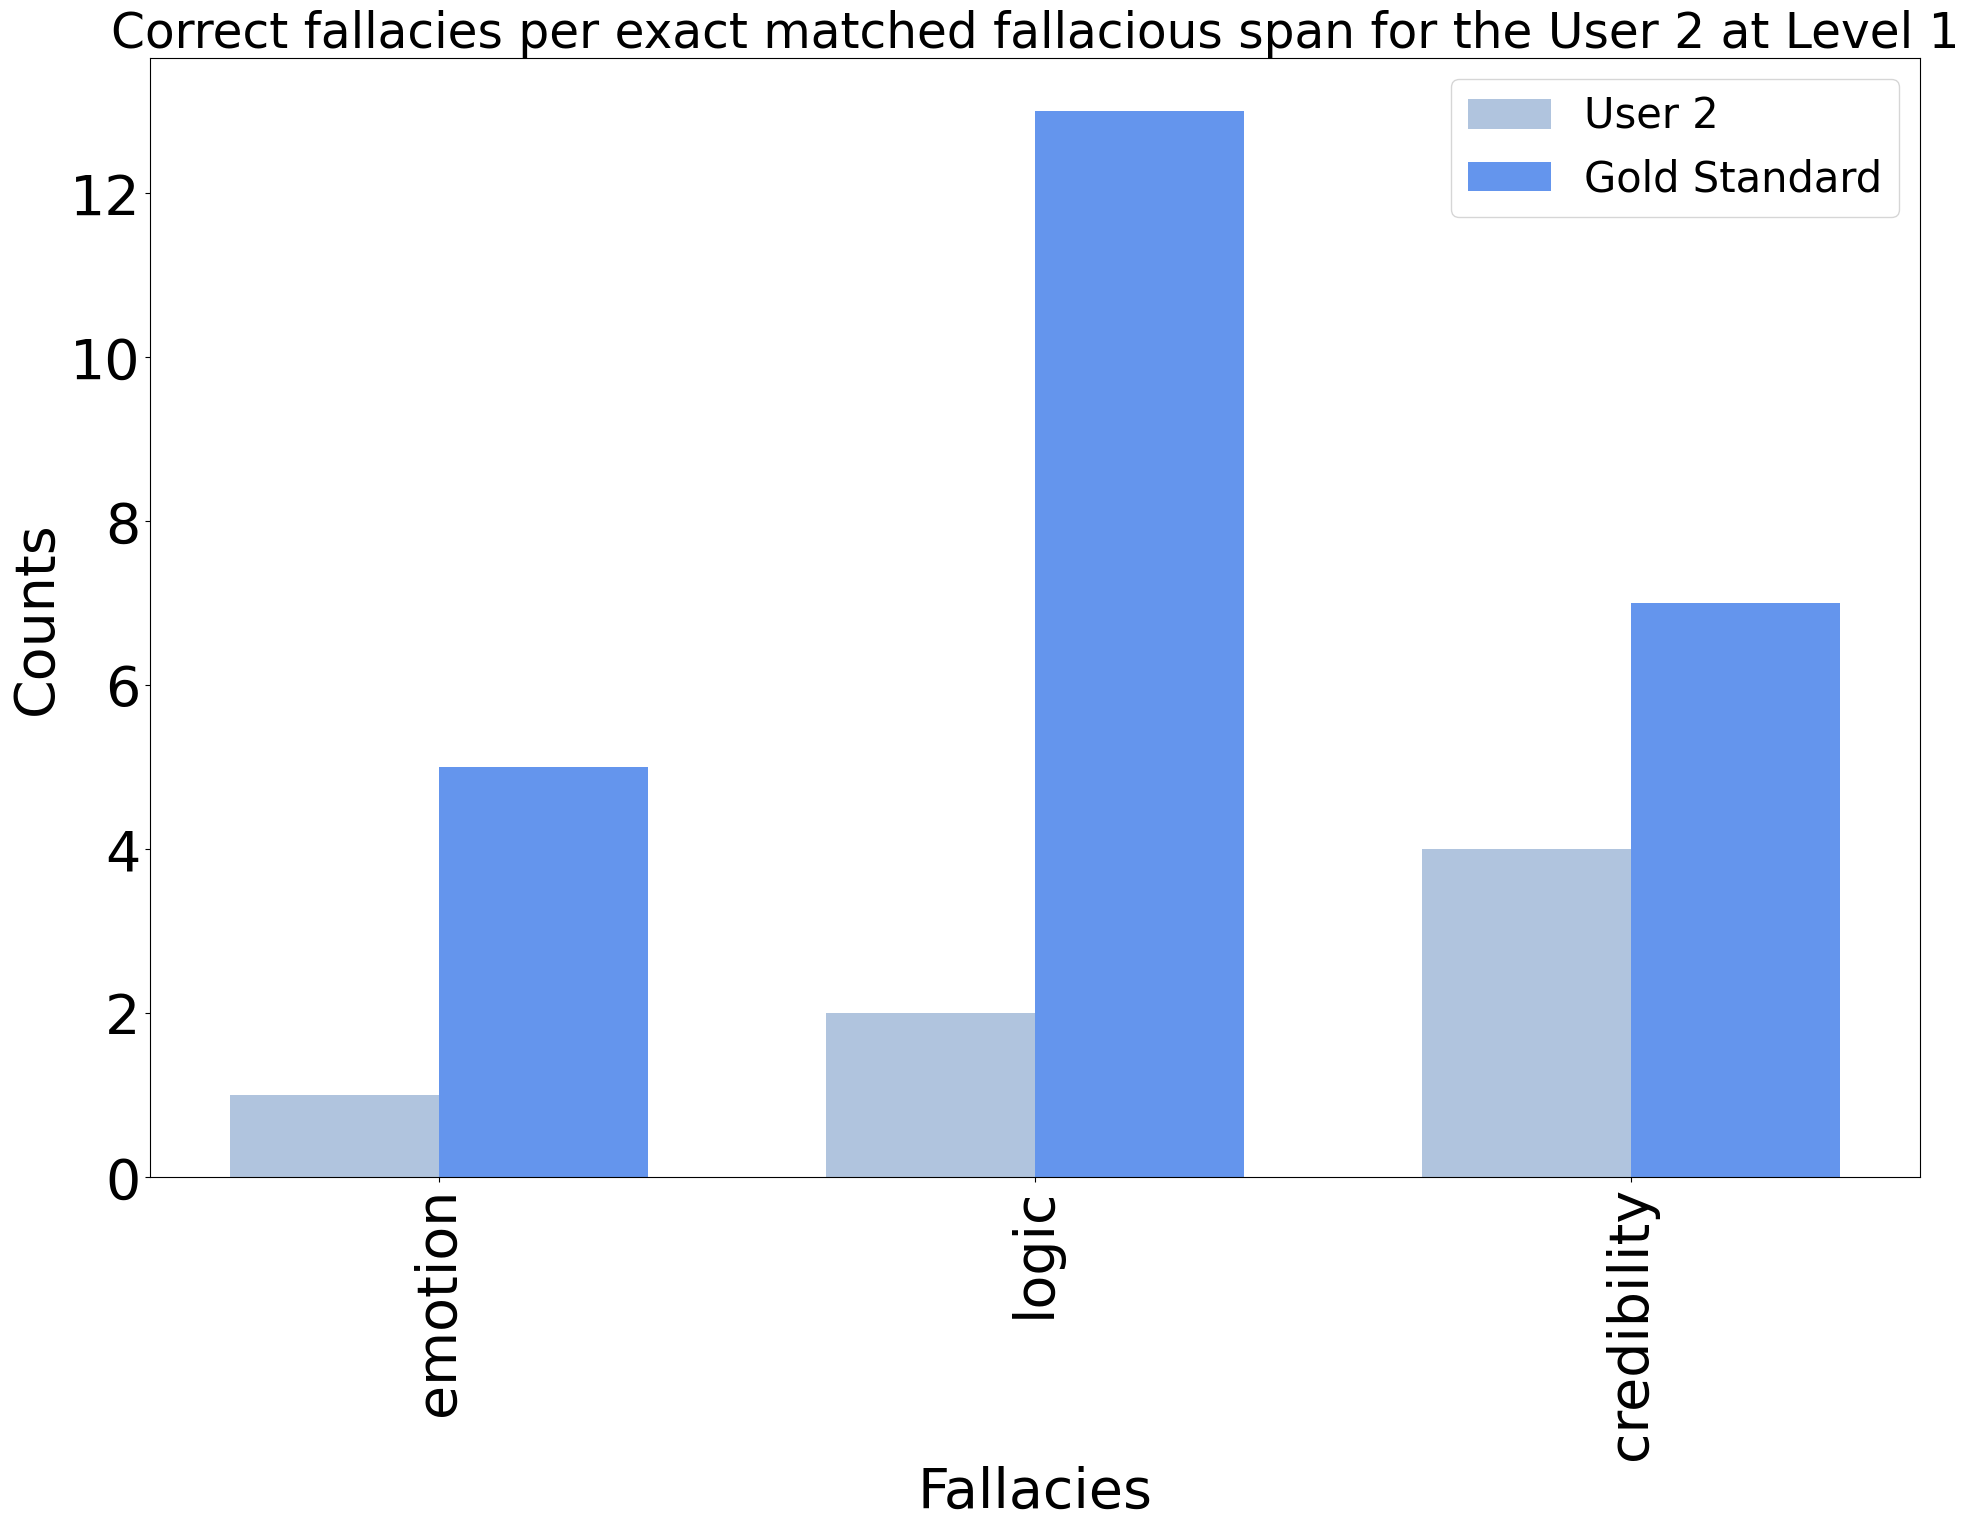

In [1215]:
plot_bar_labels_exact_match(gd_labels_count_user_2, pred_labels_count_user_2, "User 2")
plot_bar_labels_exact_match(transform_level_2_to_level_1(gd_labels_count_user_2), transform_level_2_to_level_1(pred_labels_count_user_2), "User 2", "Level 1")

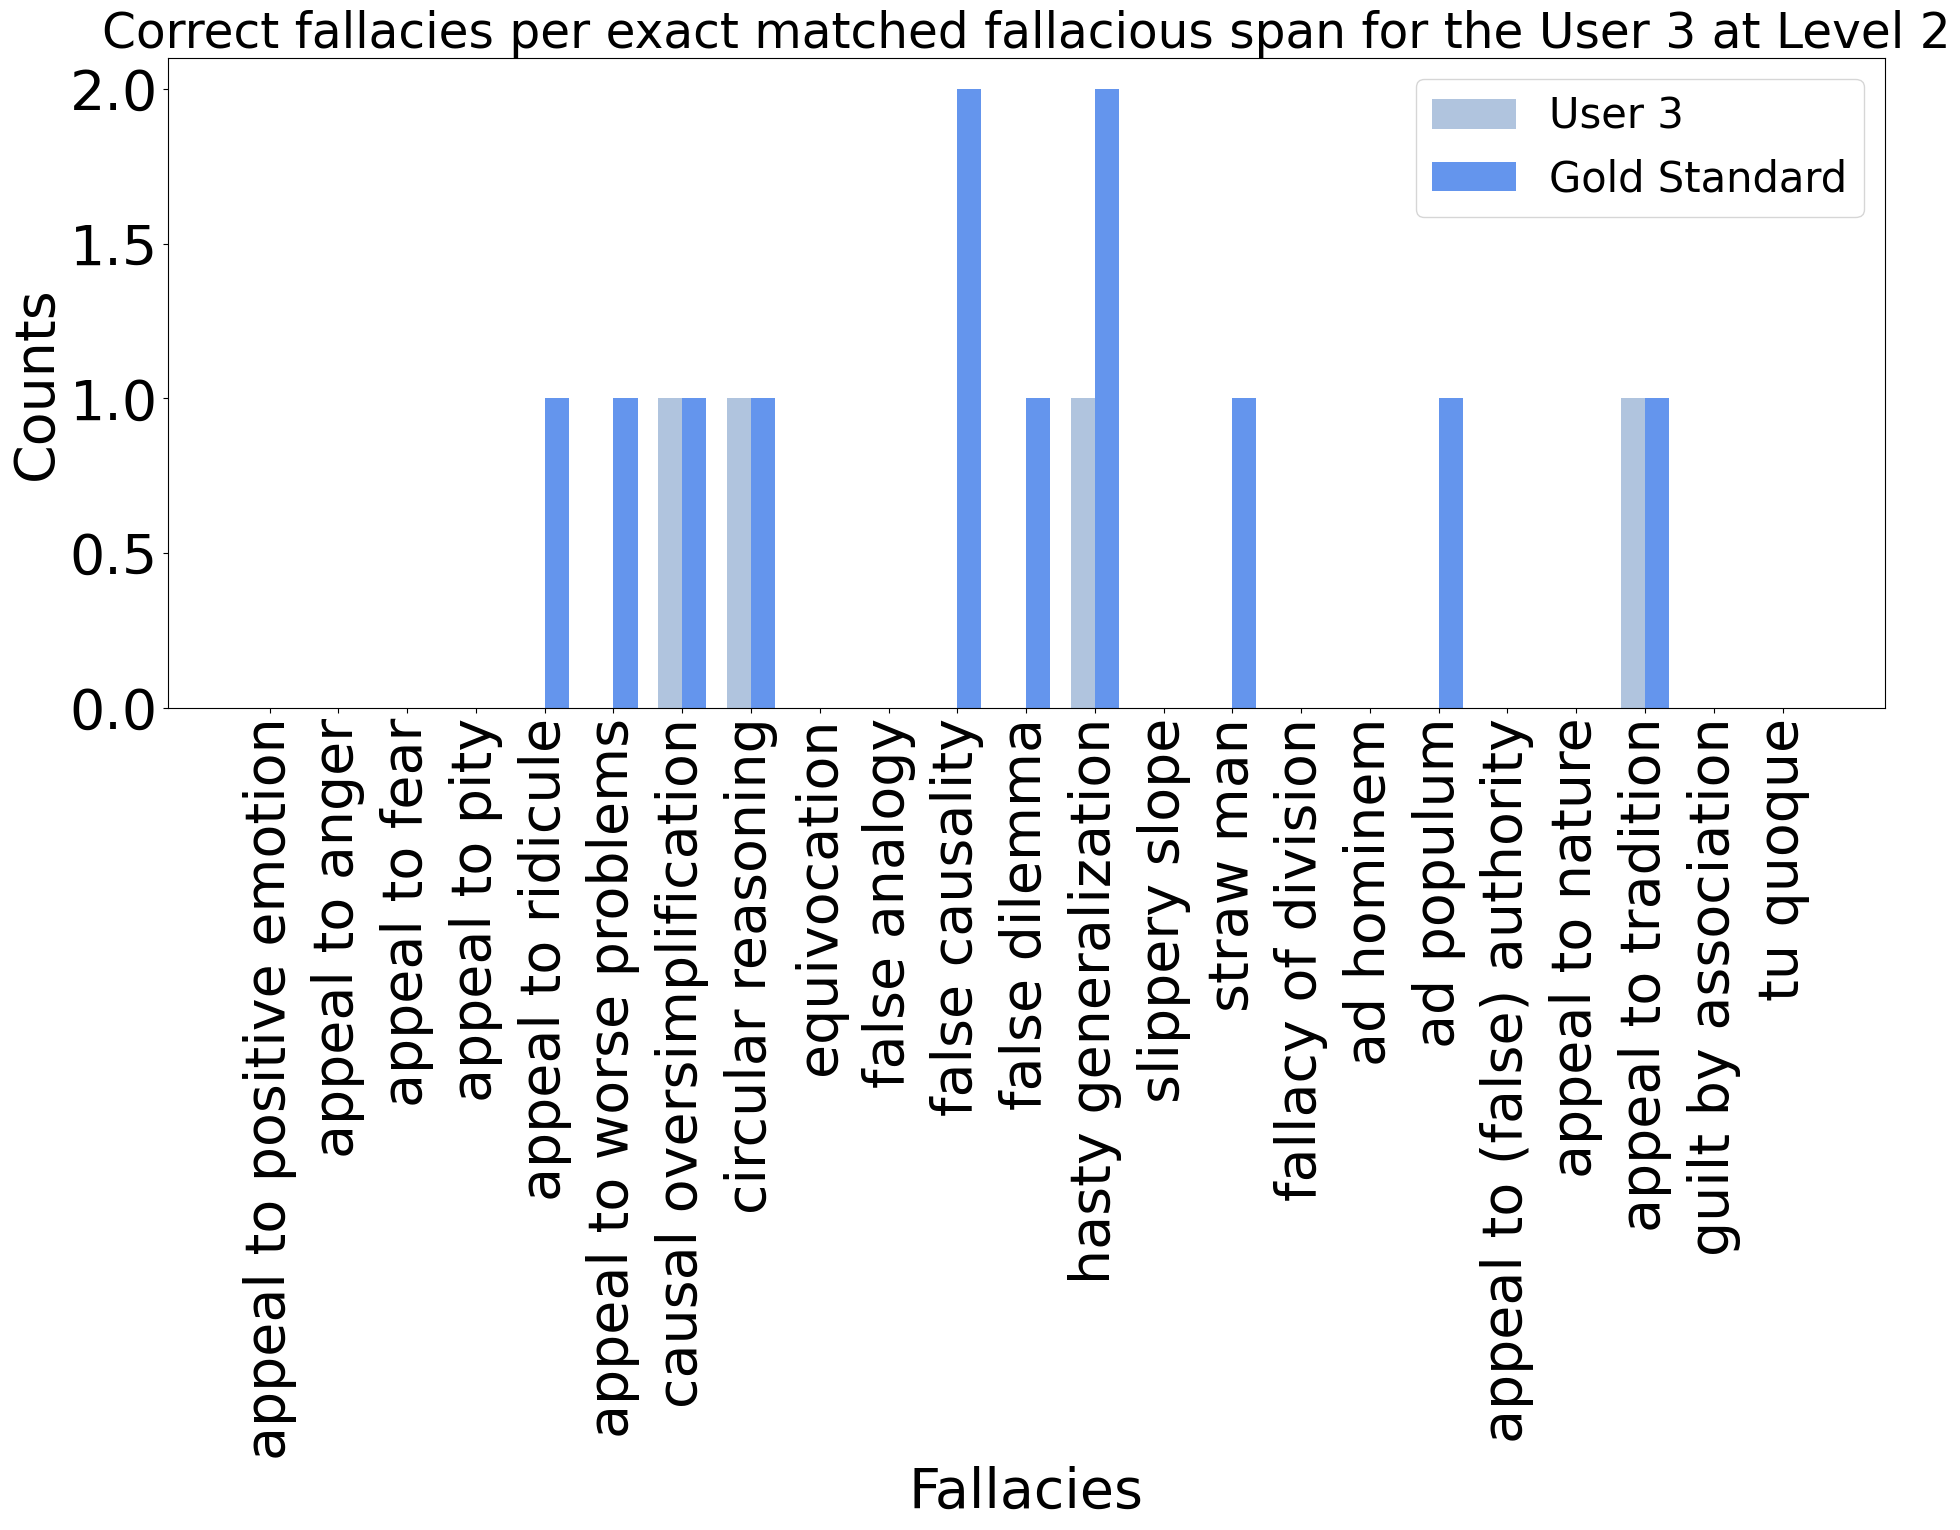

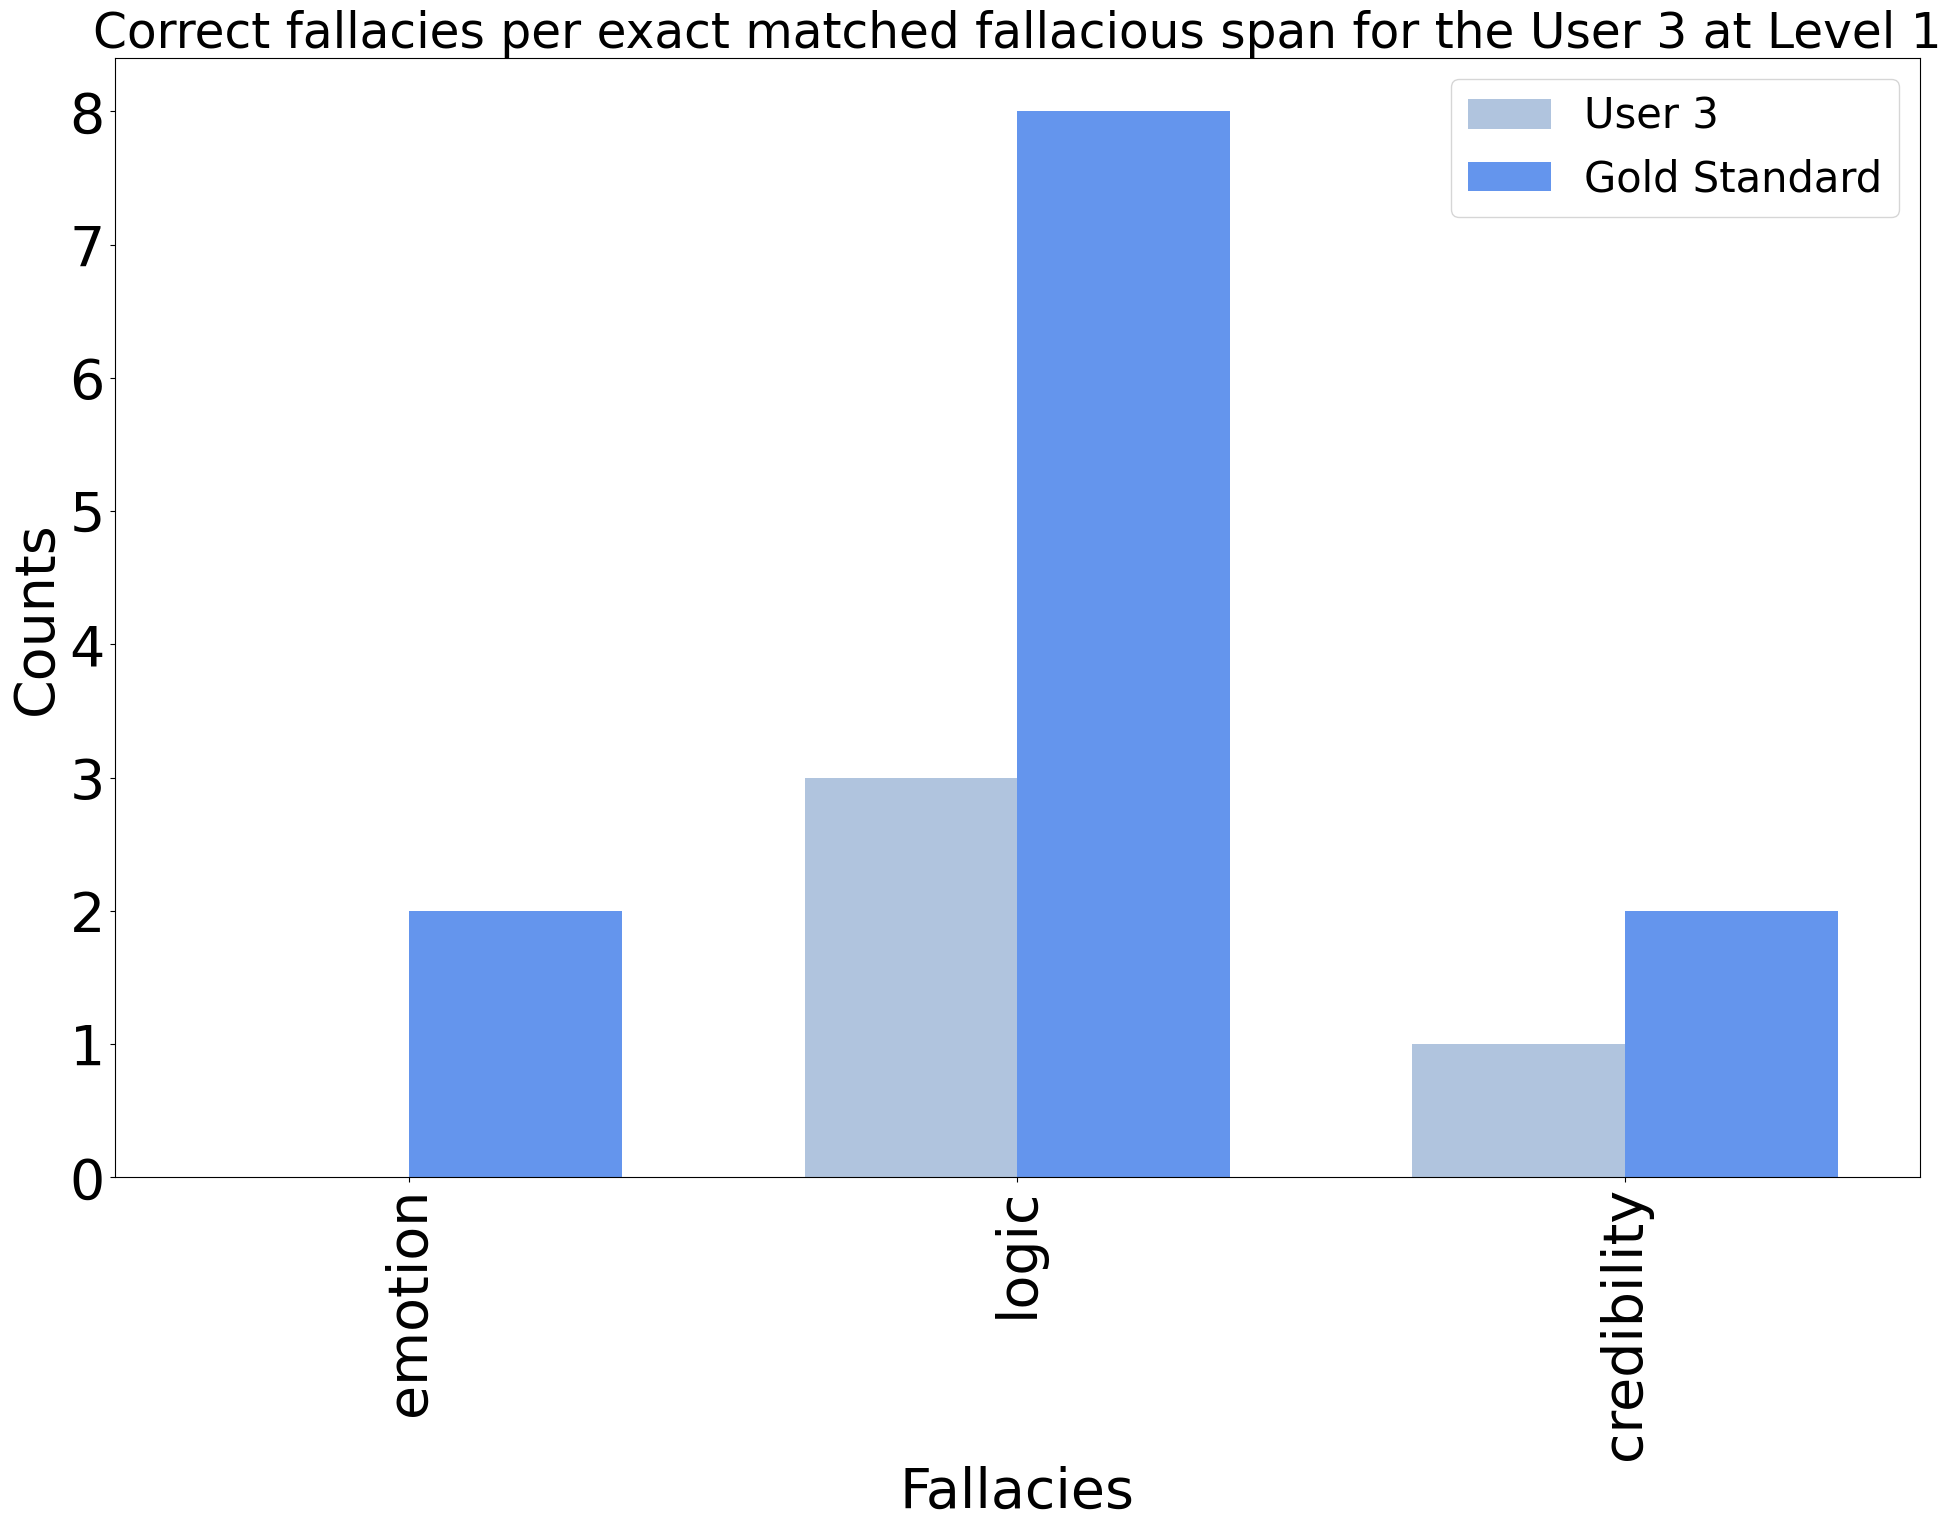

In [1216]:
plot_bar_labels_exact_match(gd_labels_count_user_3, pred_labels_count_user_3, "User 3")
plot_bar_labels_exact_match(transform_level_2_to_level_1(gd_labels_count_user_3), transform_level_2_to_level_1(pred_labels_count_user_3), "User 3", "Level 1")

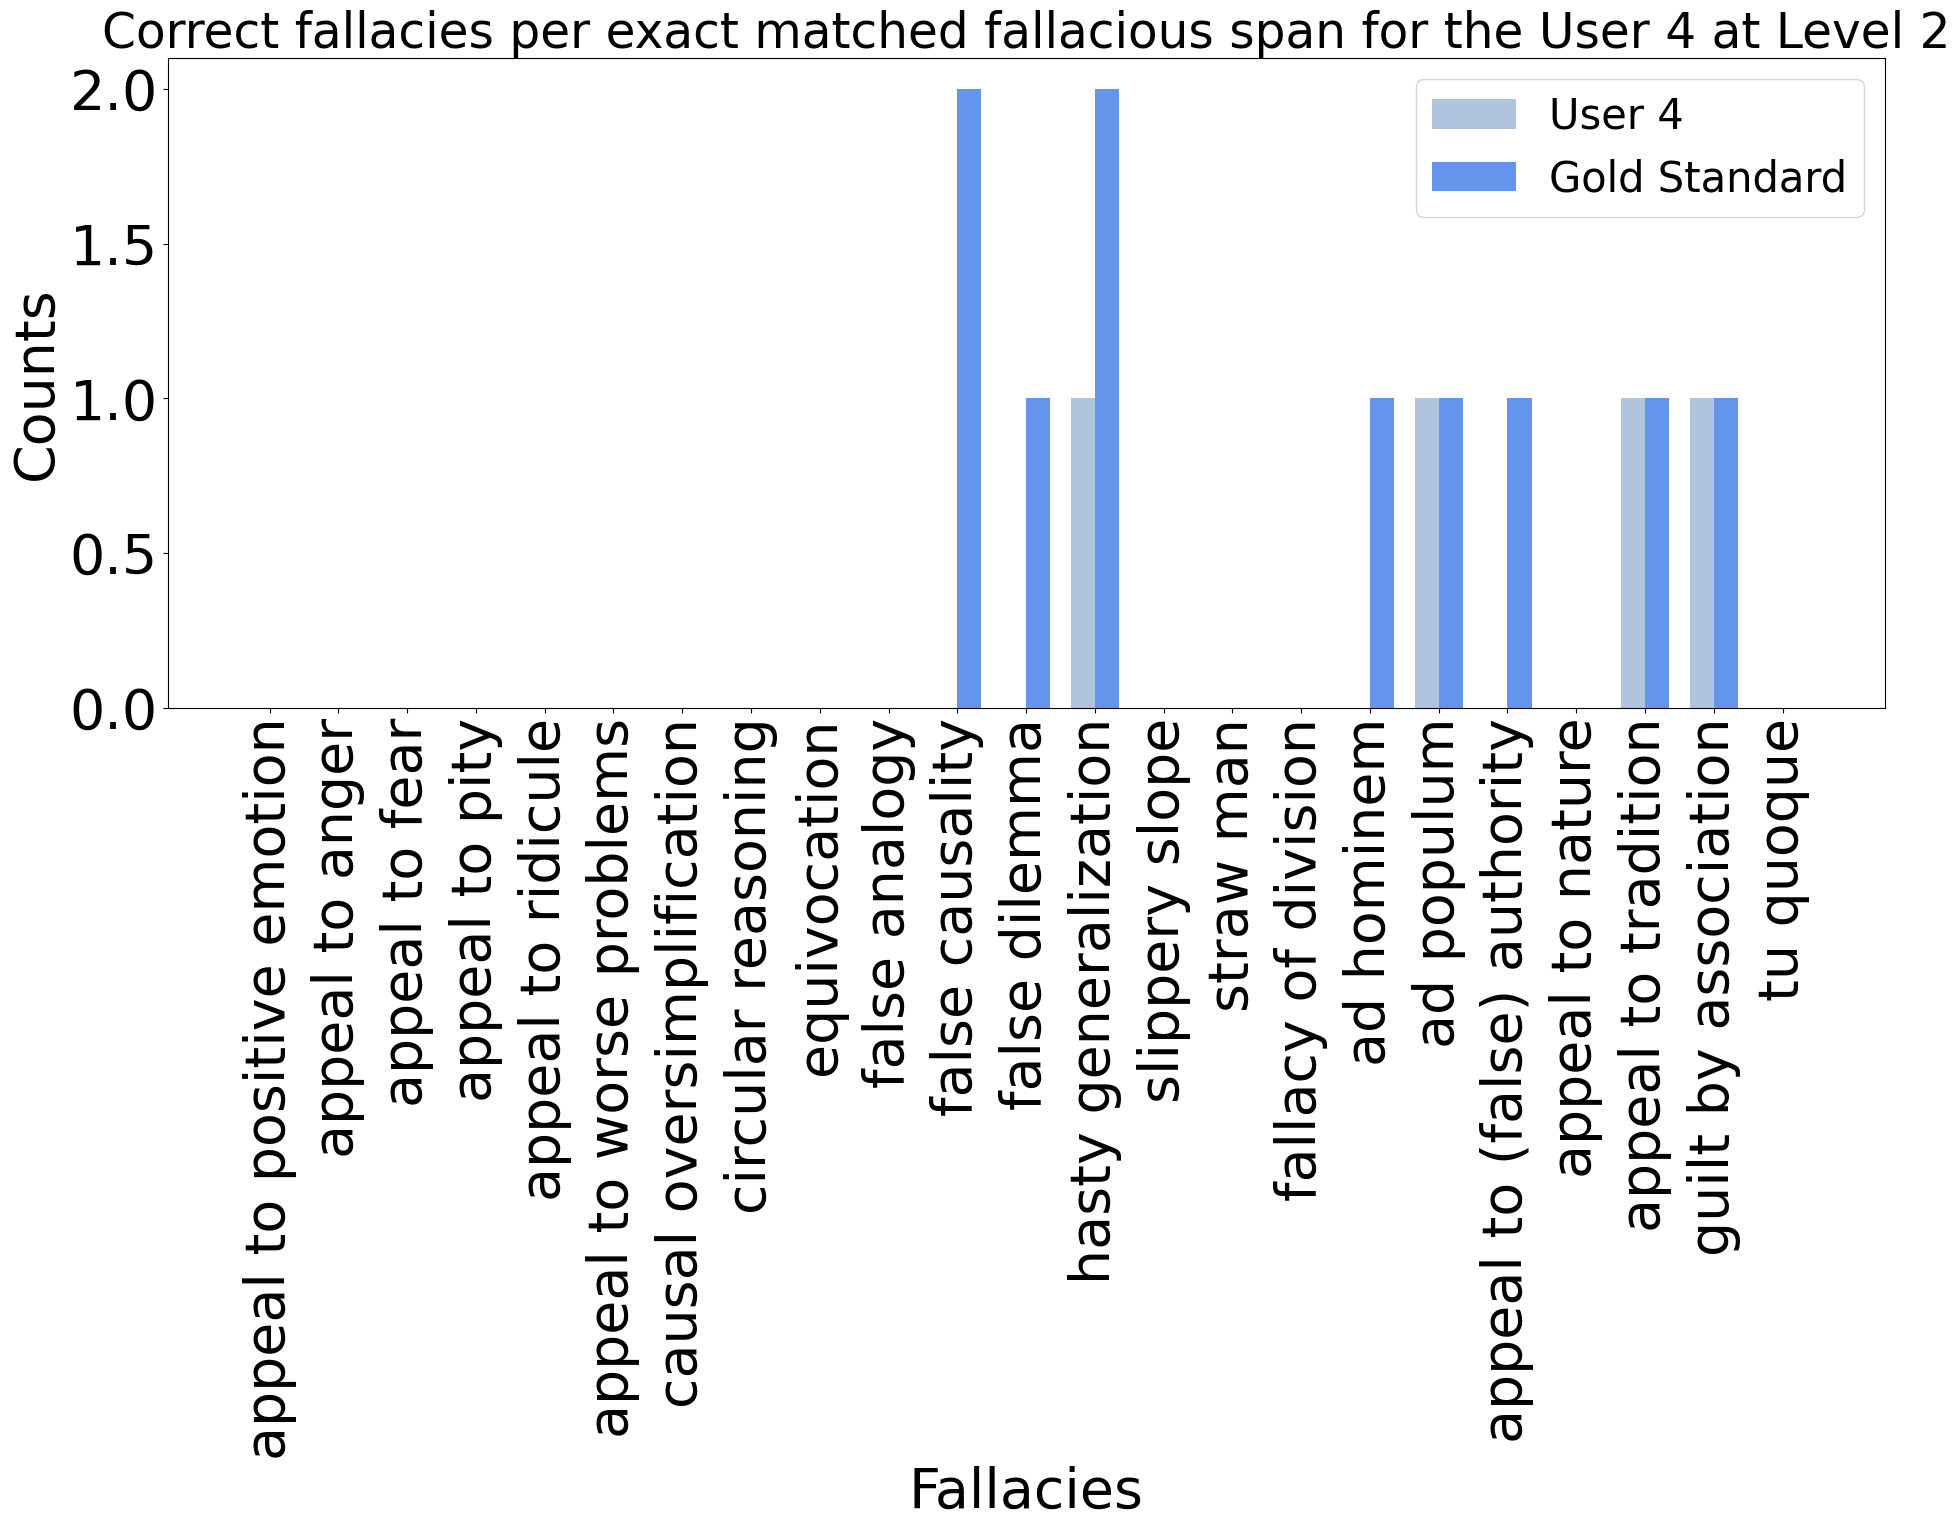

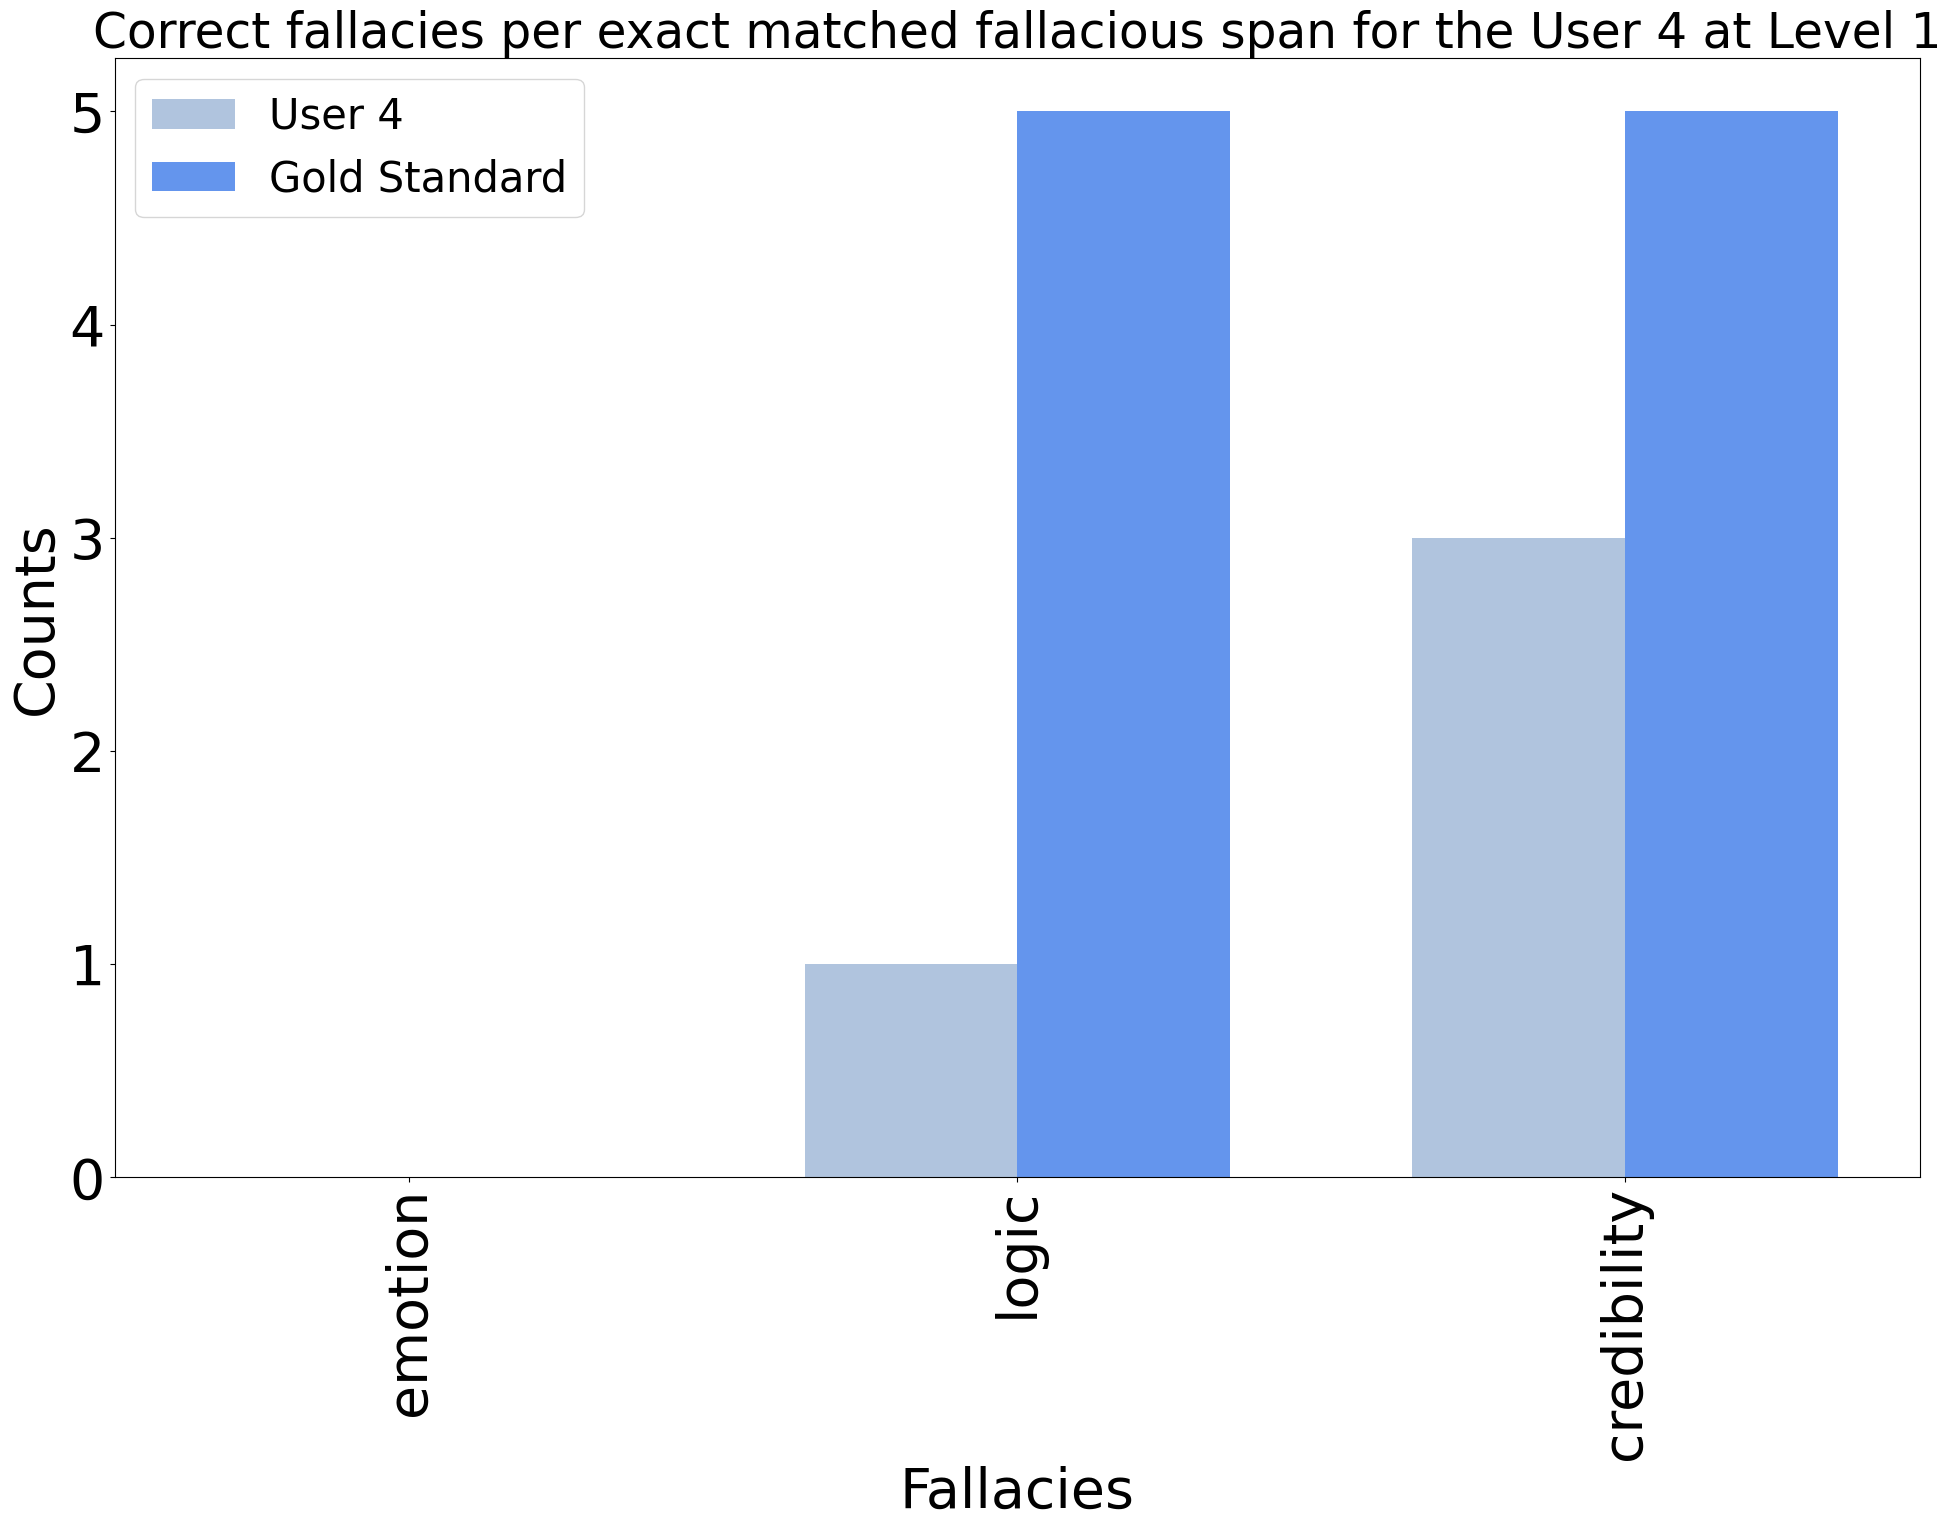

In [1217]:
plot_bar_labels_exact_match(gd_labels_count_user_4, pred_labels_count_user_4, "User 4")
plot_bar_labels_exact_match(transform_level_2_to_level_1(gd_labels_count_user_4), transform_level_2_to_level_1(pred_labels_count_user_4), "User 4", "Level 1")